In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.lines import Line2D
import os
import json
import matplotlib.ticker as ticker
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from scipy.interpolate import make_interp_spline, BSpline
os.chdir("C:/Users/Zber/Documents/Dev_program/OpenRadar")
from FER.utils import MapRecord

# 1. continual Learning 2 scenario

In [111]:
# Transfer, RIC, Transfer+RIC, Full Size

# fin_lenet
acc_fin_lenet = [77.08, 92.22, 93.06, 91.80]
Flops_fin_lenet = [0.191819, 0.747945, 0.807638, 3.37878]

# fin_mobilenet
acc_fin_mb = [80.27, 91.11, 92.47, 91.25]
Flops_fin_mb = [0.262993, 0.371029, 0.298223, 1.414048]

# mnist_lenet
acc_mnist_lenet = [89.09, 99.17, 99.06, 99.23]
Flops_mnist_lenet = [0.350028, 2.040754, 1.71446, 4.64538]


In [112]:
def plot_cl_fin(ax, accs1, flops1, accs2, flops2):
    ind = np.arange(len(accs1))  # the x locations for the groups
    width = 0.18  # the width of the bars
    ax2 = ax.twinx()
    rects1 = ax.bar(ind - 3/2*width, accs1, width, edgecolor = 'black',color='#58D2C9',
                    label='Accuracy on LeNet',linewidth=1)
    rects2 = ax2.bar(ind - width/2, flops1, width, edgecolor = 'black',color = '#FF545A', 
                     label='FLOPs on LeNet',linewidth=1)
    
    rects3 = ax.bar(ind + width/2, accs2, width, edgecolor = 'black',color='#58D2C9',
                    label='Accuracy on MobileNet',hatch="//",linewidth=1)
    rects4 = ax2.bar(ind + 3/2*width, flops2, width, edgecolor = 'black',color = '#FF545A', 
                     label='FLOPs on MobileNet',hatch="//",linewidth=1)
    

    handles, labels = ax.get_legend_handles_labels()
    new_handles, new_labels = ax2.get_legend_handles_labels()
    H = handles + new_handles
    L = labels + new_labels
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel("Accuracy%",fontsize=30)
    ax2.set_ylabel("FLOPs(M)",fontsize=30)
    ax.yaxis.set_tick_params(labelsize=30,length=5)    
    ax2.yaxis.set_tick_params(labelsize=30,length=5)
    ax.set_xticks(ind)
    ax.set_xticklabels(('TF', 'RIC','TF+RIC', 'Full Size'),fontsize=22)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax.set_ylim(70,100)

    return H, L

In [113]:
def plot_cl_mnist(ax, accs, flops):
    ind = np.arange(len(accs))  # the x locations for the groups
    width = 0.28  # the width of the bars
    ax2 = ax.twinx()
    rects1 = ax.bar(ind - width/2, accs, width, edgecolor = 'black',color='#58D2C9',
                    label='Accuracy',linewidth=1)
    rects2 = ax2.bar(ind + width/2, flops, width, edgecolor = 'black',color = '#FF545A', 
                     label='FLOPs',linewidth=1)

    handles, labels = ax.get_legend_handles_labels()
    new_handles, new_labels = ax2.get_legend_handles_labels()
    H = handles + new_handles
    L = labels + new_labels
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel("Accuracy%",fontsize=30)
    ax2.set_ylabel("FLOPs(M)",fontsize=30)
    ax.yaxis.set_tick_params(labelsize=30,length=5)    
    ax2.yaxis.set_tick_params(labelsize=30,length=5)
    ax.set_xticks(ind)
    ax.set_xticklabels(('TF', 'RIC','TF+RIC', 'Full Size'),fontsize=22)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax.set_ylim(70,100)

    return H, L

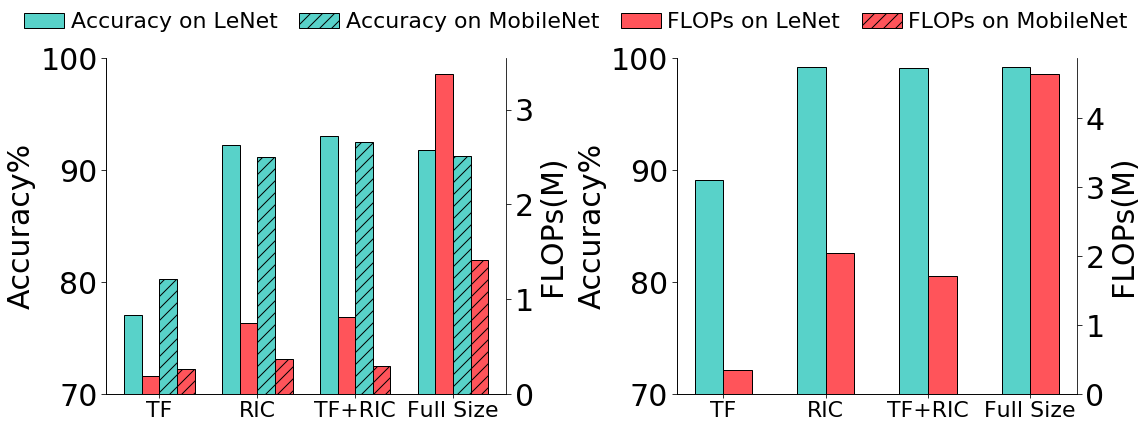

In [114]:
path = "/Users/zber/Documents/FGdroid/exp_result/v2_Continual_learning"
save_path = os.path.join(path, '{}.svg'.format('continual_learning_v2'))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5.5))
H, L = plot_cl_fin(ax[0],acc_fin_lenet,Flops_fin_lenet,acc_fin_mb,Flops_fin_mb)
plot_cl_mnist(ax[1],acc_mnist_lenet,Flops_mnist_lenet)

fig.legend(H, L, loc='upper center',bbox_to_anchor=(0.5, 1.10),fontsize = 22, ncol=4,
           framealpha=0.0,handletextpad = 0.3,columnspacing =1.0,handlelength=1.8)

fig.tight_layout()
fig.savefig(save_path,format='svg', bbox_inches="tight")
plt.show()

# 2. Stablility

In [168]:
# Lenet v1
lenet_v1 = [[0.599,0.539,0.599,0.3], [1.731,2.194,1.924,0.739], [0.041,0.062,0.03,0.032]]

lenet_v2 = [[0.15, 0.21, 0.24, 0.18], [0.403, 0.608, 0.695,0.599], [0.033, 0.035,0.035, 0.043]]

lenet_size_v1 =[[0.52, 0.468, 0.52, 0.26], [13.527, 17.138, 15.03, 5.773], [19.918, 30.45, 14.911, 15.498]]

lenet_size_v2 =[[0.13, 0.182, 0.208, 0.156], [3.15, 4.752, 5.427, 4.681], [16.04, 17.753, 17.3, 20.874]] 

In [169]:
# MBnet v1
mbnet_v1 = [[0.147,0.225,0.279,0.367], [0.04,0.032,0.051,0.108], [0.046,0.037,0.019, 0.057], [0.008,0.009,0.005,0.011]]

mbnet_v2 = [[0.117, 0.117, 0.132, 0.088 ], [0.02, 0.022, 0.027, 0.015], [0.019, 0.024, 0.027, 0.022], [0.006,0.008,0.007,0.009]]


mbnet_size_v1 = [[1.26,1.26, 2.394, 3.15],[0.43,0.34, 0.551,1.175], [1.421,1.14,0.57, 1.749], [2.03,2.193,1.272,2.808]]

mbnet_size_v2 = [[1.008,1.008,1.134,0.756], [0.216,0.232,0.288,0.162], [0.572,0.735,0.81, 0.65], [1.56,1.995,1.829,2.124]]

In [170]:
def get_mean_std(arr):
    mean = np.mean(np.asarray(arr), axis=1)
    std = np.std(np.asarray(arr), axis=1)
    return mean, std

In [178]:
lenet_v1_mean, lenet_v1_std = get_mean_std(lenet_v1)
lenet_v2_mean, lenet_v2_std = get_mean_std(lenet_v2)

mbnet_v1_mean, mbnet_v1_std = get_mean_std(mbnet_v1)
mbnet_v2_mean, mbnet_v2_std = get_mean_std(mbnet_v2)

lenet_v1_size_mean, lenet_v1_size_std = get_mean_std(lenet_size_v1)
lenet_v2_size_mean, lenet_v2_size_std = get_mean_std(lenet_size_v2)

mbnet_v1_size_mean, mbnet_v1_size_std = get_mean_std(mbnet_size_v1)
mbnet_v2_size_mean, mbnet_v2_size_std = get_mean_std(mbnet_size_v2)

print("Lenet_v1_FLOPs_mean -> {}, Lenet_v1_FLOPS_std -> {}".format(lenet_v1_mean,lenet_v1_std))
print("Lenet_v2_FLOPs_mean -> {}, Lenet_v2_FLOPS_std -> {}".format(lenet_v2_mean,lenet_v2_std))
print()
print("Lenet_v1_Size_mean -> {}, Lenet_v1_Size_std -> {}".format(lenet_v1_size_mean,lenet_v1_size_std))
print("Lenet_v2_Size_mean -> {}, Lenet_v2_Size_std -> {}".format(mbnet_v2_size_mean,mbnet_v2_size_std))
print()
print()
print("MBnet_v1_FLOPs_mean -> {}, MBnet_v1_FLOPS_std -> {}".format(mbnet_v1_mean,mbnet_v1_std))
print("MBnet_v2_FLOPs_mean -> {}, MBnet_v2_FLOPS_std -> {}".format(mbnet_v2_mean,mbnet_v2_std))
print()
print("MBnet_v1_Size_mean -> {}, MBnet_v1_Size_std -> {}".format(mbnet_v1_size_mean,mbnet_v1_size_std))
print("MBnet_v2_Size_mean -> {}, MBnet_v2_Size_std -> {}".format(mbnet_v2_size_mean,mbnet_v2_size_std))

Lenet_v1_FLOPs_mean -> [0.50925 1.647   0.04125], Lenet_v1_FLOPS_std -> [0.12326876 0.54942197 0.01267626]
Lenet_v2_FLOPs_mean -> [0.195   0.57625 0.0365 ], Lenet_v2_FLOPS_std -> [0.03354102 0.10682082 0.00384057]

Lenet_v1_Size_mean -> [ 0.442   12.867   20.19425], Lenet_v1_Size_std -> [0.10720075 4.29186574 6.22945055]
Lenet_v2_Size_mean -> [0.9765  0.2245  0.69175 1.877  ], Lenet_v2_Size_std -> [0.13730532 0.04490824 0.08935428 0.21078781]


MBnet_v1_FLOPs_mean -> [0.2545  0.05775 0.03975 0.00825], MBnet_v1_FLOPS_std -> [0.08012958 0.02978569 0.01391717 0.00216506]
MBnet_v2_FLOPs_mean -> [0.1135 0.021  0.023  0.0075], MBnet_v2_FLOPS_std -> [0.01594522 0.00430116 0.00291548 0.00111803]

MBnet_v1_Size_mean -> [2.016   0.624   1.22    2.07575], MBnet_v1_Size_std -> [0.80185909 0.32681111 0.43276495 0.54727615]
MBnet_v2_Size_mean -> [0.9765  0.2245  0.69175 1.877  ], MBnet_v2_Size_std -> [0.13730532 0.04490824 0.08935428 0.21078781]


In [172]:
def plot_stable_lenet(ax):
    ind = np.arange(len(lenet_v1_mean))  # the x locations for the groups
    width = 0.18  # the width of the bars
    ax2 = ax.twinx()
    rects1 = ax.bar(ind - 3/2*width, lenet_v1_mean, width, edgecolor = 'black',color='#58D2C9',
                    label='V1 FLOPs',linewidth=1, yerr=lenet_v1_std,
                    error_kw=dict(elinewidth=3,markeredgewidth=3,capsize=7))
    rects2 = ax2.bar(ind - width/2, lenet_v1_size_mean, width, edgecolor = 'black',color = '#FFBE54', 
                     label='V1 Size',linewidth=1, yerr=lenet_v1_size_std,
                    error_kw=dict(elinewidth=3,markeredgewidth=3,capsize=7))
    
    rects3 = ax.bar(ind + width/2, lenet_v2_mean, width, edgecolor = 'black',color='#58D2C9',
                    label='V2 FLOPs',hatch="//",linewidth=1, yerr=lenet_v2_std,  ecolor= "r",
                    error_kw=dict(elinewidth=3,markeredgewidth=3,capsize=7))
    rects4 = ax2.bar(ind + 3/2*width, lenet_v2_size_mean, width, edgecolor = 'black',color = '#FFBE54', 
                     label='V2 Size',hatch="//",linewidth=1, yerr=lenet_v2_size_std,  ecolor= "r",
                    error_kw=dict(elinewidth=3,markeredgewidth=3,capsize=7))

    ax.set_ylabel("FLOPs(M)",fontsize=30)
    ax.yaxis.set_tick_params(labelsize=25,length=5)    
    ax.set_xticks(ind)
    ax.set_xticklabels(('L1', 'L2','L3'),fontsize=28)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlim(-0.6,2.6)
    
    ax2.set_ylabel("Parameter Size(K)",fontsize=30)
    ax2.yaxis.set_tick_params(labelsize=30,length=5)
    ax2.spines['top'].set_visible(False)
    
    handles, labels = ax.get_legend_handles_labels()
    new_handles, new_labels = ax2.get_legend_handles_labels()
    H = handles + new_handles
    L = labels + new_labels
    return H, L
    

In [173]:
def plot_stable_mbnet(ax):
    ind = np.arange(len(mbnet_v1_mean))  # the x locations for the groups
    width = 0.18  # the width of the bars
    ax2 = ax.twinx()
    rects1 = ax.bar(ind - 3/2*width, mbnet_v1_mean, width, edgecolor = 'black',color='#58D2C9',
                    label='V1 FLOPs',linewidth=1, yerr=mbnet_v1_std,
                    error_kw=dict(elinewidth=3,markeredgewidth=3,capsize=7))
    rects2 = ax2.bar(ind - width/2, mbnet_v1_size_mean, width, edgecolor = 'black',color = '#FFBE54', 
                     label='V1 Size',linewidth=1, yerr=mbnet_v1_size_std,
                    error_kw=dict(elinewidth=3,markeredgewidth=3,capsize=7))
    
    rects3 = ax.bar(ind + width/2, mbnet_v2_mean, width, edgecolor = 'black',color='#58D2C9',
                    label='V2 FLOPs',hatch="//",linewidth=1, yerr=mbnet_v2_std, ecolor= "r",
                    error_kw=dict(elinewidth=3,markeredgewidth=3,capsize=7))
    rects4 = ax2.bar(ind + 3/2*width, mbnet_v2_size_mean, width, edgecolor = 'black',color = '#FFBE54', 
                     label='V2 Size',hatch="//",linewidth=1, yerr=mbnet_v2_size_std,  ecolor= "r",
                    error_kw=dict(elinewidth=3,markeredgewidth=3,capsize=7))

    ax.set_ylabel("FLOPs(M)",fontsize=30)
    ax.yaxis.set_tick_params(labelsize=25,length=5)    
    ax.set_xticks(ind)
    ax.set_xticklabels(('L1', 'L2','L3', 'L4'),fontsize=28)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#     ax.set_xlim(-0.6,2.6)
    
    ax2.set_ylabel("Parameter Size(K)",fontsize=30)
    ax2.yaxis.set_tick_params(labelsize=30,length=5)
    ax2.spines['top'].set_visible(False)
    
    handles, labels = ax.get_legend_handles_labels()
    new_handles, new_labels = ax2.get_legend_handles_labels()
    H = handles + new_handles
    L = labels + new_labels
    return H, L

In [174]:
# def plot_stable_lenet(ax):
#     ind = np.arange(len(lenet_v1_mean))  # the x locations for the groups
#     width = 0.25  # the width of the bars
#     ax2 = ax.twinx()
#     rects1 = ax.bar(ind - width/2, lenet_v1_mean, width,edgecolor = 'black',color='#58D2C9',
#                     label='V1', yerr=lenet_v1_std,error_kw=dict(elinewidth=3,markeredgewidth=3,capsize=7))
#     rects2 = ax2.bar(ind - width/2, flops1, width, edgecolor = 'black',color = '#FF545A', 
#                  label='FLOPs on LeNet',linewidth=1)
#     rects3 = ax.bar(ind + width/2, lenet_v2_mean, width, yerr=lenet_v2_std,edgecolor = 'black',
#                     label='V2',capsize=5,color = '#FF545A',error_kw=dict(elinewidth=3,markeredgewidth=3,capsize=7))
#     rects4 = ax2.bar(ind + 3/2*width, flops2, width, edgecolor = 'black',color = '#FF545A', 
#                  label='FLOPs on MobileNet',hatch="//",linewidth=1)

#     ax.set_ylabel("FLOPs(M)",fontsize=30)
#     ax.yaxis.set_tick_params(labelsize=25,length=5)    
#     ax.set_xticks(ind)
#     ax.set_xticklabels(('L1', 'L2','L3'),fontsize=28)
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
# #     ax.set_xlim(-0.6,2.6)
#     fig.tight_layout()


In [175]:
# def plot_stable_mbnet(ax):
#     ind = np.arange(len(mbnet_v1_mean))  # the x locations for the groups
#     width = 0.3  # the width of the bars
#     rects1 = ax.bar(ind - width/2, mbnet_v1_mean, width,edgecolor = 'black',color='#58D2C9',
#                     label='V1', yerr=mbnet_v1_std,error_kw=dict(elinewidth=3,markeredgewidth=3,capsize=7))
#     rects2 = ax.bar(ind + width/2, mbnet_v2_mean, width, yerr=mbnet_v2_std,edgecolor = 'black',
#                     label='V2',capsize=5,color = '#FF545A',error_kw=dict(elinewidth=3,markeredgewidth=3,capsize=7))

#     ax.set_ylabel("FLOPs(M)",fontsize=30)
#     ax.yaxis.set_tick_params(labelsize=25,length=5)    
#     ax.set_xticks(ind)
#     ax.set_xticklabels(('L1', 'L2','L3', 'L4'),fontsize=28)
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     fig.tight_layout()

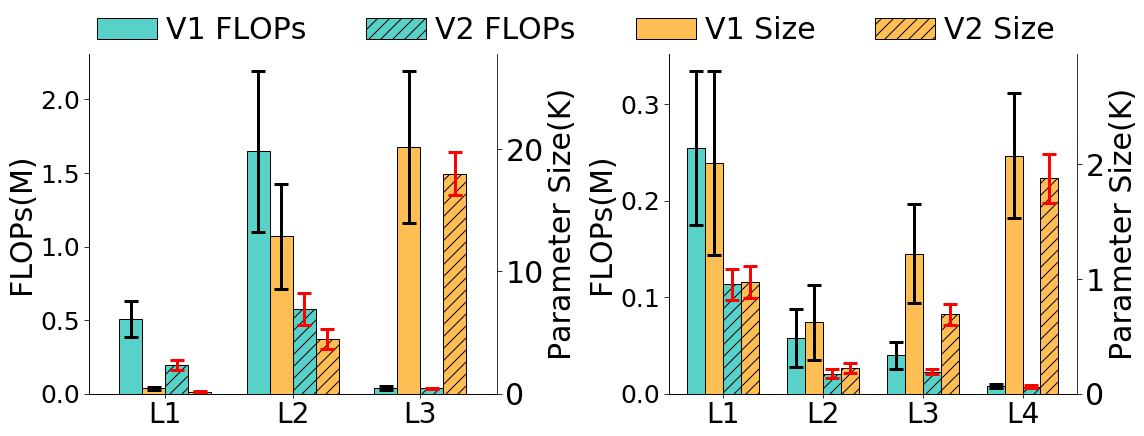

In [176]:
path = "/Users/zber/Documents/FGdroid/exp_result/v2_stability"
save_path = os.path.join(path, '{}.svg'.format('stability'))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5.5))
lines, labels = plot_stable_lenet(ax[0])
plot_stable_mbnet(ax[1])
# lines, labels = ax[0].get_legend_handles_labels()
fig.legend(lines, labels, loc='upper center',bbox_to_anchor=(0.5, 1.13),prop={'size': 30,},ncol=6,fancybox=True, framealpha=0.0,labelspacing=0.2,handletextpad = 0.3)
fig.tight_layout()
fig.savefig(save_path,format='svg', bbox_inches="tight")

# 3.Horizon v2

In [206]:
# time to acc
file= "/Users/zber/Desktop/v2_result/2_TH_FLOPS_AC/v2_mnist_flops.json"
with open(file, 'r') as f:
    lenet_data = json.load(f)


file= "/Users/zber/Desktop/v2_result/2_TH_FLOPS_AC/v2_har_flops.json"
with open(file, 'r') as f:
    mbnet_data = json.load(f)


f_size = 30
t_size = 20
lw = 4

In [210]:
print("LeNet MNIST")
for key in lenet_data.keys():
    flops = lenet_data[key][0][-1]
    acc=lenet_data[key][1][-1]
    print('{} -> flops: {:.4f} , acc: {:.4f}'.format(key,flops,acc))

print("")
print("MBNet HAR")
for key in mbnet_data.keys():
    flops = mbnet_data[key][0][-1]
    acc=mbnet_data[key][1][-1]
    print('{} -> flops: {:.4f} , acc: {:.4f}'.format(key,flops,acc))

LeNet MNIST
H1 -> flops: 0.9289 , acc: 99.0100
H2 -> flops: 1.0400 , acc: 98.9900
H3 -> flops: 0.6123 , acc: 98.9000
H4 -> flops: 0.5972 , acc: 99.0600
H5 -> flops: 0.9289 , acc: 99.0300

MBNet HAR
H1 -> flops: 0.2679 , acc: 94.6047
H2 -> flops: 0.2494 , acc: 93.2813
H3 -> flops: 0.1286 , acc: 95.0672
H4 -> flops: 0.2067 , acc: 94.7564
H5 -> flops: 0.2308 , acc: 94.5029


In [208]:
def plot_h(dic, colors, labels, ax):
    
    for key, color, label in zip(dic.keys(), colors, labels):        
        y = np.asarray(dic[key][1])
        
        length = len(y)
        x = np.asarray(dic[key][0][:length])
        ax.plot(x, y, color, label=label, linestyle='-', lw=lw,zorder=1)
        
    
    for key, color, label in zip(dic.keys(), colors, labels):        
        y = np.asarray(dic[key][1])
        length = len(y)
        x = np.asarray(dic[key][0][:length])
#         ax.plot(x, y, color, label=label, linestyle='-', lw=lw)
        
        markers_x = x[-1]
        markers_y = y[-1]
        
        ax.scatter(markers_x,markers_y, c= color, s = 200,marker='o', edgecolors=color,linewidths= lw,zorder=2)
#         markers_x = x[-1]
#         markers_y = y[-1]
        
#         ax.scatter(markers_x,markers_y, c= color, s = 200,marker='o', edgecolors=color,linewidths= lw)
#         error = np.asarray(dic[key][2][:length])
#         ax.fill_between(x, y-error, y+error, alpha=0.2, edgecolor=color, facecolor=color)
    
    #  set x, y labels
    ax.set_xlabel("FLOPs(M)",fontsize=f_size)
        
    # set x,y ticks
    ax.yaxis.set_tick_params(labelsize=t_size,length=5)
    ax.xaxis.set_tick_params(labelsize=f_size,length=5)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#     ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))
    
    # legend
#     ax.legend(loc="best", prop={'size': 20,},ncol=1,fancybox=True, framealpha=0.0,labelspacing=0.2,handletextpad = 0.3)
    
    # set title
#     plt.show()
#     fig.savefig(path)
#     plt.close(fig)

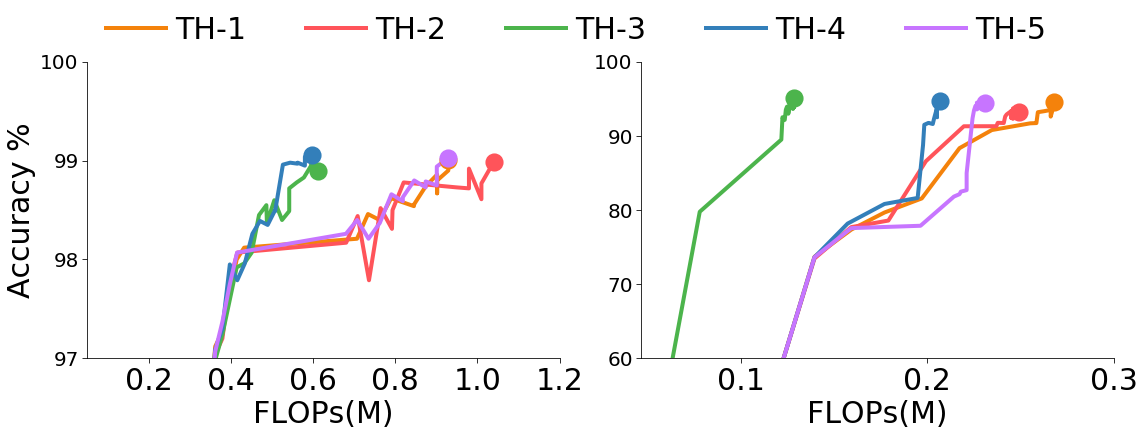

In [213]:
colors = ["#F4820B", "#FF545A", "#4CB44C","#337FBA" ,"#C775FF"]
labels = ["TH-1","TH-2", "TH-3","TH-4","TH-5"]
path = "/Users/zber/Documents/FGdroid/exp_result/v2_horizon"
save_path = os.path.join(path, '{}.svg'.format('horizon_new'))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5.5))
plot_h(lenet_data, colors, labels, ax[0])
plot_h(mbnet_data, colors, labels, ax[1])
ax[0].set_ylim(97,100)
ax[0].set_ylabel('Accuracy %',fontsize=f_size)
ax[0].set_xticks([0.2,0.4,0.6,0.8,1.0,1.2])
ax[1].set_xticks([0.1, 0.2,0.3])
ax[0].set_yticks([97,98,99,100])
ax[1].set_ylim(60,100)
# custom_lines = [Line2D([0], [0], color="#337FBA",  linestyle='-', lw=lw)]

new_lines, new_labels = ax[0].get_legend_handles_labels()
fig.legend(new_lines, new_labels, loc='upper center',bbox_to_anchor=(0.5, 1.13),prop={'size': f_size,},ncol=6,fancybox=True, 
           framealpha=0.0,labelspacing=0.2,handletextpad = 0.3)
fig.tight_layout()
fig.savefig(save_path,format='svg', bbox_inches="tight")

# 4. FLOPs-Time

In [291]:
file= "/Users/zber/Documents/FGdroid/exp_result/G_2_resource/Har/har_flops_new.json"
with open(file, 'r') as f:
    har_flops = json.load(f)

file= "/Users/zber/Documents/FGdroid/exp_result/G_2_resource/mnist_flops.json"
with open(file, 'r') as f:
    mnist_flops = json.load(f)
    
    
file= "/Users/zber/Desktop/v2_result/3_Time_FLOPs/v2_lenet_har.json"
with open(file, 'r') as f:
    v2_har_flops = json.load(f)

v2_har_flops["v1"] = har_flops["ours"]
v2_har_flops["standard"] = har_flops["standard"]

file= "/Users/zber/Desktop/v2_result/3_Time_FLOPs/v2_lenet_mnist.json"
with open(file, 'r') as f:
    v2_minist_flops = json.load(f)
    
v2_minist_flops["v1"] = mnist_flops["ours"]
v2_minist_flops["standard"] = mnist_flops["standard"]

f_size = 30
t_size = 25
lw =4

In [292]:
print('HAR LeNet')
for key in v2_har_flops.keys():
    time = v2_har_flops[key][0][-1]
    f=v2_har_flops[key][1][-1]
    if key.startswith('v2'):
        f = f
    else:
        f = f /10
    print('{} -> time: {:.2f}s , flops(m): {:.4f}'.format(key,time,f))


print('MNIST LeNet')
for key in v2_minist_flops.keys():
    time = v2_minist_flops[key][0][-1]
    f=v2_minist_flops[key][1][-1]
    if key.startswith('v2'):
        f = f
    else:
        f = f /10
    print('{} -> time: {:.2f}mins , flops(m): {:.4f}'.format(key,time,f))




HAR LeNet
v2 -> time: 50.35s , flops(m): 0.2442
v1 -> time: 64.80s , flops(m): 0.5180
standard -> time: 298.28s , flops(m): 2.9361
MNIST LeNet
v2 -> time: 25.67mins , flops(m): 0.5796
v1 -> time: 33.43mins , flops(m): 1.7525
standard -> time: 49.21mins , flops(m): 4.6454


In [293]:
file= "/Users/zber/Desktop/v2_result/3_Time_FLOPs/v2_mbnet_har.json"
with open(file, 'r') as f:
    mb_har_flops = json.load(f)

file= "/Users/zber/Desktop/v2_result/3_Time_FLOPs/v2_mbnet_myhealth.json"
with open(file, 'r') as f:
    mb_myhealth_flops = json.load(f)  


file= "/Users/zber/Desktop/v2_result/3_Time_FLOPs/v2_mbnet_emg.json"
with open(file, 'r') as f:
    mb_emg_flops = json.load(f)  


print('HAR MobileNet')
for key in mb_har_flops.keys():
    time = mb_har_flops[key][0][-1]
    f=mb_har_flops[key][1][-1]
    print('{} -> time: {:.2f}s , flops(m): {:.4f}'.format(key,time,f))

print()
print('myHealth MobileNet')
for key in mb_myhealth_flops.keys():
    time = mb_myhealth_flops[key][0][-1]
    f=mb_myhealth_flops[key][1][-1]
    print('{} -> time: {:.2f}s , flops(m): {:.4f}'.format(key,time,f))

print()
print('EMG MobileNet')
for key in mb_emg_flops.keys():
    time = mb_emg_flops[key][0][-1]
    f=mb_emg_flops[key][1][-1]
    print('{} -> time: {:.2f}s , flops(m): {:.4f}'.format(key,time,f))

HAR MobileNet
v1 -> time: 676.54s , flops(m): 0.2638
v2 -> time: 497.67s , flops(m): 0.1281
standard -> time: 848.49s , flops(m): 1.1350

myHealth MobileNet
v1 -> time: 313.31s , flops(m): 0.6633
v2 -> time: 133.48s , flops(m): 0.4220
standard -> time: 363.89s , flops(m): 1.2572

EMG MobileNet
v1 -> time: 618.50s , flops(m): 0.2900
v2 -> time: 365.19s , flops(m): 0.1210
standard -> time: 791.39s , flops(m): 0.7362


In [294]:
colors = ["#FF545A", "#4CB44C", "#337FBA"] 

labels = ["MDLdroidLite+", "MDLdroidLite", "Full Size"]

def plot_flop(dic, colors, labels, ax, switch=False):

    for key, color, label in zip(['v2','v1','standard'], colors, labels):
        if key.startswith('v2') or switch:
            y = np.asarray(dic[key][1])
        else:
            y = np.asarray(dic[key][1]) /10
        x = np.asarray(dic[key][0])
        markers_x = x[-1]
        markers_y = y[-1]
        ax.plot(x, y, color, label=label, linestyle='-', lw=lw, zorder=2)
        ax.scatter(markers_x,markers_y, c= color, s = 200,marker='o', edgecolors=color,linewidths= lw, zorder=5) 

    ax.xaxis.set_tick_params(labelsize=f_size,length=5)
    ax.yaxis.set_tick_params(labelsize=t_size,length=5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    

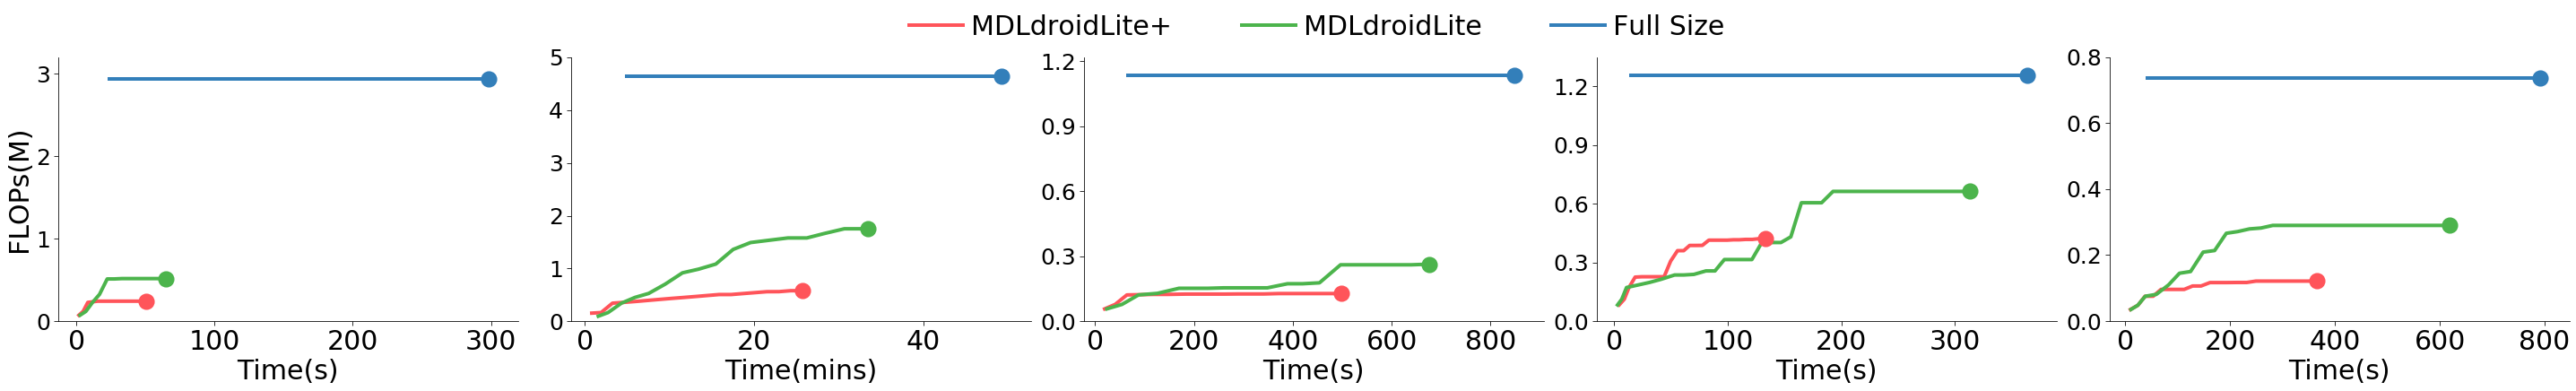

In [295]:
path = "/Users/zber/Documents/FGdroid/exp_result/v2_flops_time"
save_path = os.path.join(path, '{}.svg'.format('flops_time'))
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(40, 5.5))
plot_flop(v2_har_flops, colors, labels, ax[0])
plot_flop(v2_minist_flops, colors, labels, ax[1])
plot_flop(mb_har_flops, colors, labels, ax[2], switch=True)
plot_flop(mb_myhealth_flops, colors, labels, ax[3], switch=True)
plot_flop(mb_emg_flops, colors, labels, ax[4], switch=True)
ax[0].set_xlabel("Time(s)",fontsize=f_size)
ax[2].set_xlabel("Time(s)",fontsize=f_size)
ax[3].set_xlabel("Time(s)",fontsize=f_size)
ax[4].set_xlabel("Time(s)",fontsize=f_size)
ax[1].set_xlabel("Time(mins)",fontsize=f_size)
ax[0].set_ylabel("FLOPs(M)",fontsize=f_size)
ax[0].set_ylim(0, 3.2)
ax[1].set_ylim(0, 5)
ax[2].set_yticks([0.0, 0.3,0.6,0.9,1.2])
ax[3].set_yticks([0.0, 0.3,0.6,0.9,1.2])
ax[4].set_yticks([0.0, 0.2,0.4,0.6,0.8])
lines, labels = ax[0].get_legend_handles_labels()

fig.legend(lines, labels, loc='upper center',bbox_to_anchor=(0.51, 1.13),prop={'size': 30,},ncol=3,
           fancybox=True, framealpha=0.0,labelspacing=0.2,handletextpad = 0.3,columnspacing =2.6)
fig.tight_layout()
fig.savefig(save_path,format='svg', bbox_inches="tight")

# 5. AC to Time

In [345]:
file= "/Users/zber/Documents/FGdroid/exp_result/G_1_acc_to_time/acc_time_har.json"
with open(file, 'r') as f:
    har_data = json.load(f)

file= "/Users/zber/Documents/FGdroid/exp_result/G_1_acc_to_time/acc_time_minist_all.json"
with open(file, 'r') as f:
    minist_data = json.load(f)
    

file = "/Users/zber/Desktop/v2_result/4_Time_ACC/lenet_mnist.json"
with open(file, 'r') as f:
    v2_minist_data = json.load(f)
    v2_minist_data['vold'] = minist_data['ours']
    v2_minist_data['standard'] = minist_data['standard']

    
file = "/Users/zber/Desktop/v2_result/4_Time_ACC/mbnet_har.json"
with open(file, 'r') as f:
    v2_har_data = json.load(f)

    
f_size = 30
t_size = 25
lw = 3
# colors = ["#FF545A","#C775FF" ,"#F4820B","#337FBA","#4CB44C"] #  "#FF545A"
# labels = ["NeST","Net2net","CGaP","Full Size","FGdriod"]



# rank. bridging ours , full size, search
# colors = ["#4CB44C","#337FBA" ,"#F4820B","#C775FF","#FF545A"] #  "#FF545A"
# labels = ["RIC-adaption","Full Size","CGaP","Net2net","NeST"]


colors = ["#FF545A", "#4CB44C", "#337FBA"] 

labels = ["MDLdroidLite+", "MDLdroidLite", "Full Size"]


In [346]:
print('HAR')
for key in har_data.keys():
    l= len(har_data[key][1])
    time = har_data[key][0][l-1]
    acc=har_data[key][1][-1]
    print('{} -> time: {:.2f}s , acc: {:.4f}'.format(key,time,acc))
    print(l)

print('')

print('MNIST')
for key in minist_data.keys():
    l = len(minist_data[key][1])
    acc=minist_data[key][1][-1]
    time = minist_data[key][0][l-1]
    print('{} -> time: {:.2f}mins , acc: {:.4f}'.format(key,time,acc))
    print(l)

def print_info(dic):
    for key in dic.keys():
        l = len(dic[key][1])
        acc=dic[key][1][-1]
        time = dic[key][0][l-1]
        print('{} -> time: {:.2f}mins , acc: {:.4f}'.format(key,time,acc))
        print(l)

HAR
rank -> time: 186.68s , acc: 95.1815
29
bridging -> time: 154.11s , acc: 95.1589
25
ours -> time: 60.33s , acc: 95.0846
19
standard -> time: 755.61s , acc: 94.6047
30
search -> time: 203.10s , acc: 95.1306
10

MNIST
bridging -> time: 106.11mins , acc: 99.0217
36
ours -> time: 33.43mins , acc: 99.0550
17
search -> time: 153.56mins , acc: 99.0567
23
rank -> time: 103.84mins , acc: 99.0433
30
standard -> time: 49.21mins , acc: 99.0300
10


In [351]:
print("MNIST LeNet")
print_info(v2_minist_data)
print()
print("HAR MobileNet")
print_info(v2_har_data)

MNIST LeNet
vnew -> time: 25.67mins , acc: 99.0400
19
vold -> time: 33.43mins , acc: 99.0550
17
standard -> time: 49.21mins , acc: 99.0300
10

HAR MobileNet
vold -> time: 676.54mins , acc: 95.1056
20
vnew -> time: 497.67mins , acc: 95.2202
18
standard -> time: 848.49mins , acc: 95.5530
15


In [348]:
def plot_har(dic, colors, labels, ax):
    
    keys = ['vnew','vold','standard']
    for key, color, label in zip(keys, colors, labels):        
        y = dic[key][1]
        length = len(y)
        x = dic[key][0][:length]
        ax.plot(x, y, color, label=label, linestyle='-', lw=lw)
        
        error = np.asarray(dic[key][2][:length])
        ax.fill_between(x, y-error, y+error, alpha=0.2, edgecolor=color, facecolor=color)
    
    #  set x, y labels
    
    ax.set_xlabel("Time(mins)",fontsize=f_size)
        
    # set x,y ticks
    ax.yaxis.set_tick_params(labelsize=t_size,length=5)
    ax.xaxis.set_tick_params(labelsize=f_size,length=5)

    ax.set_ylim(70,100)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # legend
#     ax.legend(loc="best", prop={'size': 20,},ncol=1,fancybox=True, framealpha=0.0,labelspacing=0.2,handletextpad = 0.3)
    
    # set title
#     plt.show()
#     fig.savefig(path)
#     plt.close(fig)

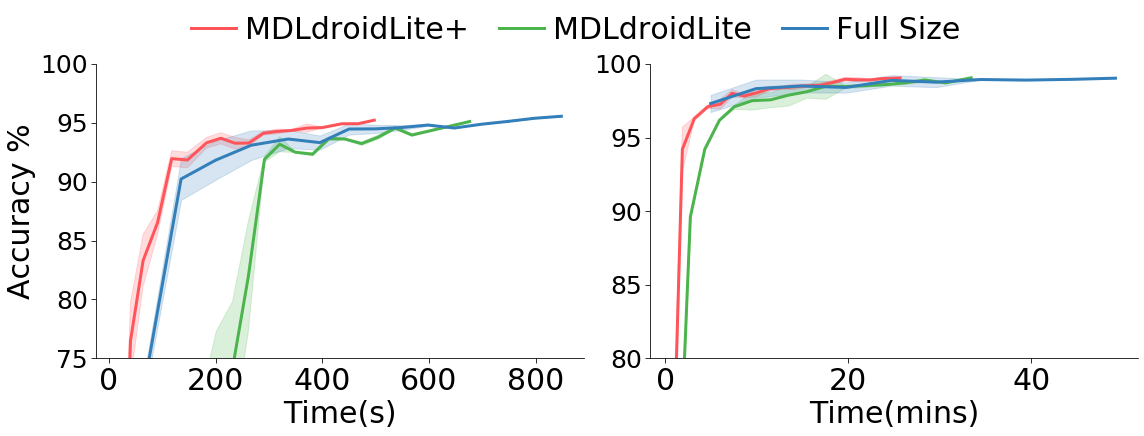

In [350]:
path = "/Users/zber/Documents/FGdroid/exp_result/v2_time_acc/"
save_path = os.path.join(path, '{}.svg'.format('grow_acc_new'))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5.5))
# custom_lines = [Line2D([0], [0], color="#337FBA",  linestyle='-', lw=lw)]
plot_har(v2_har_data, colors, labels, ax[0])
plot_har(v2_minist_data, colors, labels, ax[1])
# ax[0].set_xlim(0,230)
ax[0].set_xlabel("Time(s)",fontsize=f_size)
ax[0].set_ylabel('Accuracy %',fontsize=f_size)
ax[1].set_ylim(80,100)
ax[0].set_ylim(75,100)
new_lines, new_labels = ax[0].get_legend_handles_labels()

# sorted_labels = []
# sorted_lines = []

# for la in ["MDLdroidLite","Full Size","CGaP","NeST",  "S-search"]:
#     i = new_labels.index(la)
#     sorted_lines.append(new_lines[i])
#     sorted_labels.append(la)
    
    

fig.legend(new_lines, new_labels, loc='upper center',bbox_to_anchor=(0.50, 1.13),prop={'size': 30,},
           ncol=3,fancybox=True, framealpha=0.0,labelspacing=0.15,handletextpad = 0.3,columnspacing =1.0,handlelength=1.5)
plt.subplots_adjust(wspace=0.2)
fig.tight_layout()
fig.savefig(save_path,format='svg', bbox_inches="tight")

In [ ]:
v= [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M']

v1 = []
for i in v:
    if isinstance(i,int):
        n = i * 0.7
        n = math.floor(n)
        v1.append(n)
    else:
        v1.append(i)

In [ ]:
def str_to_float(str):
    num_list = []
    str = str[1:-1]
    str_arry = str.split(', ')
    for num in str_arry:
        num_list.append(float(num))
    return np.asarray(num_list)

In [ ]:
def plot_total(dic, path, title='Grad'):
    colour_list = ['b', 'g', 'yellow', 'black', 'm', 'khaki']
    for layer in dic.keys():

        path = os.path.join(dir, '{}_{}.png'.format(title, layer))

        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

        for key, colour in zip(dic[layer].keys(), colour_list):
            x = np.arange(len(dic[layer][key]))
            ax.plot(x, dic[layer][key], colour, label='{}'.format(key))
        if title == 'Grad':
            for i in grow_epochs:
                point_x = i * (600 / 50) - 1
                plt.axvline(x=point_x, color='grey', linestyle='--', alpha=0.5)

        ax.legend()
        plt.title(title)
        fig.savefig(path)
        plt.close(fig)

In [ ]:
def plot_save(dic, path, colors, labels, length, title='Grad'):
    
    # pdf file name
    path = os.path.join(path, '{}.pdf'.format(title))

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

    for key, color, label in zip(dic.keys(), colors, labels):
        x = np.arange(len(dic[key][:length]))
        ax.plot(x, dic[key][:length], color, label=label, linestyle='-', lw='2')
    
    #  set x, y labels
    ax.set_ylabel('Loss',fontsize=30)
    ax.set_xlabel("# Epochs",fontsize=30)
    
    # set x,y ticks
    ax.yaxis.set_tick_params(labelsize=30,length=5)
    ax.xaxis.set_tick_params(labelsize=30,length=5)
    
    # set x,y lims
    ax.set_xlim(0, length-1)
    
    # legend
    ax.legend(loc="best", prop={'size': 20,},ncol=1,fancybox=True, framealpha=0.0,labelspacing=0.1,handletextpad = 0.3)

    
    # set title
#     plt.title(title)
    plt.show()
    fig.savefig(path)
    plt.close(fig)

In [ ]:
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time(sec)',fontsize=30)
ax.set_xlabel("# Devices",fontsize=30)
#ax.set_title('epoches by nodes',fontsize=18,fontweight="bold")
#ax.set_yticklabels(fontsize=20)
ax.yaxis.set_tick_params(labelsize=30,length=5)
ax.set_xticks(ind)
ax.set_xticklabels(('3', '4', '5','6','7','8','9'),fontsize=30)
ax.legend(loc="upper left", prop={'size': 20,},ncol=1,bbox_to_anchor=(0.0, 1),fancybox=True, framealpha=0.0,labelspacing=0.1,handletextpad = 0.3)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
 

# def autolabel(rects, xpos='center'):
#     """
#     Attach a text label above each bar in *rects*, displaying its height.

#     *xpos* indicates which side to place the text w.r.t. the center of
#     the bar. It can be one of the following {'center', 'right', 'left'}.
#     """

#     ha = {'center': 'center', 'right': 'left', 'left': 'right'}
#     offset = {'center': 0, 'right': 1, 'left': -1}

#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(offset[xpos]*3, 3),  # use 3 points offset
#                     textcoords="offset points",  # in both directions
#                     ha=ha[xpos], va='bottom')


# autolabel(rects1, "left")
# autolabel(rects2, "right")

fig.tight_layout()

labelsize=20
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)  
plt.show()
fig.savefig('/Users/zber/Desktop/1_Data/Evaluation_Graph/RL_train_speed.pdf', format='pdf', dpi=1000,bbox_inches = 'tight',
    pad_inches = 0)

# loss curve

In [507]:
file1 = "/Users/zber/Documents/FGdroid/exp_result/MD_2/rank_mean_std.json"
# path1 = os.path.dirname(file1)
with open(file1, 'r') as f:
    data1 = json.load(f)

In [508]:
l0_std = data1['0']['standard'] 
l1_std = data1['1']['standard'] 
l2_std = data1['2']['standard'] 

In [509]:
L1 = data['0']
L2 = data['1']
L3 = data['2']
colors = ["#FF545A","#337FBA","#FFBE54",'#4CB44C',"#58D2C9","#420278"]
labels = ["Tiny Size","1st-Growth","2nd-Growth","3rd-Growth","4th-Growth","5th-Growth","6th-Growth"]
length = 360

KeyError: '0'

In [510]:
def plot_save(dic, path, colors, labels, length, ax ,title='Grad'):
    total_length = 360
    num_data_point = 12

    # pdf file name

#     fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

    for key, color, label in zip(dic.keys(), colors, labels):
        x_starts = dic[key][0]
        y = np.asarray(dic[key][1])
        error = np.asarray(dic[key][2])
        x = np.arange(x_starts*num_data_point, total_length)
        ax.plot(x, y, color, label=label, linestyle='-', lw='2')
        ax.fill_between(x, y-error, y+error,alpha=0.2, edgecolor=color, facecolor=color)
    
    #  set x, y labels
#     ax.set_ylabel('Loss',fontsize=30)
    ax.set_xlabel("#Epochs",fontsize=25)
    
    # set x,y ticks
    ax.set_xticks(np.arange(0,361,60)) 
    ax.set_xticklabels(np.arange(0,31,5))
#     ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
    ax.xaxis.set_tick_params(labelsize=25,length=5)

    
    # set x,y lims
    ax.set_xlim(0, length)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    

    
    # legend
    ax.legend(loc="upper center",bbox_to_anchor=(0.5, 1.1), prop={'size': 15,},ncol=3,fancybox=True, framealpha=0.0,labelspacing=0.2,handletextpad = 0.3)

    
    # set title
#     plt.show()
#     fig.savefig(path)
#     plt.close(fig)

IndexError: list index out of range

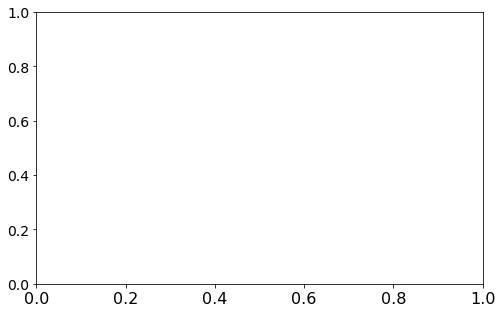

In [511]:
save_path = os.path.join(path, '{}.pdf'.format('bridging'))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
plot_save(L1, path, colors, labels,length,ax=ax, title='bridging')
ax.yaxis.set_tick_params(labelsize=20)
fig.tight_layout()
fig.savefig(save_path)

IndexError: list index out of range

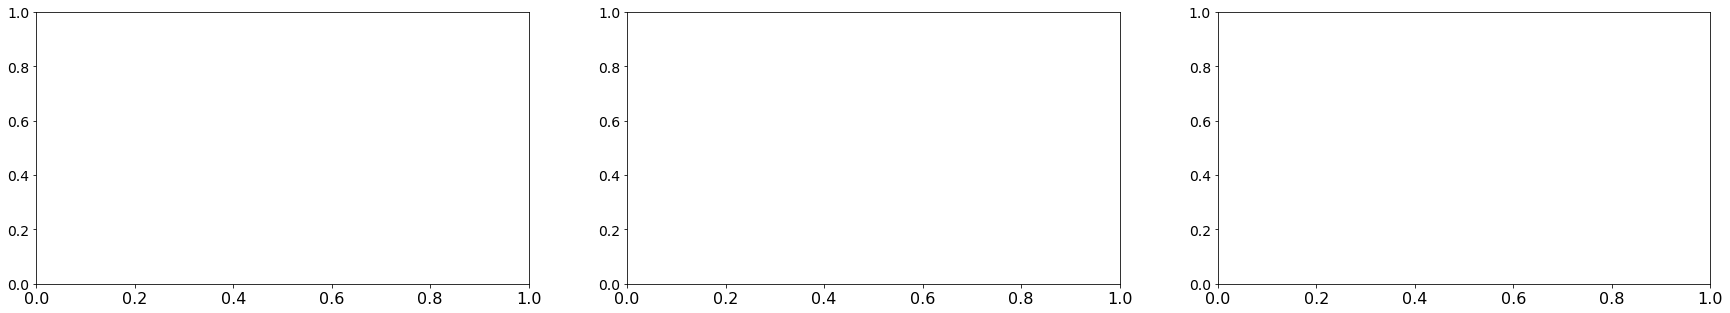

In [512]:
save_path = os.path.join(path, '{}.pdf'.format('bridging'))
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 5))
plot_save(L1, path, colors, labels,length,ax=ax[0], title='bridging')
plot_save(L2, path, colors, labels,length,ax=ax[1], title='bridging')
plot_save(L3, path, colors, labels,length,ax=ax[2], title='bridging')
ax[0].set_ylabel('Growth Score',fontsize=25)
ax[0].yaxis.set_tick_params(np.arange(0, 0.04, 0.01),labelsize=25,)
ax[1].yaxis.set_tick_params(np.arange(0, 0.06, 0.01),labelsize=25,)
ax[2].yaxis.set_tick_params(np.arange(0, 0.11, 0.01),labelsize=25,)
std_x = np.arange(0,360)
std_y1 = data1['0']['standard'] 
std_y2 = data1['1']['standard'] 
std_y3 = data1['2']['standard']
ax[0].plot(std_x, std_y1, 'b', label='Standard', linestyle='-', lw='2')
ax[1].plot(std_x, std_y2, 'b', label='Standard', linestyle='-', lw='2')
ax[2].plot(std_x, std_y3, 'b', label='Standard', linestyle='-', lw='2')

# ax[0].set_ylim(-0.003, 0.04)
# ax[1].set_ylim(-0.005, 0.06)
# ax[2].set_ylim(-0.005, 0.11)
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center',bbox_to_anchor=(0.5, 1.1),prop={'size': 20,},ncol=6,fancybox=True, framealpha=0.0,labelspacing=0.2,handletextpad = 0.3)
fig.tight_layout()
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=None)
plt.subplots_adjust(wspace=0.13)
fig.savefig(save_path)

# Grow score( cos_sim(loss, s))

In [513]:
file = "/Users/zber/Documents/FGdroid/exp_result/MD_1/dic.json"
path = os.path.dirname(file)
with open(file, 'r') as f:
    data = json.load(f)
    
def generator(window, full_data):
    for i in range(0, len(full_data), window):
        yield i, i + window

In [514]:
# g_data['1']['structure10'][11] 
# g_data['1']['structure30'][23] 
# g_data['1']['structure50'][35] 
# g_data['1']['structure70'][47] 
# g_data['1']['structure100'][57]


# [0.88,0.63,0.40,0.32,0.32,0.26]

In [515]:
# 10%, 30%, 60%, 100%
file = "/Users/zber/Documents/FGdroid/exp_result/grow_score/score.json"
path = os.path.dirname(file)
with open(file, 'r') as f:
    data = json.load(f)

In [516]:
def plot_save_score(dic, colors, labels, length,ax,styles ,k="1"):
    
    # pdf file name
#     path = os.path.join(path, '{}.pdf'.format(title))

#     fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))

    for key, color, label,style in zip(dic[k].keys(), colors, labels, styles):
#         if key == 'structure90':
#             continue
        x = np.arange(len(dic[k][key][:length]))
        ax.plot(x, dic[k][key][:length], color, label=label, linestyle=style, lw=lw)
    
    #  set x, y labels
    ax.set_ylabel('Growth Score',fontsize=f_size)
    ax.set_xlabel("#Epoch",fontsize=f_size)
    
    # set x,y ticks
    ax.yaxis.set_tick_params(labelsize=t_size,length=5)
    ax.xaxis.set_tick_params(labelsize=f_size,length=5)
    
    # disable top and right spine
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # set x,y lims
    ax.set_xlim(0, length)
    ax.set_ylim(0.2,1.0)
    
    
    custom_lines = [Line2D([0], [0], color='red', lw=4,marker='o', ls='--' ,ms=16, markerfacecolor="None", markeredgecolor='red',
          markeredgewidth = 4)]
    ax.legend(custom_lines, ['Growth Path'],loc='upper right', fontsize=22,ncol=1,fancybox=True, 
              framealpha=0.0,labelspacing=0.1,handletextpad = 0.3, handlelength=2.5)
    
    # legend
#     ax.legend(loc="best", prop={'size': 20,},ncol=1,fancybox=True, framealpha=0.0,labelspacing=0.2,handletextpad = 0.3)
    
    # set title
#     plt.show()
#     fig.savefig(path)
#     plt.close(fig)

In [517]:
# colors = ['b','g','r','black']
# labels = ["10%Size","30%Structure","60%Structure","100%Structure"]
# plot_save_score(data, path, colors, labels,length, title='grow_score')

# Method Loss

In [518]:
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
labels = ["10% Size", "30% Size", "50% Size", "70% Size", "Full Size"] #"90% Size",
colors = ["#F4820B","#337FBA","#FFBE54",'#4CB44C',"#149FEB" ] #420278 ,"#149FEB" "#58D2C9"
# style = 
file = "/Users/zber/Documents/FGdroid/exp_result/MD_1/dic_loss.json"
path = os.path.dirname(file)
f_size = 30
t_size = 20
length = 60
lw = 3
with open(file, 'r') as f:
    data = json.load(f)

g_file = "/Users/zber/Documents/FGdroid/exp_result/MD_1/dic.json"
with open(g_file, 'r') as f:
    g_data = json.load(f)
x_size = [11,23,35,47,56.5]
y_size = [0.88,0.63,0.40,0.32,0.28]

del data['structure90']
del g_data['1']['structure90']

In [519]:
def plot_save(dic,colors, labels, length, ax, styles):
    
    # pdf file name
#     path = os.path.join(path, '{}.pdf'.format(title))

#     fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
    length = 60
    
    axins = zoomed_inset_axes(ax, 3.5, loc ='upper center') # ,bbox_to_anchor=(0, 0.5)
    
    for key, color, label, style in zip(dic.keys(), colors, labels,styles):
        x = np.arange(len(dic[key][0][:length]))
        ax.plot(x, dic[key][0][:length], color, label=label, linestyle=style, lw=lw)
        axins.plot(x, dic[key][0][:length], color, label=label, linestyle=style, lw=lw)
    
    #  set x, y labels
    ax.set_ylabel('Loss',fontsize=f_size)
    ax.set_xlabel("#Epoch",fontsize=f_size)
    
    # set x,y ticks
    ax.yaxis.set_tick_params(labelsize=t_size,length=5)
    ax.xaxis.set_tick_params(labelsize=f_size,length=5)

    
    # set x,y lims
    ax.set_xlim(0, length-1)
    ax.set_ylim(1.45, 1.65)
    # disable top and right spine
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # set axins limits
    x1, x2, y1, y2 = 50.8, 58.5, 1.467, 1.50 # specify the limits
    axins.set_xlim(x1, x2) # apply the x-limits
    axins.set_ylim(y1, y2)
    
    ax.set_xlim(0, 60)
    
    axins.set_xticks([])
    axins.set_yticks([])
    
    #boarder

    mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5",  ls = '--',lw=2, alpha=0.5)
    
    
    # legend
#     ax.legend(loc="center",bbox_to_anchor=(0.45, 1.05), prop={'size': 18,},ncol=3,fancybox=True, framealpha=0.0,labelspacing=0.2,handletextpad = 0.3)
    
    # set title

#     fig.savefig(path)
#     plt.close(fig)

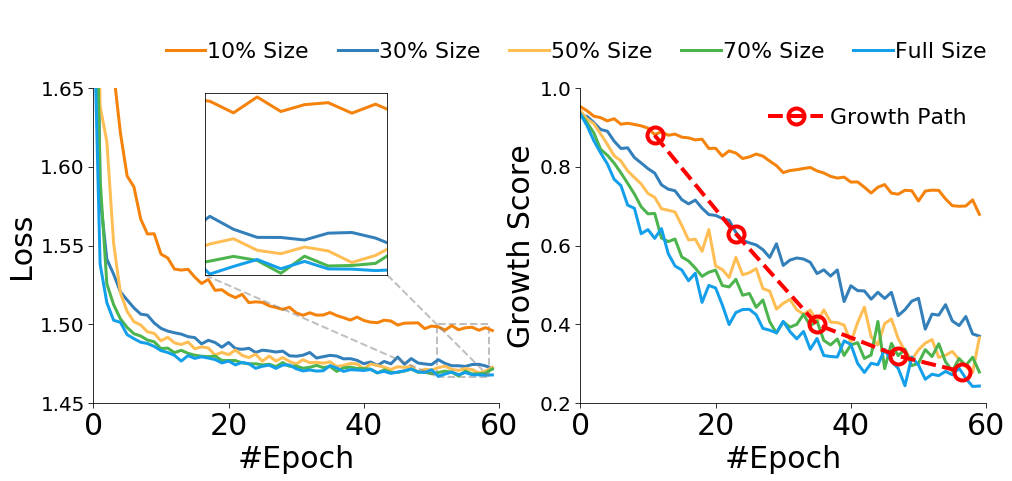

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  del sys.path[0]


In [402]:
save_path = os.path.join(path, '{}.svg'.format('loss_grow_score'))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5.8))
styles=['-','-','-','-','-','-']
plot_save(data, colors, labels, length, ax[0], styles)
plot_save_score(g_data, colors, labels,length,ax[1], styles )
ax[1].plot(x_size,y_size,c='red' ,marker='o', ls='--' ,lw=4,ms=16, markerfacecolor="None", markeredgecolor='red',
          markeredgewidth = 4)
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center',bbox_to_anchor=(0.50, 1.1),fontsize = 22, ncol=6,
           framealpha=0.0,handletextpad = 0.1,columnspacing =1.3,handlelength=1.8)

plt.show()
fig.tight_layout()
# plt.subplots_adjust(left=None, bottom=None, right=None, top=0.2, wspace=0.1, hspace=None)
# plt.subplots_adjust(wspace=0.13)
fig.savefig(save_path,format='svg', bbox_inches="tight")

# Accuracy

In [48]:
file = "/Users/zber/Documents/FGdroid/exp_result/A_5_Acc/acc_all_new.json"
path = os.path.dirname(file)
with open(file, 'r') as f:
    acc = json.load(f)

In [49]:
def plot_acc(dic, colors, labels, ax):

    for key, colour, label in zip(dic.keys(), colors, labels):
        y = np.asarray(dic[key][1])
        x = dic[key][0]
        error = np.asarray(dic[key][2])
        ax.fill_between(x, y-error, y+error, alpha=0.2, edgecolor=colour, facecolor=colour)
        ax.plot(x, y, colour, label=label, linestyle='-', lw=lw)

    ax.set_ylabel('Accuracy%',fontsize=f_size)
    ax.set_xlabel("Time(mins)",fontsize=f_size)
    
    
    ax.set_xticks(np.arange(0,101,20)) 

    # set x,y ticks
    ax.yaxis.set_tick_params(labelsize=t_size,length=5)
    ax.xaxis.set_tick_params(labelsize=f_size,length=5)
    
    
#     ax.set_ylim(1.45, 1.85)
    
    # set x,y lims
#     plt.xticks(np.arange(0,361,60), np.arange(0,31,5))
    ax.set_xlim(0,105)
#       rotation=20)
    
            
    # set x lables
#     ax.set_xticks(np.arange(0,361,60)) 
#     ax.set_xticklabels(np.arange(0,31,5))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # legend
#     ax.legend(loc="upper right", bbox_to_anchor=(0.5, 1.25), fontsize=15, ncol=6,fancybox=True, framealpha=0.0,labelspacing=0.2,handletextpad = 0.3)
    
    # set title
#     plt.show()
#     fig.savefig(path)
#     plt.close(fig)

# Loss 

In [50]:
# file = "/Users/zber/Documents/FGdroid/exp_result/loss_all/loss.json"
# file = "/Users/zber/Documents/FGdroid/exp_result/A_3_Loss/loss_all.json"
file = "/Users/zber/Documents/FGdroid/exp_result/A_3_Loss/loss_all.json"
path = os.path.dirname(file)
with open(file, 'r') as f:
    loss = json.load(f)
# target_path = os.path.join(path, '{}.pdf'.format('rank_loss'))
# f_size = 25
# t_size = 20
# lw = 3
# colors = ["#FF545A","#337FBA","#FFBE54",'#4CB44C',"#58D2C9","#420278"]
# labels = ["Bridging","Copy","Rank","Ours","Standard"]

In [51]:
def plot_loss(dic, colors, labels,ax ):

    for key, colour, label in zip(dic.keys(), colors, labels):
        y = np.asarray(dic[key][0])
        x = np.arange(0,len(y))
        error = np.asarray(dic[key][1])
        ax.fill_between(x, y-error, y+error, alpha=0.2, edgecolor=colour, facecolor=colour)
        ax.plot(x, y, colour, label=label, linestyle='-', lw=lw)

       #  set x, y labels
    ax.set_ylabel('Loss',fontsize=f_size)
    ax.set_xlabel("#Epoch",fontsize=f_size)
    
    
    # set x,y ticks
    ax.yaxis.set_tick_params(labelsize=t_size,length=5)
    ax.xaxis.set_tick_params(labelsize=f_size,length=5)
    
    
    ax.set_xticks(np.arange(0,361,60)) 
    ax.set_xticklabels(np.arange(0,31,5))
    
    # set x,y lims
    ax.set_ylim(1.45, 1.85)
    ax.set_xlim(0,361)
#       rotation=20)
    
            
    # set x lables
    ax.set_xticks(np.arange(0,361,60)) 
    ax.set_xticklabels(np.arange(0,31,5))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # legend
#     ax.legend(loc="upper right", prop={'size': f_size,},ncol=1,fancybox=True, framealpha=0.0,labelspacing=0.2,handletextpad = 0.3)
    
    # set title
#     plt.show()
#     fig.savefig(path)
#     plt.close(fig)

In [52]:
f_size = 30
t_size = 20
lw = 3
# colors = ["#FF545A","#C775FF" ,"#F4820B","#337FBA","#4CB44C"] #  "#FF545A"
# labels = ["NeST","Net2net","CGaP","Full Size","FGdriod"]

colors = ["#4CB44C", "#337FBA" ,"#F4820B","#C775FF","#FF545A"] #  "#FF545A"
labels = ["MDLdroidLite","Full Size","CGaP-select","Net2WiderNet","NeST-bridge"]
# labels = ["RIC-adaption","Full Size","CGaP","Net2net","NeST"]

#labels = [NeST-bridge, CGaP-select, Net2WiderNet]


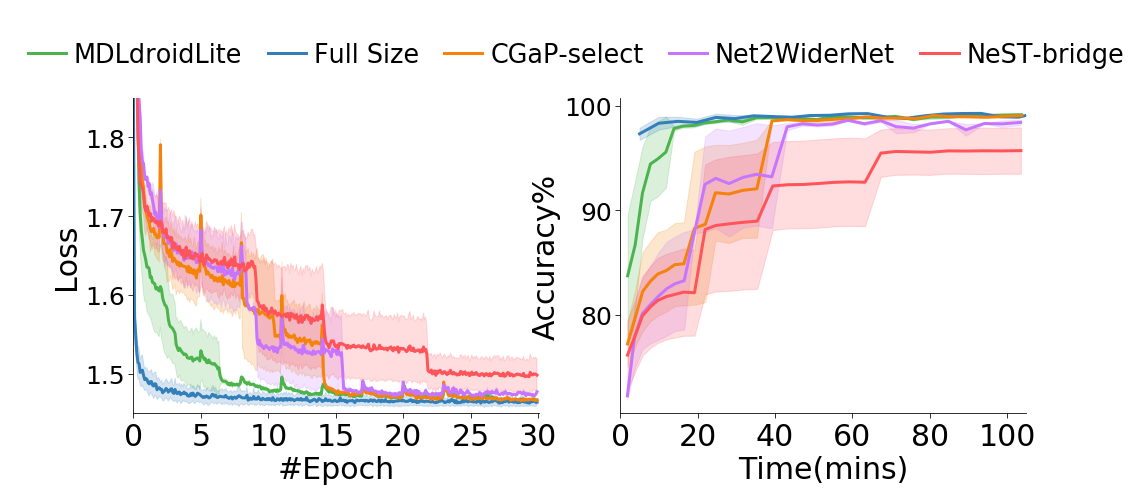

In [78]:
path = "/Users/zber/Documents/FGdroid/exp_result/A_5_Acc"
save_path = os.path.join(path, '{}.svg'.format('loss_acc_new'))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5.8))
plot_loss(loss, colors, labels, ax[0])
plot_acc(acc, colors,labels,ax[1])


handles, labels = ax[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center',bbox_to_anchor=(0., 1.13),fontsize = 23, ncol=6,
#            framealpha=0.0,handletextpad = 0.15,columnspacing =0.8,handlelength=1.5)
fig.legend(handles, labels, loc='upper center',bbox_to_anchor=(0.5, 1.13),prop={'size': 25.5,},
           ncol=6,fancybox=True, framealpha=0.0,labelspacing=0.15,handletextpad = 0.3,columnspacing =1.0,handlelength=1.5)


# ax[0].scatter([78], [1.5], label='Growth', marker='v', s=120, facecolor="None", edgecolors='red',lw=2.0)
# ax[1].scatter([13.8], [98], label='Growth', marker='v', s=120, facecolor="None", edgecolors='red',lw=lw)

plt.show()
fig.tight_layout()
fig.savefig(save_path,format='svg', bbox_inches="tight")

# rank baseline, slow loss convergence

In [800]:
file = "/Users/zber/Documents/FGdroid/exp_result/MD_2/rank_standard_variance.json"
path = os.path.dirname(file)
with open(file, 'r') as f:
    data = json.load(f)
    
bri_file = "/Users/zber/Documents/FGdroid/exp_result/MD_3/bridging_channel_s.json"
with open(bri_file, 'r') as f:
    bri_data = json.load(f)
    
f_size = 30
t_size = 20
length = 30

bri_l2 = bri_data['1']
l2 = data['1']
lw = 3

rank_x=[22,59,96,132,168,204,240,276]
rank_y=[0.09653400292429284, 0.09552870183674853, 0.06377551665235352, 0.055956445876611235, 0.03955654307785865, 
        0.028784919606030756, 0.024711211812421773, 0.030497201654308047]

s = 0
for i in [22,59,96,132,168,204,240,276]:
    j = rank_data['rank'][0][i]
    k = rank_data['rank'][1][i]
    print(j+k)

In [801]:
bri_data = bri_l2['bridging2']  #['bridging1', 'bridging2', 'bridging3']

rank_data = {}
rank_data['rank'] = l2['rank1']
rank_data['standard'] = l2['standard']

bri_labels = ["Tiny Size","1st-Grow","2nd-Grow","3rd-Grow","4th-Grow","5th-Grow","6th-Grow"]
bri_colors =["#FF545A","#FFBE54",'#4CB44C',"#149FEB","#420278","#F4820B"]

colors = ["#FFBE54","#337FBA"]
labels = ["CGaP-select","Full Size"]

In [802]:
def plot_bridging(dic, colors, labels, length, ax):
    total_length = 360
    num_data_point = 12

    # pdf file name

#     fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

    for key, color, label in zip(dic.keys(), colors, labels):
        x_starts = dic[key][0]
        y = np.asarray(dic[key][1])
#         error = np.asarray(dic[key][2])
        x = np.arange(x_starts*num_data_point, total_length)
        ax.plot(x, y, color, label=label, linestyle='-', lw=lw)
#         ax.fill_between(x, y-error, y+error,alpha=0.2, edgecolor=color, facecolor=color)

    
    
    y = np.asarray(rank_data['standard'][0])
    x = np.arange(0,len(y))
    error = np.asarray(rank_data['standard'][1])
    ax.fill_between(x, y-error, y+error, alpha=0.2, edgecolor="#337FBA", facecolor="#337FBA")
    ax.plot(x, y, "#337FBA", linestyle='-', lw=lw)
    
    #  set x, y labels
#     ax.set_ylabel('Saliency Score',fontsize=f_size)
    ax.set_xlabel("#Epoch",fontsize=f_size)
    
    # set x,y ticks
    ax.set_xticks(np.arange(0,361,60)) 
    ax.set_xticklabels(np.arange(0,31,5))
#     ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
    ax.xaxis.set_tick_params(labelsize=f_size,length=5)
    ax.yaxis.set_tick_params(labelsize=t_size,length=5)
    
    # set x,y lims
    ax.set_xlim(0, 360)
    ax.set_ylim(0, 0.085)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    

    
    # legend
    ax.legend(loc="upper center",bbox_to_anchor=(0.5, 1.25), prop={'size': 20,},ncol=3,fancybox=True, 
              framealpha=0.0,labelspacing=0.2,handletextpad = 0.3,handlelength=1.0,columnspacing =1.0 )

    
    # set title
#     plt.show()
#     fig.savefig(path)
#     plt.close(fig)

In [803]:
def plot_rank(dic, colors, labels,length, ax):
    
#     fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))
    for key, colour, label in zip(dic.keys(), colors, labels):
        y = np.asarray(dic[key][0])
        x = np.arange(0,len(y))
        error = np.asarray(dic[key][1])
        ax.fill_between(x, y-error, y+error, alpha=0.2, edgecolor=colour, facecolor=colour)

        ax.plot(x, y, colour, label=label, linestyle='-', lw=lw)
    
    ax.scatter(rank_x, rank_y, label='Growth', marker='v', s=120, facecolor="None", edgecolors='red',lw=2.0)
    
       #  set x, y labels
    ax.set_ylabel('Saliency Score',fontsize=f_size)
    ax.set_xlabel("#Epoch",fontsize=f_size)
    
    # set x,y ticks
    ax.yaxis.set_tick_params(labelsize=t_size,length=5)
    ax.xaxis.set_tick_params(labelsize=f_size,length=5)
    
    # set x,y lims
#     plt.xticks(np.arange(0,361,60), np.arange(0,31,5))
    ax.set_xlim(0, 30)
    ax.set_ylim(0, 0.10)
#       rotation=20)
    
    # set x lables
    ax.set_xticks(np.arange(0,361,60)) 
    ax.set_xticklabels(np.arange(0,31,5))

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # legend
    ax.legend(loc="upper right",bbox_to_anchor=(0.92, 1.2), prop={'size': 20,},ncol=3,fancybox=True, framealpha=0.0,
              labelspacing=0.2,handletextpad = 0.2,columnspacing =1.0)
    
    # set title
    plt.show()
#     fig.savefig(path)
#     plt.close(fig)

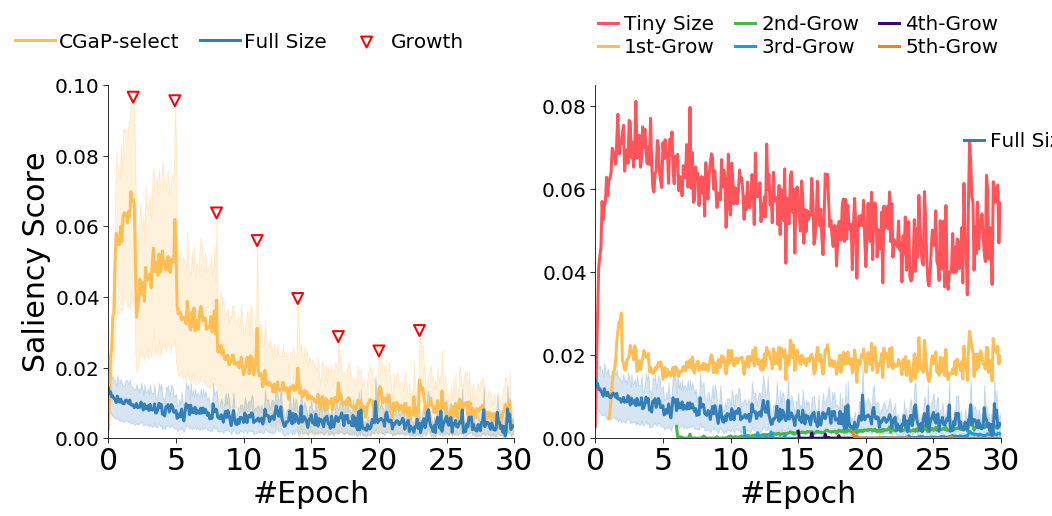

In [804]:
path =  
save_path = os.path.join(path, '{}.svg'.format('bridigng_rank'))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6.5))
custom_lines = [Line2D([0], [0], color="#337FBA",  linestyle='-', lw=lw)]
fig.legend(custom_lines, ["Full Size"],loc="upper center",bbox_to_anchor=(0.884, 0.86
                                                                         ), prop={'size': 20,},ncol=3,fancybox=True, 
              framealpha=0.0,labelspacing=0.2,handletextpad = 0.3,handlelength=1.0,columnspacing =1.0)
plot_bridging(bri_data, bri_colors, bri_labels, length, ax[1])
plot_rank(rank_data, colors, labels,length,ax[0])
plt.show()
fig.tight_layout()
fig.savefig(save_path,format='svg', bbox_inches="tight")

In [172]:
# colors = ["#FF545A","#337FBA","#FFBE54",'#4CB44C',"#58D2C9","#420278"]
# labels = ["Rank","Standard","Bridging","Ours","Standard",'Ours_new']
# plot_save(new_data, path, colors, labels, title='rank_slow')

In [173]:
# colors = ["#FF545A","#337FBA","#FFBE54",'#4CB44C',"#58D2C9","#420278"]
# labels = ["Rank","Copy","Bridging","Ours","Standard"]
# path = os.path.join(path, '{}.pdf'.format('rank_loss'))
# plot_save(l2, path, colors, labels, title='rank_loss')

In [174]:
# path = os.path.join(path, '{}.pdf'.format('rank_loss'))
# plot_save(l3, path, colors, labels, title='rank_loss')

# Evaluation Adaptation

# Variance

In [823]:
# file = "/Users/zber/Documents/FGdroid/exp_result/A_1_variance/all_variance.json"
file = "/Users/zber/Documents/FGdroid/exp_result/A_1_variance/std_all_new.json"
path = os.path.dirname(file)
with open(file, 'r') as f:
    data = json.load(f)
    
# New size is:[4, 8, 16]
# New size is:[7, 13, 26]
# New size is:[12, 21, 42]
# New size is:[20, 34, 68]
# New size is:[20, 50, 109]
# New size is:[20, 50, 175]
# New size is:[20, 50, 280]
# New size is:[20, 50, 448]
# New size is:[20, 50, 500]
# New size is:[20, 50, 500]


In [824]:
epoch = 5
num_batch = 12

epoch = 5
num_batch = 20

s = epoch*num_batch +1
e = s+num_batch +1 

ours = data['1']['ours7'][s:e]
standard = data['1']['standard'][s:e]

L1 ={}
L1['rank'] = data['1']['rank1'][s:e]
L1['ours'] = ours
L1['standard'] = standard

L2 ={}
L2['copy'] = data['1']['copy1'][s:e]
L2['ours'] = ours
L2['standard'] = standard

L3 ={}
L3['bridging'] = data['1']['bridging1'][s:e]
L3['ours'] = ours
L3['standard'] = standard

In [825]:
for key in L2.keys():
    avg = np.mean(L2[key])
    last=L2[key][-1]
    print('{} -> avg: {:.4f} , last: {:.4f}'.format(key,avg,last))
    
for key in L1.keys():
    avg = np.mean(L1[key])
    last=L1[key][-1]
    print('{} -> avg: {:.4f} , last: {:.4f}'.format(key,avg,last))

for key in L3.keys():
    avg = np.mean(L3[key])
    last=L3[key][-1]
    print('{} -> avg: {:.4f} , last: {:.4f}'.format(key,avg,last))

copy -> avg: 0.0174 , last: 0.0205
ours -> avg: 0.0059 , last: 0.0060
standard -> avg: 0.0045 , last: 0.0048
rank -> avg: 0.0171 , last: 0.0167
ours -> avg: 0.0059 , last: 0.0060
standard -> avg: 0.0045 , last: 0.0048
bridging -> avg: 0.0303 , last: 0.0321
ours -> avg: 0.0059 , last: 0.0060
standard -> avg: 0.0045 , last: 0.0048


In [826]:
colors1 = ["#F4820B","#4CB44C","#337FBA"]
colors2 = ["#C775FF","#4CB44C","#337FBA"]
colors3 = ["#FF545A","#4CB44C","#337FBA"]
labels1 = ["CGaP-select","RIC-adaption","Full Size"]
labels3 = ["NeST-bridge","RIC-adaption","Full Size"]
labels2 = ["Net2WiderNet","RIC-adaption","Full Size"]

f_size = 40
t_size = 30
lw = 5

In [827]:
def plot_var(dic, colors, labels, length, ax):

    for key, color, label in zip(dic.keys(), colors, labels):
        y = np.asarray(dic[key])
        x = np.arange(0,len(y))
        ax.plot(x, y, color, label=label, linestyle='-', lw=lw)
    
    #  set x, y labels
    ax.set_xlabel("#Batch",fontsize=f_size)
    
    # set x,y ticks
    ax.set_xticks(np.arange(0,21,5)) 
    ax.set_xticklabels(np.arange(0,601,150))
    
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
    ax.xaxis.set_tick_params(labelsize=t_size,length=5)
    ax.yaxis.set_tick_params(labelsize=t_size,length=5)
    
    # set x,y lims
    ax.set_xlim(0, 20)
#     ax.set_ylim(0.00, 0.031)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    

    
    # legend
#     ax.legend(loc="upper center",bbox_to_anchor=(0.5, 1.25), prop={'size': 20,},ncol=3,fancybox=True, 
#               framealpha=0.0,labelspacing=0.2,handletextpad = 0.3,handlelength=1.0,columnspacing =1.0 )

    
    # set title
#     plt.show()
#     fig.savefig(path)
#     plt.close(fig)

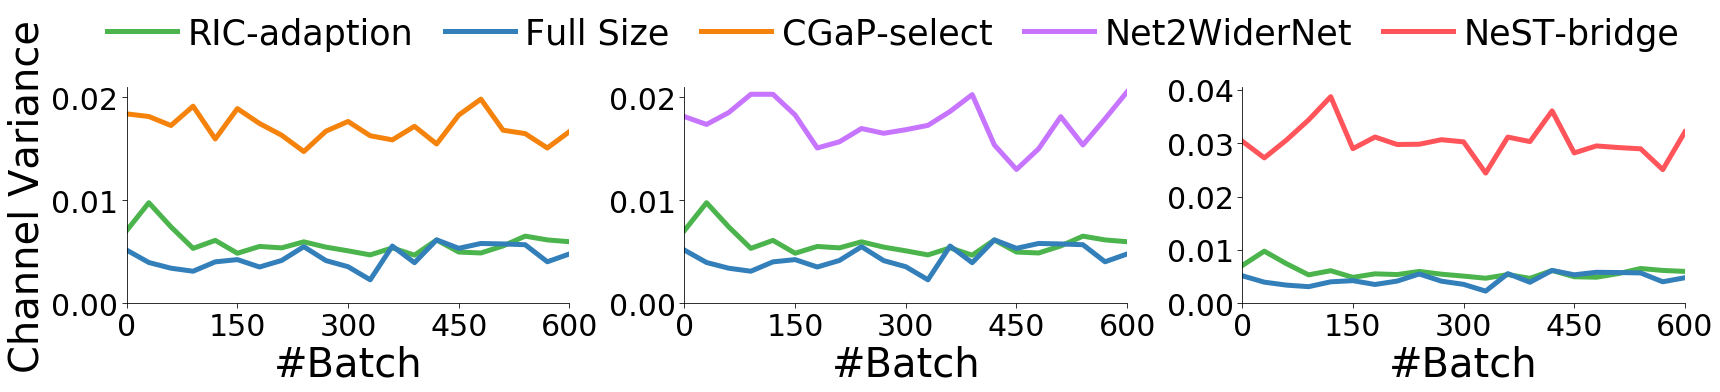

In [828]:
path = "/Users/zber/Documents/FGdroid/exp_result/A_1_variance/"
save_path = os.path.join(path, '{}.svg'.format('variance'))
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 5))
plot_var(L1, colors1, labels1,length,ax=ax[0])
plot_var(L2, colors2, labels2,length,ax=ax[1])
plot_var(L3, colors3, labels3,length,ax=ax[2])
ax[0].set_ylabel('Channel Variance',fontsize=f_size)


ax[0].set_yticks(np.arange(0.00,0.031,0.01)) 
ax[0].set_yticklabels(np.arange(0.00,0.031,0.01))
ax[0].set_ylim(0.00, 0.021)
ax[0].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))


ax[1].set_yticks(np.arange(0.00,0.031,0.01)) 
ax[1].set_yticklabels(np.arange(0.00,0.031,0.01))
ax[1].set_ylim(0.00, 0.021)
ax[1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))

ax[2].set_yticks(np.arange(0.00,0.041,0.01)) 
ax[2].set_yticklabels(np.arange(0.00,0.041,0.01))
ax[2].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))


lines = []
labels = []
for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    for a , b in zip(axLine, axLabel):
        if b not in labels:
            lines.append(a)
            labels.append(b)
# plt.legend(by_label.values(), by_label.keys())
new_labels = [labels[1],labels[2],labels[0],labels[3],labels[4]]
new_lines = [lines[1],lines[2],lines[0],lines[3],lines[4]]
fig.legend(new_lines, new_labels, loc='upper center',bbox_to_anchor=(0.517, 1.13),
    prop={'size': 35,},ncol=6,fancybox=True, framealpha=0.0,labelspacing=0.2,handletextpad = 0.3,columnspacing =0.9)
plt.subplots_adjust(wspace=0.2)
fig.tight_layout()
plt.show()
fig.savefig(save_path,format='svg', bbox_inches="tight")

# Adaptation accuracy in time

In [35]:
file = "/Users/zber/Documents/FGdroid/exp_result/adaptation/adap.json"
path = os.path.dirname(file)
with open(file, 'r') as f:
    data = json.load(f)

In [36]:
def plot_save(dic, path, colors, labels,title='Grad'):
    
    # pdf file name
    path = os.path.join(path, '{}.pdf'.format(title))

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

    for key, color, label in zip(dic.keys(), colors, labels):
        x = np.arange(len(dic[key]))
        ax.plot(x, dic[key], color, label=label, linestyle='-', lw='2')
    
    #  set x, y labels
    ax.set_ylabel('Accuracy %',fontsize=30)
    ax.set_xlabel("# Epochs",fontsize=30)
    
    # set x,y ticks
    ax.yaxis.set_tick_params(labelsize=30,length=5)
    ax.xaxis.set_tick_params(labelsize=30,length=5)
    
    # set x,y lims
#     ax.set_xlim(1,9)
    ax.set_ylim(90,100)
    
    
    # legend
    ax.legend(loc="best", prop={'size': 20,},ncol=1,fancybox=True, framealpha=0.0,labelspacing=0.2,handletextpad = 0.3)
    
    # set title
    plt.show()
    fig.savefig(path)
    plt.close(fig)

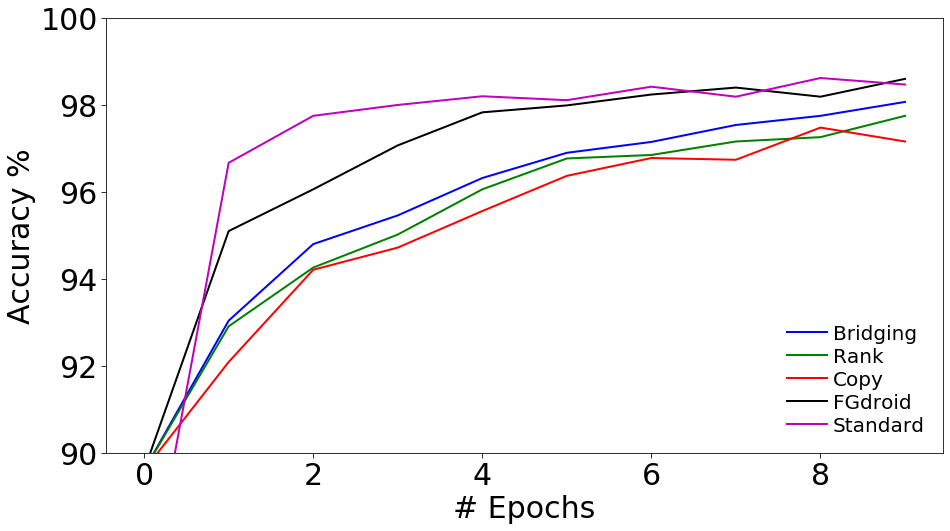

In [37]:
colors = ['b','g','r','black','m']
labels = ["Bridging","Rank","Copy","FGdroid","Standard"]
plot_save(data, path, colors, labels, title='adaptation')

# Growth controller  ***

In [79]:
file= "/Users/zber/Documents/FGdroid/exp_result/G_1_acc_to_time/acc_time_har.json"
path = os.path.dirname(file)
with open(file, 'r') as f:
    har_data = json.load(f)

file= "/Users/zber/Documents/FGdroid/exp_result/G_1_acc_to_time/acc_time_minist_all.json"
path = os.path.dirname(file)
with open(file, 'r') as f:
    minist_data = json.load(f)
    
f_size = 30
t_size = 25
lw = 3
# colors = ["#FF545A","#C775FF" ,"#F4820B","#337FBA","#4CB44C"] #  "#FF545A"
# labels = ["NeST","Net2net","CGaP","Full Size","FGdriod"]



# rank. bridging ours , full size, search
# colors = ["#4CB44C","#337FBA" ,"#F4820B","#C775FF","#FF545A"] #  "#FF545A"
# labels = ["RIC-adaption","Full Size","CGaP","Net2net","NeST"]


colors = ["#F4820B", "#FF545A", "#337FBA" ,"#4CB44C","#C775FF"] #  "#FF545A"
labels = ["CGaP","NeST", "Full Size", "MDLdroidLite","S-search"]

In [80]:
print('HAR')
for key in har_data.keys():
    l= len(har_data[key][1])
    time = har_data[key][0][l-1]
    acc=har_data[key][1][-1]
    print('{} -> time: {:.2f}s , acc: {:.4f}'.format(key,time,acc))
    print(l)

print('')

print('MNIST')
for key in minist_data.keys():
    l = len(minist_data[key][1])
    acc=minist_data[key][1][-1]
    time = minist_data[key][0][l-1]
    print('{} -> time: {:.2f}mins , acc: {:.4f}'.format(key,time,acc))
    print(l)

HAR
rank -> time: 186.68s , acc: 95.1815
29
bridging -> time: 154.11s , acc: 95.1589
25
ours -> time: 60.33s , acc: 95.0846
19
standard -> time: 755.61s , acc: 94.6047
30
search -> time: 203.10s , acc: 95.1306
10

MNIST
bridging -> time: 106.11mins , acc: 99.0217
36
ours -> time: 33.43mins , acc: 99.0550
17
search -> time: 153.56mins , acc: 99.0567
23
rank -> time: 103.84mins , acc: 99.0433
30
standard -> time: 49.21mins , acc: 99.0300
10


In [81]:
def plot_har(dic, colors, labels, ax):
    
    keys = ['rank','bridging','standard','ours','search']
    for key, color, label in zip(keys, colors, labels):        
        y = dic[key][1]
        length = len(y)
        x = dic[key][0][:length]
        ax.plot(x, y, color, label=label, linestyle='-', lw=lw)
        
        error = np.asarray(dic[key][2][:length])
        ax.fill_between(x, y-error, y+error, alpha=0.2, edgecolor=color, facecolor=color)
    
    #  set x, y labels
    
    ax.set_xlabel("Time(mins)",fontsize=f_size)
        
    # set x,y ticks
    ax.yaxis.set_tick_params(labelsize=t_size,length=5)
    ax.xaxis.set_tick_params(labelsize=f_size,length=5)

    ax.set_ylim(70,100)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # legend
#     ax.legend(loc="best", prop={'size': 20,},ncol=1,fancybox=True, framealpha=0.0,labelspacing=0.2,handletextpad = 0.3)
    
    # set title
#     plt.show()
#     fig.savefig(path)
#     plt.close(fig)

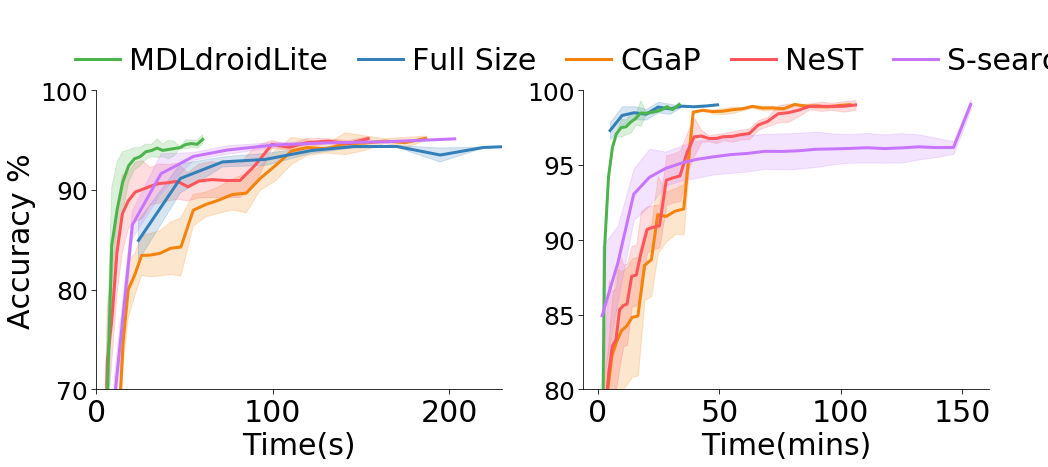

In [84]:
path = "/Users/zber/Documents/FGdroid/exp_result/G_1_acc_to_time/"
save_path = os.path.join(path, '{}.svg'.format('grow_acc_new'))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5.5))
# custom_lines = [Line2D([0], [0], color="#337FBA",  linestyle='-', lw=lw)]
plot_har(har_data, colors, labels, ax[0])
plot_har(minist_data, colors, labels, ax[1])
ax[0].set_xlim(0,230)
ax[0].set_xlabel("Time(s)",fontsize=f_size)
ax[0].set_ylabel('Accuracy %',fontsize=f_size)
ax[1].set_ylim(80,100)
new_lines, new_labels = ax[0].get_legend_handles_labels()

sorted_labels = []
sorted_lines = []

for la in ["MDLdroidLite","Full Size","CGaP","NeST",  "S-search"]:
    i = new_labels.index(la)
    sorted_lines.append(new_lines[i])
    sorted_labels.append(la)
    
    

fig.legend(sorted_lines, sorted_labels, loc='upper center',bbox_to_anchor=(0.50, 1.13),prop={'size': 30,},
           ncol=6,fancybox=True, framealpha=0.0,labelspacing=0.15,handletextpad = 0.3,columnspacing =1.0,handlelength=1.5)
plt.subplots_adjust(wspace=0.2)
plt.show()
fig.tight_layout()
fig.savefig(save_path,format='svg', bbox_inches="tight")

# Resource mem+battery

In [62]:
for i in [103,106,34.4 ,49.21,153.55]:
    print(112 / 5.03 * i)

2293.4393638170973
2360.238568588469
765.9642147117296
1095.7296222664015
3419.005964214712


In [63]:
# memory
har = []
mnist = []

# battery
#mnist
# bri = 106 mins
# ous = 34.4 mins
# search =153.55 mins
# rank = 103 mins
# standard = 49.21mins

# har
# rank = 186.6s
# bridigng = 211.2s
# ours = 63.5s
# standard 256s
# search 203.1s


#inital memory: 137.0MB

# Har + lenet: 64
# Memory + battery:
#  rank: [20,50,500]    
#  bridging: [20,50,500]    
#  full size: [20,50,500]   
#  ours: [5, 16, 26]      battery: 5.21 mAh, time: 15829, memory: 148.0MB
#  search: [18, 45, 140]  battery:  7.08   , time:   27700, memory: 168.0MB


# MNIST
#  rank: [20,50,500]
#  bridging: [20,50,500]
#  full size: [20,50,500]
#  ours: [13, 33, 50]    battery:   78.1     time: 203148  memory: 197MB
#  search: [20, 45, 269]   battery:  111   time:  285912  memory: 242MB


# Har + lenet: 64
# full size: [20,50,500] battery:  10.4   time:  29516    memory:  175MB  

# MNIST
#  full size: [20,50,500]   battery:  112      time:  302666   memory:    256MB

m_rank = [175, 256]
m_bri = [175, 256]
m_ours = [148.0,197]
m_standard = [175, 256]
m_search = [168,242]
init = [137.0]

rank = [71.06, 2293.43]
bri = [80.43, 2360.23]
ours = [ 24.18 ,765.96]
standard= [ 97.49 ,1095.72]
search = [ 77.34,3419.00]

ind = np.arange(len(rank))  # the x locations for the groups
width = 0.4  # the width of the bars

f_size = 30
t_size = 25
lw = 3

m_rank=[2293.43,256]
m_bri = [2360.23,26]
m_ours = [765.96, 197]
m_standard = [1095.72,256 ]
m_search = [3419.00,242]

In [64]:
def plot_har(ax):
    # mbnet lenet
#     colors = ["#F4820B", "#FF545A", "#337FBA" ,"#4CB44C","#C775FF"] #  "#FF545A"
    
#     colors = ["#FF545A", "#FFBE54", "#BFA7FC", "#58D2C9","#60B6FC"]
    colors = ["#FF545A", "#FFBE54", "#BFA7FC", "#58D2C9","#60B6FC","#FFF8DC"]
    
    #紫：#BFA7FC
    #蓝：#60B6FC
    #绿：#58D2C9
    #红：#FF545A
    #黄：#FFBE54
    
    labels = ["CGaP", "NeST", "Full Size", "MDLdroidLite","S-search","INIT"]
    
    h_rank=[71.06,177]
    h_bri = [80.43,185]
    h_ours = [24.18, 148.0]
    h_standard = [97.49,175]
    h_search = [ 77.34,168]
    init = [137.0]
    

    ind1 = np.arange(0.15,0.751,0.15) 
    ind2 = np.arange(1.15,1.901,0.15) 

    width = 0.15  # the width of the bars

    ax2 = ax.twinx()
    ax.bar(ind1[0], h_ours[0], width, edgecolor = 'black',color=colors[3],
                    label=labels[3])
    ax.bar(ind1[1], h_rank[0], width,edgecolor = 'black',color=colors[0],
                    label=labels[0])
    ax.bar(ind1[2], h_search[0], width,edgecolor = 'black',color=colors[4],
                    label=labels[4])
    ax.bar(ind1[3], h_bri[0], width,edgecolor = 'black',color=colors[1],
                    label=labels[1])
    ax.bar(ind1[4], h_standard[0], width,edgecolor = 'black',color=colors[2],
                    label=labels[2])
    # memory
    ax2.bar(ind2[0],h_ours[1], width,edgecolor = 'black',color = colors[3],
                    label=labels[3])
    ax2.bar(ind2[1],h_rank[1], width,edgecolor = 'black',color = colors[0],
                    label=labels[0])
    ax2.bar(ind2[2],h_search[1], width,edgecolor = 'black',color = colors[4],
                    label=labels[4])
    ax2.bar(ind2[3],h_bri[1], width,edgecolor = 'black',color = colors[1],
                    label=labels[1])
    ax2.bar(ind2[4],h_standard[1], width,edgecolor = 'black',color = colors[2],
                    label=labels[2])
    # init
    init_color = "khaki"
    a = 1
    ax2.bar(ind2[0],init[0], width,edgecolor = 'black',color = colors[5],hatch="/", alpha= a,
                    label=labels[5])
    ax2.bar(ind2[1],init[0], width,edgecolor = 'black',color = colors[5],hatch="/", alpha= a)
    ax2.bar(ind2[2],init[0], width,edgecolor = 'black',color = colors[5],hatch="/", alpha= a)
    ax2.bar(ind2[3],init[0], width,edgecolor = 'black',color = colors[5],hatch="/", alpha= a)
    ax2.bar(ind2[4],init[0], width,edgecolor = 'black',color = colors[5],hatch="/", alpha= a)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel("Battery(mAh)",fontsize=30)
    # ax2.set_ylabel("Latency(s)",fontsize=30,rotation=270,labelpad = 30)
    ax2.set_ylabel("Memory(MB)",fontsize=30)
    
#     ax.set_xlabel("Har",fontsize=30)
    ax.yaxis.set_tick_params(labelsize=20,length=5)
    ax2.yaxis.set_tick_params(labelsize=20,length=10)
    ax.set_xticks([ind1[2],ind2[2]])
    ax.set_xticklabels(('Battery','Memory'),fontsize=30)
    ax2.set_ylim(0,300)
    new_lines, new_labels = ax2.get_legend_handles_labels()

#     ax.legend(loc="upper left", prop={'size': 25,},ncol=6,bbox_to_anchor=(0.12, 1.2),fancybox=True, framealpha=0.0,labelspacing=0.1,handletextpad = 0.3,columnspacing=0.5,handlelength = 1.1)
#     ax2.legend(loc="upper left", prop={'size': 30,},ncol=6,bbox_to_anchor=(-0.25, 1.23),
#                fancybox=True, framealpha=0.0,labelspacing=0.1,handletextpad = 0.3,columnspacing=0.6,handlelength = 1.5)
    # ax.legend(loc="upper center", prop={'size"': 20,},ncol=3,bbox_to_anchor=(0.5, 1.2),fancybox=True, framealpha=0.0,labelspacing=0.1 ,handletextpad = 0.2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    return new_lines, new_labels

In [65]:
def plot_mnist(ax):
    # mbnet lenet
#     colors = ["#FFBE54" ,"#58D2C9", "#BFA7FC", "#FF545A","#60B6FC"] #  "#FFBE54"
    colors = ["#FF545A", "#FFBE54", "#BFA7FC", "#58D2C9","#60B6FC","#FFF8DC"]
    labels = ["CGaP", "NeST", "Full Size", "MDLdroidLite","S-search","INIT"]
    
    m_rank=[2293.43,258]
    m_bri = [2360.23,266]
    m_ours = [765.96, 197]
    m_standard = [1095.72,256 ]
    m_search = [3419.00,242]
    init = [137.0]
    
    # ours, standard, rank, bri, search

    ind1 = np.arange(0.15,0.751,0.15) 
    
    ind2 = np.arange(1.15,1.901,0.15) 

    width = 0.15  # the width of the bars

    ax2 = ax.twinx()
    
    # battery
    ax.bar(ind1[0], m_ours[0], width, edgecolor = 'black',color=colors[3],
                    label=labels[3])
    ax.bar(ind1[2], m_rank[0], width,edgecolor = 'black',color=colors[0],
                label=labels[0])
    ax.bar(ind1[4], m_search[0], width,edgecolor = 'black',color=colors[4],
                label=labels[4])
    ax.bar(ind1[3], m_bri[0], width,edgecolor = 'black',color=colors[1],
                label=labels[1])
    ax.bar(ind1[1], m_standard[0], width,edgecolor = 'black',color=colors[2],
                label=labels[2])
    # memory
    ax2.bar(ind2[0],m_ours[1], width,edgecolor = 'black',color = colors[3],
                    label=labels[3])
    ax2.bar(ind2[2],m_rank[1], width,edgecolor = 'black',color = colors[0],
                    label=labels[0])
    ax2.bar(ind2[4],m_search[1], width,edgecolor = 'black',color = colors[4],
                    label=labels[4])
    ax2.bar(ind2[3],m_bri[1], width,edgecolor = 'black',color = colors[1],
                    label=labels[1])
    ax2.bar(ind2[1],m_standard[1], width,edgecolor = 'black',color = colors[2],
                    label=labels[2])
    
    # init
    ax2.bar(ind2[0],init[0], width,edgecolor = 'black',color = colors[5],hatch="/",
                    label=labels[5])
    ax2.bar(ind2[1],init[0], width,edgecolor = 'black',color = colors[5],hatch="/")
    ax2.bar(ind2[2],init[0], width,edgecolor = 'black',color = colors[5],hatch="/",)
    ax2.bar(ind2[3],init[0], width,edgecolor = 'black',color = colors[5],hatch="/",)
    ax2.bar(ind2[4],init[0], width,edgecolor = 'black',color = colors[5],hatch="/",)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel("Battery(mAh)",fontsize=30)
    ax2.set_ylabel("Memory(MB)",fontsize=30)
#     ax.set_xlabel("MNIST",fontsize=30)

    ax.yaxis.set_tick_params(labelsize=20,length=5)
    ax2.yaxis.set_tick_params(labelsize=20,length=10)
    ax.set_xticks([ind1[2],ind2[2]])
    ax.set_xticklabels(('Battery','Memory'),fontsize=30)
    ax2.set_ylim(0,300)
#     ax.set_ylim(0,200)
#     ax.set_xlim(0.4,2.0)

#     ax.legend(loc="upper left", prop={'size': 25,},ncol=6,bbox_to_anchor=(0.12, 1.2),fancybox=True, framealpha=0.0,labelspacing=0.1,handletextpad = 0.3,columnspacing=0.5,handlelength = 1.1)
#     ax2.legend(loc="upper left", prop={'size': 25,},ncol=2,bbox_to_anchor=(0.40, 1.2),fancybox=True, framealpha=0.0,labelspacing=0.1,handletextpad = 0.3,columnspacing=0.5,handlelength = 1.1)
    # ax.legend(loc="upper center", prop={'size"': 20,},ncol=3,bbox_to_anchor=(0.5, 1.2),fancybox=True, framealpha=0.0,labelspacing=0.1 ,handletextpad = 0.2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)

In [66]:
# h_rank=[71.06,177]
# h_bri = [80.43,185]
# h_ours = [24.18, 148.0]
# h_standard = [97.49,175]
# h_search = [ 77.34,168]
# init = [137.0]

# m_rank=[2293.43,258]
# m_bri = [2360.23,266]
# m_ours = [765.96, 197]
# m_standard = [1095.72,256 ]
# m_search = [3419.00,242]
# init = [137.0]

# HAR:
#     rank    battery 71.06  , memory 177
#     briding battery 80.43  , memory 185
#     ours    battery 24.18  , memory 148.0
#     Full    battery 97.49  , memory 175
#     search  battery 77.34  , memory 168

# MNIST:
#     rank    battery 2293  , memory 258
#     briding battery 2360  , memory 266
#     ours    battery 765.96  ,memory 197
#     Full    battery 1095  , memory 256
#     search  battery 3419  , memory 242
    

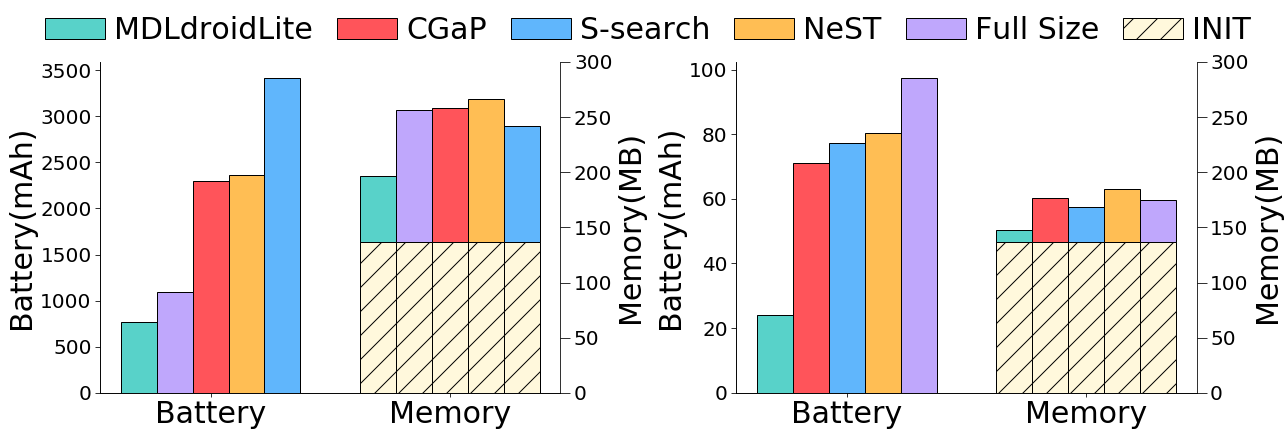

In [67]:
path = "/Users/zber/Documents/FGdroid/exp_result/G_2_resource"
save_path = os.path.join(path, '{}.svg'.format('resource_new'))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 5.5))
# custom_lines = [Line2D([0], [0], color="#337FBA",  linestyle='-', lw=lw)]

new_lines, new_labels = plot_har(ax[1])
plot_mnist(ax[0])

# new_lines, new_labels = ax[0].get_legend_handles_labels()
fig.legend(new_lines, new_labels, loc='upper center',bbox_to_anchor=(0.5, 1.13),prop={'size': f_size,},ncol=6,
           fancybox=True, framealpha=0.0,labelspacing=0.2,handletextpad = 0.3,columnspacing =0.8)

# plt.subplots_adjust(wspace=0.4)
fig.tight_layout()
# ax[3].set_position((16,0,8,5), which='both')



plt.show()
fig.savefig(save_path,format='svg', bbox_inches="tight")

# Resource _Flops

In [40]:
file= "/Users/zber/Documents/FGdroid/exp_result/G_2_resource/Har/har_flops.json"
with open(file, 'r') as f:
    har_flops = json.load(f)

file= "/Users/zber/Documents/FGdroid/exp_result/G_2_resource/mnist_flops.json"
with open(file, 'r') as f:
    minist_flops = json.load(f)
    
f_size = 30
t_size = 25
lw =4
# colors = ["#FF545A","#C775FF" ,"#F4820B","#337FBA","#4CB44C"] #  "#FF545A"
# labels = ["NeST","Net2net","CGaP","Full Size","FGdriod"]



# rank. bridging ours , full size, search
# colors = ["#4CB44C","#337FBA" ,"#F4820B","#C775FF","#FF545A"] #  "#FF545A"
# labels = ["RIC-adaption","Full Size","CGaP","Net2net","NeST"]


# colors = ["#F4820B", "#FF545A", "#337FBA" ,"#4CB44C","#C775FF"] #  "#FF545A"

# labels = ["CGaP","NeST", "Full Size", "RIC-adaption","S-search"]

In [41]:
print('MNIST')
for key in minist_flops.keys():
    time = minist_flops[key][0][-1]
    f=minist_flops[key][1][-1]
    print('{} -> time: {:.2f}mins , flops(m): {:.4f}'.format(key,time,f))

print('HAR')
for key in har_flops.keys():
    time = har_flops[key][0][-1]
    f=har_flops[key][1][-1]
    print('{} -> time: {:.2f}s , flops(m): {:.4f}'.format(key,time,f))

MNIST
ours -> time: 33.43mins , flops(m): 17.5254
standard -> time: 49.21mins , flops(m): 46.4538
rank -> time: 103.84mins , flops(m): 46.4538
bridging -> time: 106.11mins , flops(m): 46.4538
search -> time: 153.56mins , flops(m): 39.0661
HAR
ours -> time: 60.33s , flops(m): 2.6722
standard -> time: 298.28s , flops(m): 29.3610
rank -> time: 186.68s , flops(m): 29.3610
bridging -> time: 154.11s , flops(m): 28.9184
search -> time: 203.10s , flops(m): 18.1478


In [42]:
colors = ["#F4820B", "#FF545A", "#337FBA" ,"#4CB44C","#C775FF"]
labels = ["CGaP", "NeST", "Full Size", "MDLdroidLite","S-search"]

def plot_flop(dic, colors, labels, ax):

    for key, color, label in zip(['rank','bridging','standard','ours','search'], colors, labels):
        y = np.asarray(dic[key][1]) /10
        x = np.asarray(dic[key][0])
        markers_x = x[-1]
        markers_y = y[-1]
        ax.plot(x, y, color, label=label, linestyle='-', lw=lw, zorder=2)
        ax.scatter(markers_x,markers_y, c= color, s = 200,marker='o', edgecolors=color,linewidths= lw, zorder=5) 

        #,facecolors='none'
    
    #  set x, y labels
    
    # set x,y ticks
#     ax.set_xticks(np.arange(0,361,60)) 
#     ax.set_xticklabels(np.arange(0,31,5))
#     ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
    ax.xaxis.set_tick_params(labelsize=f_size,length=5)
    ax.yaxis.set_tick_params(labelsize=t_size,length=5)
    
    # set x,y lims
#     ax.set_xlim(0, 360)
#     ax.set_ylim(0, 0.085)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    

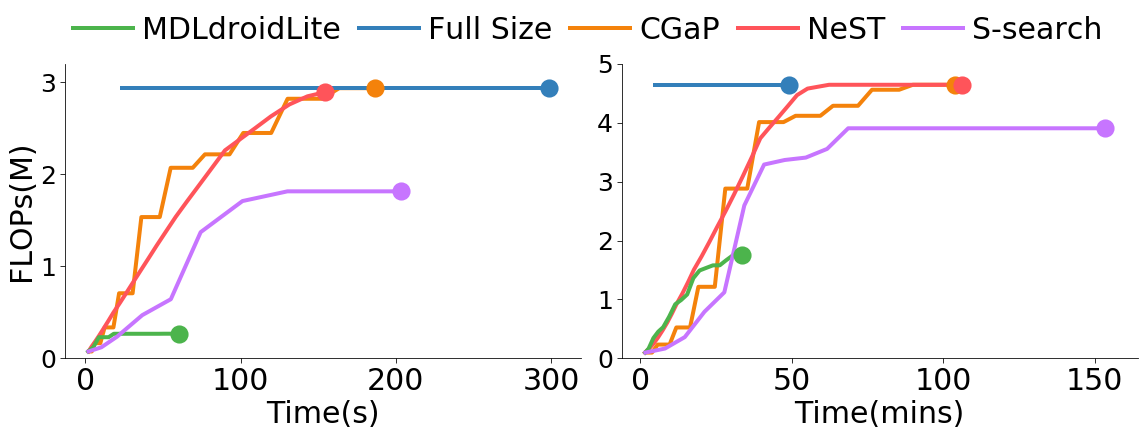

In [46]:
path = "/Users/zber/Documents/FGdroid/exp_result/G_2_resource"
save_path = os.path.join(path, '{}.svg'.format('flops_new'))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5.5))
plot_flop(har_flops, colors, labels, ax[0])
plot_flop(minist_flops, colors, labels, ax[1])
ax[0].set_xlabel("Time(s)",fontsize=f_size)
ax[1].set_xlabel("Time(mins)",fontsize=f_size)
ax[0].set_ylabel("FLOPs(M)",fontsize=f_size)
ax[0].set_ylim(0, 3.2)
ax[1].set_ylim(0, 5)

lines, labels = ax[0].get_legend_handles_labels()

sorted_lines = []
sorted_labels = []
for la in ["MDLdroidLite","Full Size","CGaP","NeST",  "S-search"]:
    i = labels.index(la)
    sorted_lines.append(lines[i])
    sorted_labels.append(la)
fig.legend(sorted_lines, sorted_labels, loc='upper center',bbox_to_anchor=(0.51, 1.13),prop={'size': f_size,},ncol=6,
           fancybox=True, framealpha=0.0,labelspacing=0.2,handletextpad = 0.3,columnspacing =0.6)
fig.tight_layout()
plt.show()
fig.savefig(save_path,format='svg', bbox_inches="tight")

# Horizon

In [379]:
# time to acc
file= "/Users/zber/Documents/FGdroid/exp_result/G_4_Horizon/lenet_flops_acc.json"
with open(file, 'r') as f:
    lenet_data = json.load(f)

file= "/Users/zber/Documents/FGdroid/exp_result/G_4_Horizon/mb_flops_acc.json"
with open(file, 'r') as f:
    mbnet_data = json.load(f)


f_size = 30
t_size = 20
lw = 4

In [380]:
for key in lenet_data.keys():
    flops = lenet_data[key][0][-1]
    acc=lenet_data[key][1][-1]
    print('{} -> flops: {:.4f} , acc: {:.4f}'.format(key,flops,acc))

print("")
for key in mbnet_data.keys():
    flops = mbnet_data[key][0][-1]
    acc=mbnet_data[key][1][-1]
    print('{} -> flops: {:.4f} , acc: {:.4f}'.format(key,flops,acc))
    

H1 -> flops: 22.6243 , acc: 98.8900
H2 -> flops: 26.7126 , acc: 98.8500
H3 -> flops: 31.6625 , acc: 99.1100
H4 -> flops: 18.3945 , acc: 99.1600
H5 -> flops: 30.4069 , acc: 98.9200

H1 -> flops: 5.1109 , acc: 94.8422
H2 -> flops: 3.7312 , acc: 95.9620
H3 -> flops: 2.6376 , acc: 95.1137
H4 -> flops: 3.2012 , acc: 92.5008
H5 -> flops: 4.1884 , acc: 94.8422


In [381]:
def plot_h(dic, colors, labels, ax):
    
    for key, color, label in zip(dic.keys(), colors, labels):        
        y = np.asarray(dic[key][1])
        
        length = len(y)
        x = np.asarray(dic[key][0][:length])/10
        ax.plot(x, y, color, label=label, linestyle='-', lw=lw,zorder=1)
        
    
    for key, color, label in zip(dic.keys(), colors, labels):        
        y = np.asarray(dic[key][1])
        length = len(y)
        x = np.asarray(dic[key][0][:length])/10
#         ax.plot(x, y, color, label=label, linestyle='-', lw=lw)
        
        markers_x = x[-1]
        markers_y = y[-1]
        
        ax.scatter(markers_x,markers_y, c= color, s = 200,marker='o', edgecolors=color,linewidths= lw,zorder=2)
#         markers_x = x[-1]
#         markers_y = y[-1]
        
#         ax.scatter(markers_x,markers_y, c= color, s = 200,marker='o', edgecolors=color,linewidths= lw)
#         error = np.asarray(dic[key][2][:length])
#         ax.fill_between(x, y-error, y+error, alpha=0.2, edgecolor=color, facecolor=color)
    
    #  set x, y labels
    ax.set_xlabel("FLOPs(M)",fontsize=f_size)
        
    # set x,y ticks
    ax.yaxis.set_tick_params(labelsize=t_size,length=5)
    ax.xaxis.set_tick_params(labelsize=f_size,length=5)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#     ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))
    
    # legend
#     ax.legend(loc="best", prop={'size': 20,},ncol=1,fancybox=True, framealpha=0.0,labelspacing=0.2,handletextpad = 0.3)
    
    # set title
#     plt.show()
#     fig.savefig(path)
#     plt.close(fig)

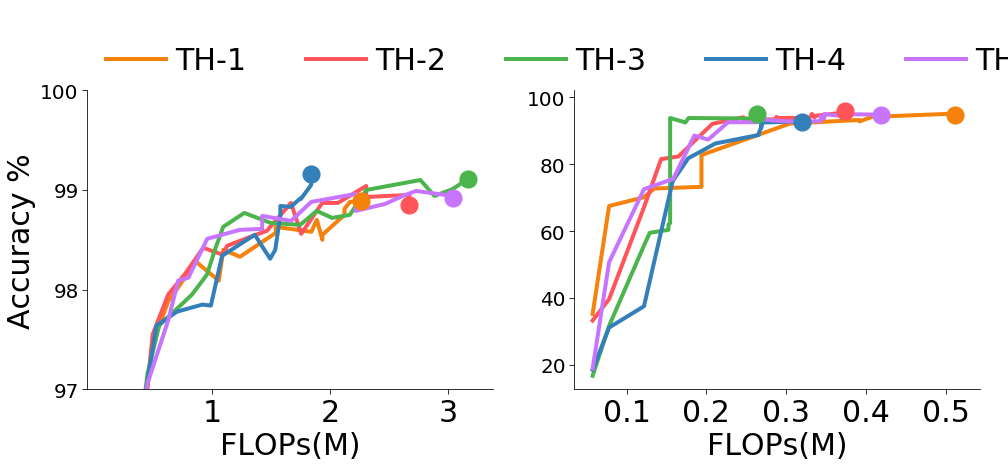

In [383]:
colors = ["#F4820B", "#FF545A", "#4CB44C","#337FBA" ,"#C775FF"]
labels = ["TH-1","TH-2", "TH-3","TH-4","TH-5"]
path = "/Users/zber/Documents/FGdroid/exp_result/G_4_Horizon"
save_path = os.path.join(path, '{}.svg'.format('flops'))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5.5))
plot_h(lenet_data, colors, labels, ax[0])
plot_h(mbnet_data, colors, labels, ax[1])
ax[0].set_ylim(97,100)
ax[0].set_ylabel('Accuracy %',fontsize=f_size)
ax[1].set_xticks([0.1,0.2,0.3,0.4,0.5])
ax[0].set_xticks([1,2,3])
ax[0].set_yticks([97,98,99,100])
# custom_lines = [Line2D([0], [0], color="#337FBA",  linestyle='-', lw=lw)]

new_lines, new_labels = ax[0].get_legend_handles_labels()
fig.legend(new_lines, new_labels, loc='upper center',bbox_to_anchor=(0.5, 1.13),prop={'size': f_size,},ncol=6,fancybox=True, 
           framealpha=0.0,labelspacing=0.2,handletextpad = 0.3)
plt.show()
fig.tight_layout()
fig.savefig(save_path,format='svg', bbox_inches="tight")

In [311]:
f_lenet = "/Users/zber/Documents/FGdroid/exp_result/G_4_Horizon/LeNet_Horizon/lenet_control_time.json"
with open(f_lenet, 'r') as f:
    lenet_ts = json.load(f)

f_mbnet = "/Users/zber/Documents/FGdroid/exp_result/G_4_Horizon/MobileNet_Horizon/mobileNet_contorl_time.json"
with open(f_mbnet, 'r') as f:
    mbnet_ts = json.load(f)

In [312]:
b_f = 10.4/ 27.308
lenet_time = []
lenet_time_std =[]
lenet_battery = []
lenet_battery_std = []

i = 1.1
for key in lenet_ts.keys():
    lenet_time.append(lenet_ts[key][0]*2)
    lenet_time_std.append(lenet_ts[key][1]*2)
    lenet_battery.append(lenet_ts[key][0]*b_f*i*2)
    lenet_battery_std.append(lenet_ts[key][1]*b_f*2)
    i += 0.2`

In [313]:
lenet_battery_std  =[0.005224925620601162,
 0.00450125331746769,
 0.016146881726641433,
 0.10873935556198137,
 0.16370342324500813]
lenet_battery_std  = np.asarray(lenet_battery_std) *2

In [357]:
# lenet_time
lenet_battery

[0.06803766984033452,
 0.12665644198217646,
 0.23360953290998224,
 1.1543450522923748,
 3.155524794733713]

In [278]:
# control time
def plot_ct_lenet(ax):
    ind = np.arange(len(lenet_time))  # the x locations for the groups
    width = 0.4  # the width of the bars
    ax2 = ax.twinx()
    rects1 = ax.bar(ind - width/2, lenet_time, width,edgecolor = 'black',color='#58D2C9',
                    label='Time', yerr=lenet_time_std,error_kw=dict(elinewidth=3,markeredgewidth=3,capsize=7))
    rects2 = ax2.bar(ind + width/2, lenet_battery, width, yerr=lenet_battery_std,edgecolor = 'black',
                    label='Battery',capsize=5,color = '#FF545A',error_kw=dict(elinewidth=3,markeredgewidth=3,capsize=7))

    
    new_lines, new_labels = ax2.get_legend_handles_labels()
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel("Control Time(s)",fontsize=30)
    ax2.set_ylabel("Battery(mAh)",fontsize=30)
    # ax.set_xlabel("# Devices",fontsize=30)
    #ax.set_title('epoches by nodes',fontsize=18,fontweight="bold")
    #ax.set_yticklabels(fontsize=20)
    ax.yaxis.set_tick_params(labelsize=25,length=5)    
    ax2.yaxis.set_tick_params(labelsize=25,length=5)
    ax.set_xticks(ind)
    ax.set_xticklabels(('TH-1', 'TH-2','TH-3', 'TH-4','TH-5'),fontsize=28)
#     ax.legend(loc="upper center", prop={'size': f_size,}, ncol=2,bbox_to_anchor=(0.40, 1.4),fancybox=True, framealpha=0.0,labelspacing=0.1,handletextpad = 0.3,columnspacing=0.7,handlelength = 1.1)

#     ax.set_ylim(40,100)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
#     ax.set_xlabel("#12-Epoch",fontsize=f_size)

    fig.tight_layout()
    return new_lines, new_labels

In [279]:
mb_time = []
mb_time_std = []
mb_battery = []
mb_battery_std = []

i = 1.1
for key in mbnet_ts.keys():
    mb_time.append(mbnet_ts[key][0]*2)
    mb_time_std.append(mbnet_ts[key][1]*2)
    mb_battery.append(mbnet_ts[key][0]*b_f*i*2)
    mb_battery_std.append(mbnet_ts[key][1]*b_f*2)
    i += 0.18 ** i

In [280]:
mb_time

[0.14262198058823544,
 0.24108784858823618,
 0.6118677815294135,
 1.7829668941176569,
 5.90285655282353]

In [281]:
mb_battery_std =[0.006951937090602356,
 0.0072784951723983025,
 0.038368456536463605,
 0.10873935556198137,
 0.21870787061170476]
mb_battery_std  = np.asarray(mb_battery_std) *2

In [360]:
# mb_time
mb_battery

[0.0597478928493267,
 0.11492023407305248,
 0.31890546578691,
 0.994248754899031,
 3.474191735376121]

In [282]:
# control time
mnet = [2,4,6,8,10]
lenet = [1,2,3,4,5]
m_err = [0.1,0.1,0.1,0.1,0.1]
l_err = [0.1,0.1,0.1,0.1,0.1]
def plot_mb_lenet(ax):
    ind = np.arange(len(mb_time))  # the x locations for the groups
    width = 0.4  # the width of the bars
    
    ax2 = ax.twinx()
    rects1 = ax.bar(ind - width/2, mb_time, width,edgecolor = 'black',color='#58D2C9',
                    label='Time', yerr=mb_time_std,error_kw=dict(elinewidth=3,markeredgewidth=3,capsize=7))
    rects2 = ax2.bar(ind + width/2, mb_battery, width, yerr=mb_battery_std,edgecolor = 'black',
                    label='Battery',capsize=5,color = '#FF545A',error_kw=dict(elinewidth=3,markeredgewidth=3,capsize=7))



    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel("Control Time(s)",fontsize=30)
    ax2.set_ylabel("Battery(mAh)",fontsize=30)
    # ax.set_xlabel("# Devices",fontsize=30)
    #ax.set_title('epoches by nodes',fontsize=18,fontweight="bold")
    #ax.set_yticklabels(fontsize=20)
    ax.yaxis.set_tick_params(labelsize=25,length=5)
    ax2.yaxis.set_tick_params(labelsize=25,length=5)
    ax.set_xticks(ind)
    ax.set_xticklabels(('TH-1', 'TH-2','TH-3', 'TH-4','TH-5'),fontsize=28)
#     ax.legend(loc="upper center", prop={'size': f_size,}, ncol=2,bbox_to_anchor=(0.40, 1.4),fancybox=True, framealpha=0.0,labelspacing=0.1,handletextpad = 0.3,columnspacing=0.7,handlelength = 1.1)

#     ax.set_ylim(40,100)
    ax.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#     ax.set_xlabel("#12-Epoch",fontsize=f_size)

    fig.tight_layout()

#     labelsize=20
    plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=14)  

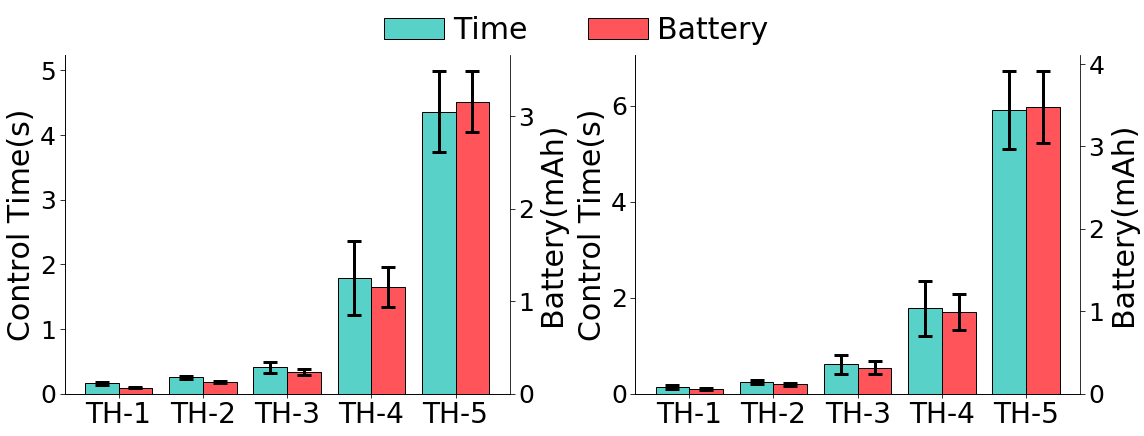

In [314]:
colors = ["#F4820B", "#FF545A", "#4CB44C","#337FBA" ,"#C775FF"]
labels = ["TH-1","TH-2", "TH-3","TH-4","TH-5"]
path = "/Users/zber/Documents/FGdroid/exp_result/G_4_Horizon"
save_path = os.path.join(path, '{}.svg'.format('control_time'))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5.5))

# custom_lines = [Line2D([0], [0], color="#337FBA",  linestyle='-', lw=lw)]
new_lines, new_labels = plot_ct_lenet(ax[0])
plot_mb_lenet(ax[1])

lines, labels = ax[0].get_legend_handles_labels()
lines = lines + new_lines
labels = labels + new_labels

fig.legend(lines, labels, loc='upper center',bbox_to_anchor=(0.5, 1.13),prop={'size': f_size,},ncol=6,fancybox=True, framealpha=0.0,labelspacing=0.2,handletextpad = 0.3)

plt.show()
fig.tight_layout()
fig.savefig(save_path,format='svg', bbox_inches="tight")

In [855]:
# Control Time
def plot_ct(ax):
    rects1 = ax.bar(ind - width/2, bar1_m, width,edgecolor = 'black',color='#58D2C9',
                    label='Before Growth', yerr=bar1_std,error_kw=dict(elinewidth=3,markeredgewidth=3,capsize=7))
    rects2 = ax.bar(ind + width/2, bar2_m, width, yerr=bar2_std,edgecolor = 'black',
                    label='After Growth',capsize=5,color = '#FF545A',error_kw=dict(elinewidth=3,markeredgewidth=3,capsize=7))

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel("Accuracy %",fontsize=30)
    # ax.set_xlabel("# Devices",fontsize=30)
    #ax.set_title('epoches by nodes',fontsize=18,fontweight="bold")
    #ax.set_yticklabels(fontsize=20)
    ax.yaxis.set_tick_params(labelsize=25,length=5)
    ax.set_xticks(ind)
    ax.set_xticklabels(('CGaP', 'Net2net', 'NeST','RIC'),fontsize=f_size)
    ax.legend(loc="upper center", prop={'size': f_size,}, ncol=2,bbox_to_anchor=(0.40, 1.4),fancybox=True, framealpha=0.0,labelspacing=0.1,handletextpad = 0.3,columnspacing=0.7,handlelength = 1.1)

    ax.set_ylim(40,100)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("#12-Epoch",fontsize=f_size)

    fig.tight_layout()

    labelsize=20
    plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=14)

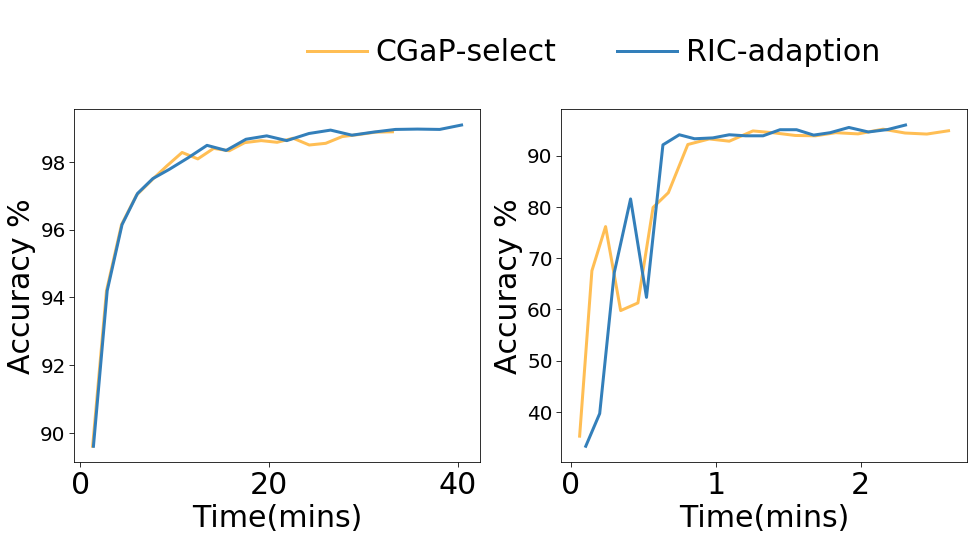

In [856]:
path = "/Users/zber/Documents/FGdroid/exp_result/G_4_Horizon"
save_path = os.path.join(path, '{}.pdf'.format('control_time'))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6.5))
# custom_lines = [Line2D([0], [0], color="#337FBA",  linestyle='-', lw=lw)]
plot_h(lenet_data, colors, labels, ax[0])
plot_h(mbnet_data, colors, labels, ax[1])
new_lines, new_labels = ax[0].get_legend_handles_labels()
fig.legend(new_lines, new_labels, loc='upper center',bbox_to_anchor=(0.515, 1.13),prop={'size': f_size,},ncol=6,fancybox=True, framealpha=0.0,labelspacing=0.2,handletextpad = 0.3)
plt.show()
fig.tight_layout()
fig.savefig(save_path,format='pdf', bbox_inches="tight")

# Strucutre

In [596]:
# Har + LeNet

# pruning = [6,17,25]
# searching = [15,39,140]
# full = [20,50,500]
# ours = [5,16,26]

har_dic = {}

har_dic['prun'] = [6,17,25]
har_dic['search'] = [15,39,140]
har_dic['full'] = [20,50,500]
har_dic['ours'] = [5,16,26]


In [597]:
# Mnist + Lenet

# pruning1 = [8,23,45]
# searching1 = [18,45,220]
# full1 = [20,50,500]
# ours1 = [13,33,50]

mnist_dic= {}

mnist_dic['prun'] = [8,23,45]
mnist_dic['search'] = [18,45,220]
mnist_dic['full'] = [20,50,500]
mnist_dic['ours'] = [13,33,50]


In [598]:
def plot_struct(dic, colors, labels, ax):

    for key, color, label in zip(dic.keys(), colors, labels):
        y = np.asarray(dic[key])
        x = np.arange(0,len(y))
        ax.plot(x, y, color, label=label, linestyle='-', lw=lw)
        
        for a, b in zip(x, y):
            ax.text(a, b, b, ha='center', va='bottom', fontsize=20)
    
    #  set x, y labels
    ax.set_ylabel("#Number of Units",fontsize=f_size)
    
    # set x,y ticks
#     ax.set_xticks(np.arange(0,361,60)) 
#     ax.set_xticklabels(np.arange(0,31,5))
    ax.xaxis.set_tick_params(labelsize=f_size,length=5)
    ax.yaxis.set_tick_params(labelsize=t_size,length=5)
                             
    ax.set_xticklabels(['','C2','C3','C3'])
    
    # set x,y lims
#     ax.set_xlim(0, 4)
#     ax.set_ylim(0, 0.085)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

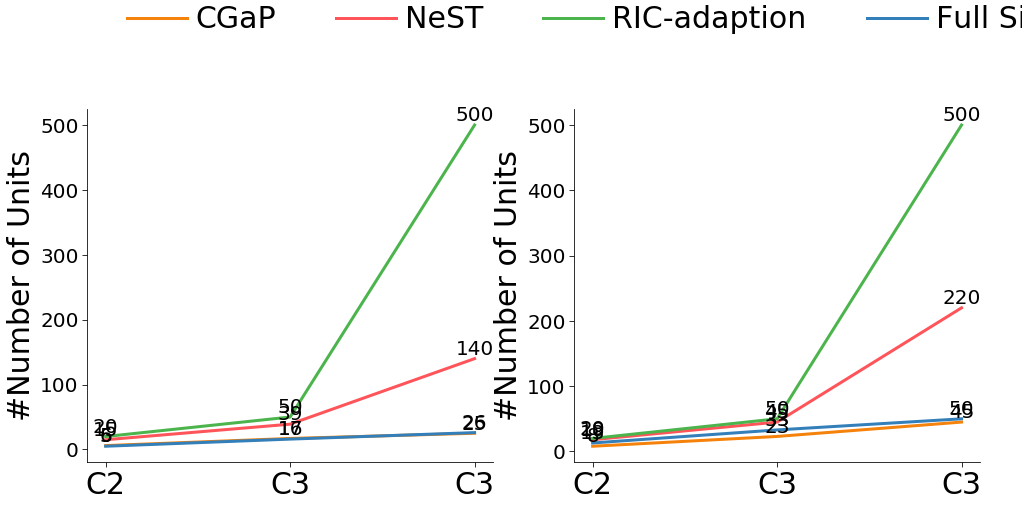

In [599]:
path = "/Users/zber/Documents/FGdroid/exp_result/G_3_structure"
save_path = os.path.join(path, '{}.pdf'.format('structure'))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6.5))

plot_struct(har_dic, colors, labels, ax[0])
plot_struct(mnist_dic, colors, labels, ax[1])

new_lines, new_labels = ax[0].get_legend_handles_labels()
fig.legend(new_lines, new_labels, loc='upper center',bbox_to_anchor=(0.515, 1.13),prop={'size': f_size,},ncol=6,fancybox=True, framealpha=0.0,labelspacing=0.2,handletextpad = 0.3)
plt.show()
fig.tight_layout()
fig.savefig(save_path,format='pdf', bbox_inches="tight")

In [38]:
# 1. ours grow to 8, 23, 50


# 2. rank_baseline  grow to OverP (Exponential)


# 3. bridging grow to OverP (Linear)


# 4. Standard OverP
file= "/Users/zber/Documents/FGdroid/exp_result/grow_controller/acc_time.json"
path = os.path.dirname(file)
with open(file, 'r') as f:
    data = json.load(f)

In [39]:
from scipy.interpolate import interp1d
def plot_save(dic, path, colors, labels,title='Grad'):
    
    # pdf file name
    path = os.path.join(path, '{}.pdf'.format(title))

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

    for key, color, label in zip(dic.keys(), colors, labels):
        x = dic[key][0]
        y = dic[key][1]
        ax.plot(x, y, color, label=label, linestyle='-', lw='2')
    
    #  set x, y labels
    ax.set_ylabel('Accuracy %',fontsize=30)
    ax.set_xlabel("Time(mins)",fontsize=30)
    
    # set x,y ticks
    ax.yaxis.set_tick_params(labelsize=30,length=5)
    ax.xaxis.set_tick_params(labelsize=30,length=5)
    
    # set x,y lims
#     ax.set_xlim(1,9)
    ax.set_ylim(95,100)
    
    # y line 
    ax.axhline(y=99.22, color='grey', linestyle='--')
    
    # legend
    ax.legend(loc="best", prop={'size': 20,},ncol=1,fancybox=True, framealpha=0.0,labelspacing=0.2,handletextpad = 0.3)
    
    # set title
    plt.show()
    fig.savefig(path)
    plt.close(fig)

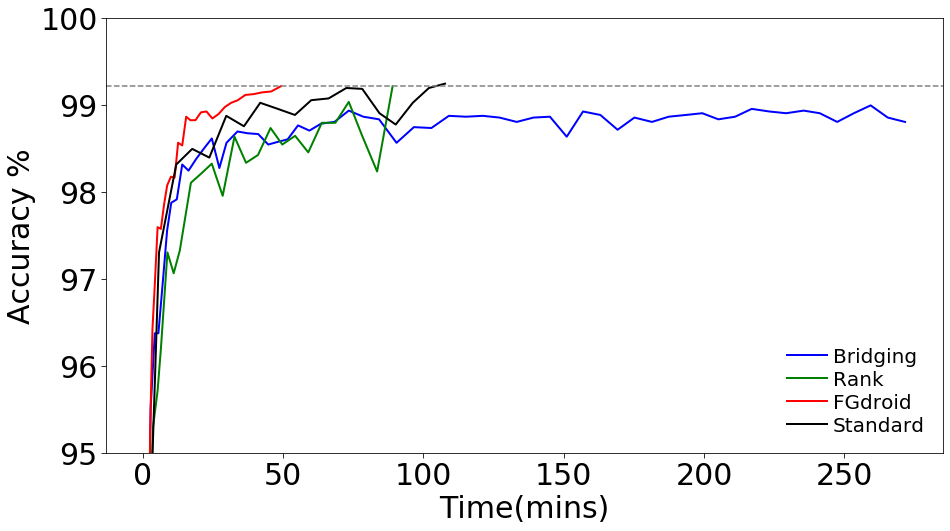

In [40]:
colors = ['b','g','r','black','m']
labels = ["Bridging","Rank","FGdroid","Standard"]
plot_save(data, path, colors, labels, title='grow_control')

# S-score comparison***

In [839]:
# s value in different channel
# 2. bridging - inactive
# 3. rank - standard

In [840]:
# bridging
# file = "/Users/zber/Documents/FGdroid/exp_result/A_2_S/all_variance.json"
file = "/Users/zber/Documents/FGdroid/exp_result/A_2_S/w_mean_std_all_new.json"
path = os.path.dirname(file)
with open(file, 'r') as f:
    data = json.load(f)

In [841]:
f_size = 30
t_size = 20
length = 30
lw = 3
# ours_mean = data['1']['ours5'][0][:24] + data['1']['ours6'][0][24:]
# ours_std = data['1']['ours5'][1][:24] + data['1']['ours6'][1][24:]
ours_mean = data['1']['ours7'][0]
ours_std = data['1']['ours7'][1]
standard = data['1']['standard']

In [842]:
L1 ={}
L1['rank'] = data['1']['rank1']
L1['ours'] = (ours_mean, ours_std)
L1['standard'] = standard

In [843]:
L2 ={}
L2['copy'] = data['1']['copy1']
L2['ours'] = (ours_mean, ours_std)
L2['standard'] = standard

In [844]:
L3 ={}
L3['bridging'] = data['1']['bridging1']
L3['ours'] = (ours_mean, ours_std)
L3['standard'] = standard

In [845]:
for key in L2.keys():
    avg = np.mean(L2[key][1])
    print('{} -> avg: {:.4f} '.format(key,avg))

    
for key in L1.keys():
    avg = np.mean(L1[key][1])
    print('{} -> avg: {:.4f} '.format(key,avg))

for key in L3.keys():
    avg = np.mean(L3[key][1])
    print('{} -> avg: {:.4f} '.format(key,avg))
    
bar1_m = [91.68,90.31,88.96,98.36]
bar2_m = [56.91, 67.68333333333334, 80.12, 98.08666666666666]
b1 = np.asarray(bar1_m)
b2 = np.asarray(bar2_m)

print(b1 - b2)

copy -> avg: 0.0184 
ours -> avg: 0.0086 
standard -> avg: 0.0038 
rank -> avg: 0.0121 
ours -> avg: 0.0086 
standard -> avg: 0.0038 
bridging -> avg: 0.0250 
ours -> avg: 0.0086 
standard -> avg: 0.0038 
[34.77       22.62666667  8.84        0.27333333]


In [846]:
def plot_S(dic, colors, labels, ax):

    for key, color, label in zip(dic.keys(), colors, labels):
        y = np.asarray(dic[key][0])
        x = np.arange(0,len(y))
        ax.plot(x, y, color, label=label, linestyle='-', lw=lw)
        error = np.asarray(dic[key][1])
        ax.fill_between(x, y-error, y+error, alpha=0.2, edgecolor=color, facecolor=color)
    
    #  set x, y labels
    ax.set_xlabel("#Epoch",fontsize=f_size)
    
    # set x,y ticks
    ax.set_xticks(np.arange(0,361,60)) 
    ax.set_xticklabels(np.arange(0,31,5))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
    ax.xaxis.set_tick_params(labelsize=f_size,length=5)
    ax.yaxis.set_tick_params(labelsize=t_size,length=5)
    
    # set x,y lims
    ax.set_xlim(0, 360)
#     ax.set_ylim(0, 0.085)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    

    
    # legend
#     ax.legend(loc="upper center",bbox_to_anchor=(0.5, 1.25), prop={'size': 20,},ncol=3,fancybox=True, 
#               framealpha=0.0,labelspacing=0.2,handletextpad = 0.3,handlelength=1.0,columnspacing =1.0 )

    
    # set title
#     plt.show()
#     fig.savefig(path)
#     plt.close(fig)

In [847]:
colors1 = ["#F4820B","#4CB44C","#337FBA"] #"#F4820B"
colors2 = ["#C775FF","#4CB44C","#337FBA"]
colors3 = ["#FF545A","#4CB44C","#337FBA"]
labels1 = ["CGaP-select","RIC-adaption","Full Size"]
labels3 = ["NeST-bridge","RIC-adaption","Full Size"]
labels2 = ["Net2WiderNet","RIC-adaption","Full Size"]

# NeST-bridge, CGaP-select, Net2WiderNet

In [848]:
# Har, EMG, MyHealth user specific
bar1_m = [91.68,90.31,88.96,98.36]
bar1_std = [4.5726530106225605, 5.544518814909814, 7.265787408579105, 1.31897712198382866]

bar2_m = [56.91, 67.68333333333334, 80.12, 98.08666666666666]
bar2_std = [3.7678995032599616, 1.345643175420421, 12.148094500784886, 1.35724252577516935]

ind = np.arange(len(good))*0.9  # the x locations for the groups
width = 0.23  # the width of the bars

def plot_bar(ax):
    rects1 = ax.bar(ind - width/2, bar1_m, width,edgecolor = 'black',color='#58D2C9',
                    label='Before Growth', yerr=bar1_std,error_kw=dict(elinewidth=3,markeredgewidth=3,capsize=7))
    rects2 = ax.bar(ind + width/2, bar2_m, width, yerr=bar2_std,edgecolor = 'black',
                    label='After Growth',capsize=5,color = '#FF545A',error_kw=dict(elinewidth=3,markeredgewidth=3,capsize=7))

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel("Accuracy %",fontsize=30)
    # ax.set_xlabel("# Devices",fontsize=30)
    #ax.set_title('epoches by nodes',fontsize=18,fontweight="bold")
    #ax.set_yticklabels(fontsize=20)
    ax.yaxis.set_tick_params(labelsize=25,length=5)
    ax.set_xticks(ind)
    ax.set_xticklabels(('CGaP', 'Net2net', 'NeST','RIC'),fontsize=f_size)
    ax.legend(loc="upper center", prop={'size': f_size,}, ncol=2,bbox_to_anchor=(0.40, 1.4),fancybox=True, framealpha=0.0,labelspacing=0.1,handletextpad = 0.3,columnspacing=0.7,handlelength = 1.1)

    ax.set_ylim(40,100)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("#12-Epoch",fontsize=f_size)

    fig.tight_layout()

    labelsize=20
    plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=14)  
# plt.show()
# fig.savefig('/Users/zber/Documents/FGdroid/exp_result/M_5/acc_drop.pdf', format='pdf', dpi=1000,bbox_inches = 'tight',
#     pad_inches = 0)

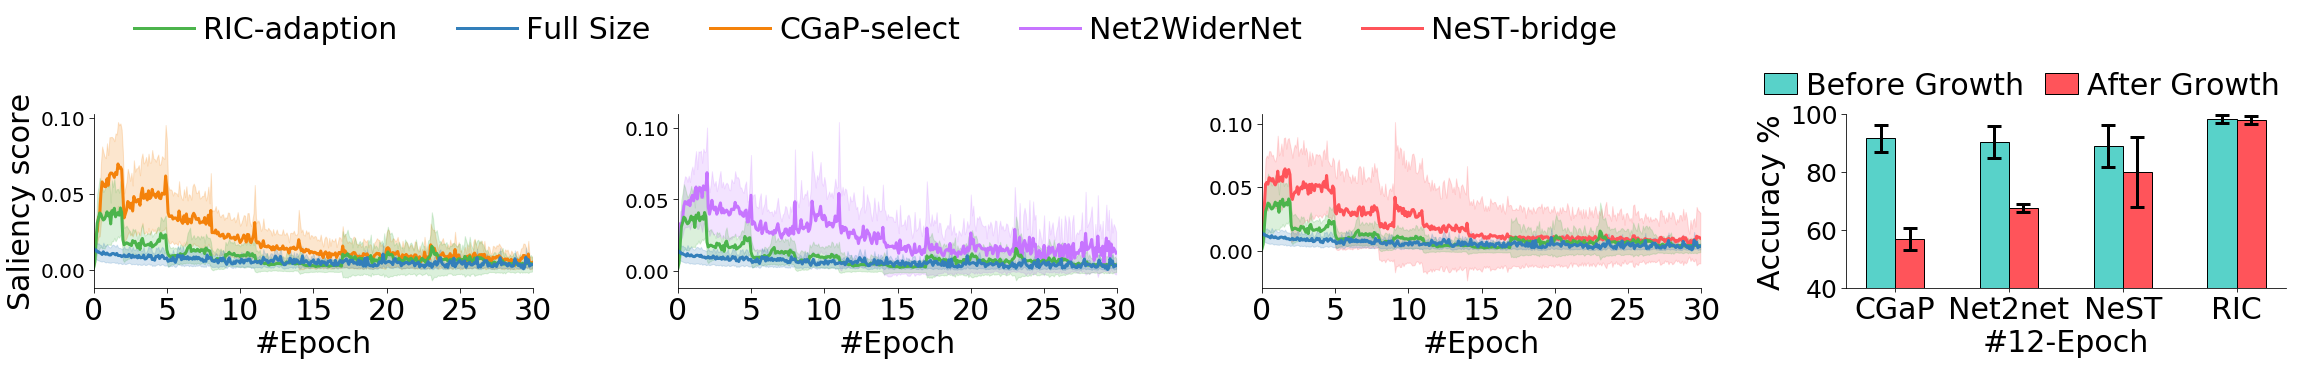

In [849]:
path = "/Users/zber/Documents/FGdroid/exp_result/A_2_S/"
save_path = os.path.join(path, '{}.svg'.format('s_score'))
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(32, 5))
plot_S(L1, colors1, labels1,ax=ax[0])
plot_S(L2, colors2, labels2,ax=ax[1])
plot_S(L3, colors3, labels3,ax=ax[2])
plot_bar(ax=ax[3])

ax[0].set_ylabel('Saliency score',fontsize=f_size)
# ax[0].yaxis.set_tick_params(np.arange(0, 0.04, 0.01),labelsize=25,)
# ax[1].yaxis.set_tick_params(np.arange(0, 0.06, 0.01),labelsize=25,)
# ax[2].yaxis.set_tick_params(np.arange(0, 0.11, 0.01),labelsize=25,)
# std_x = np.arange(0,360)
# std_y1 = data1['0']['standard'] 
# std_y2 = data1['1']['standard'] 
# std_y3 = data1['2']['standard']
# ax[0].plot(std_x, std_y1, 'b', label='Standard', linestyle='-', lw='2')
# ax[1].plot(std_x, std_y2, 'b', label='Standard', linestyle='-', lw='2')
# ax[2].plot(std_x, std_y3, 'b', label='Standard', linestyle='-', lw='2')

# ax[0].set_ylim(-0.003, 0.04)
# ax[1].set_ylim(-0.005, 0.06)
# ax[2].set_ylim(-0.005, 0.11)

lines = []
labels = []
for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    for a , b in zip(axLine, axLabel):
        if b not in labels:
            lines.append(a)
            labels.append(b)
# plt.legend(by_label.values(), by_label.keys())
new_labels = [labels[1],labels[2],labels[0],labels[3],labels[4]]
new_lines = [lines[1],lines[2],lines[0],lines[3],lines[4]]


fig.legend(new_lines, new_labels, loc='upper center', bbox_to_anchor=(0.38, 1.05),prop={'size': f_size,},ncol=6,fancybox=True, framealpha=0.0,labelspacing=0.2,handletextpad = 0.3)
plt.show()
fig.tight_layout()
fig.savefig(save_path,format='svg', bbox_inches="tight")

# Loss

In [498]:
colors = ['b','g','r','black','m']
labels = ["Seed","1st Grow","2nd Grow","3rd Grow","4th Grow"]
plot_save(data, path, colors, labels, title='bridging')

TypeError: plot_save() got an unexpected keyword argument 'title'

In [501]:
# 3. rank - standard
# bridging
# file = "/Users/zber/Documents/FGdroid/exp_result/S_score_comparison/rank.json"
# file = "/Users/zber/Documents/FGdroid/exp_result/S_score_comparison/rank_fc_layer.json"
file = "/Users/zber/Documents/FGdroid/exp_result/S_score_comparison/bridging_layer0.json"
path = os.path.dirname(file)
with open(file, 'r') as f:
    data = json.load(f)

In [502]:
def plot_save(dic, path, colors, labels, e_colors, f_colors, title='Grad'):
    grow_epochs = [1, 3, 6, 9]
    # pdf file name
    path = os.path.join(path, '{}.pdf'.format(title))
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))
    for key, colour, label, e, f in zip(dic.keys(), colors, labels,e_colors,f_colors):
        y = np.asarray(dic[key][0])
        x = np.arange(0,len(y))
        error = np.asarray(dic[key][1])
        ax.plot(x, y, colour, label=label, linestyle='-', lw='2')
        ax.fill_between(x, y-error, y+error,
        alpha=0.2, edgecolor=e, facecolor=f)
        
    for i in grow_epochs:
        point_x = i * (600 / 50)
        plt.axvline(x=point_x, color='grey', linestyle='--', lw='2', alpha=0.5)
    
       #  set x, y labels
    ax.set_ylabel('Saliency score',fontsize=30)
    ax.set_xlabel("# Epochs",fontsize=30)
    
    # set x,y ticks
    ax.yaxis.set_tick_params(labelsize=30,length=5)
    ax.xaxis.set_tick_params(labelsize=30,length=5)
    
    # set x,y lims
    plt.xticks(np.arange(0,121,12), np.arange(0,11))
#       rotation=20)
    
    # legend
    ax.legend(loc="upper right", prop={'size': 20,},ncol=1,fancybox=True, framealpha=0.0,labelspacing=0.2,handletextpad = 0.3)
    
    # set title
    plt.show()
    fig.savefig(path)
    plt.close(fig)

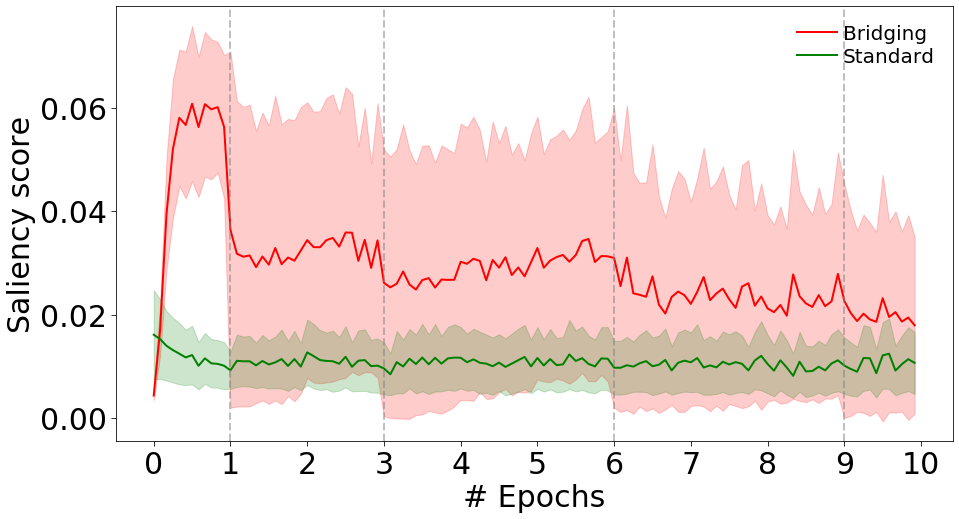

In [503]:
colors = ['r','g','r','black','m']
labels = ["Bridging","Standard"]
edge_colors = ['r','g']
face_colors = ['r','g']
plot_save(data, path, colors, labels,edge_colors,face_colors, title='bridging')

In [504]:
# ours
# file = "/Users/zber/Documents/FGdroid/exp_result/S_score_comparison/ours.json"
file = "/Users/zber/Documents/FGdroid/exp_result/S_score_comparison/ours_layer2.json"
path = os.path.dirname(file)
with open(file, 'r') as f:
    data = json.load(f)

In [505]:
def plot_save(dic, path, colors, labels, e_colors, f_colors, title='Grad'):
    grow_epochs = [1, 3, 6, 9]
    # pdf file name
    path = os.path.join(path, '{}.pdf'.format(title))
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))
    for key, colour, label, e, f in zip(dic.keys(), colors, labels,e_colors,f_colors):
        y = np.asarray(dic[key][0])
        x = np.arange(0,len(y))
        error = np.asarray(dic[key][1])
        ax.plot(x, y, colour, label=label, linestyle='-', lw='2')
        ax.fill_between(x, y-error, y+error,
        alpha=0.2, edgecolor=e, facecolor=f)
        
    for i in grow_epochs:
        point_x = i * (600 / 50)
        plt.axvline(x=point_x, color='grey', linestyle='--', lw='2', alpha=0.5)
    
       #  set x, y labels
    ax.set_ylabel('Saliency score',fontsize=30)
    ax.set_xlabel("# Epochs",fontsize=30)
    
    # set x,y ticks
    ax.yaxis.set_tick_params(labelsize=30,length=5)
    ax.xaxis.set_tick_params(labelsize=30,length=5)
    
    # set x,y lims
#     ax.set_ylim(0,0.10)
    plt.xticks(np.arange(0,121,12), np.arange(0,11))
#       rotation=20)
    
    # legend
    ax.legend(loc="upper right", prop={'size': 20,},ncol=1,fancybox=True, framealpha=0.0,labelspacing=0.2,handletextpad = 0.3)
    
    # set title
    plt.show()
    fig.savefig(path)
    plt.close(fig)

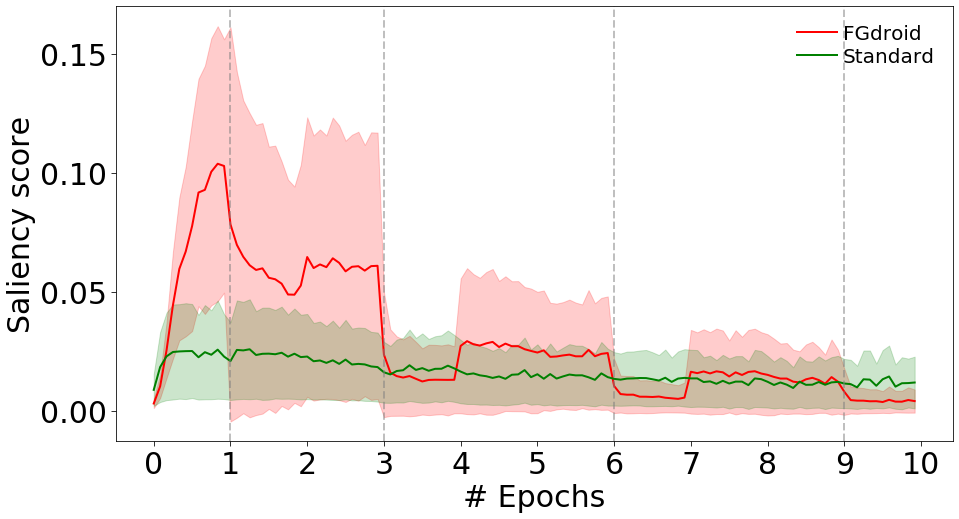

In [506]:
colors = ['r','g','r','black','m']
labels = ["FGdroid","Standard"]
edge_colors = ['r','g']
face_colors = ['r','g']
plot_save(data, path, colors, labels,edge_colors,face_colors, title='FGdroid_layer2')

In [ ]:
# [93,95] ,[56,73]
# [97.24,98.04], [75.02,78.98]
# [82.5,83.93]  [55.58,65.79]
# data = [98.44, 100, 91.55]
# data = [92.10,89.39]
# data = [100.00 ,100.00 ,95.8]
# data = [99.72,94.87]
data = [42.82,37.22]
np.std(data)

# Histogram

In [242]:
#data
copy_file = "/Users/zber/ProgramDev/exp_pyTorch/results/MNIST_copy_n_20200703-222745/weight.json"
with open(copy_file, 'r') as f:
    copy = json.load(f)

rank_file = "/Users/zber/ProgramDev/exp_pyTorch/results/MNIST_rank_baseline_20200703-222219/weight.json"
with open(rank_file, 'r') as f:
    rank = json.load(f)
    
bri_file = "/Users/zber/ProgramDev/exp_pyTorch/results/MNIST_bridging_20200703-214405/weight.json"
with open(bri_file, 'r') as f:
    bri = json.load(f)

our_file = "/Users/zber/ProgramDev/exp_pyTorch/results/Standard_MNIST_LeNet_20200703-222210/weight.json"
with open(our_file, 'r') as f:
    our = json.load(f)

path = '/Users/zber/Documents/FGdroid/exp_result/A_4_hist'
    
    
k_b = "before"
k_a = "4"
keys = [k_b, k_a]
lw = 2
f_size = 30
t_size = 20

In [245]:
def plot_hist(dic, color, label, ax,x_label):
    bins = np.arange(0, 0.3, 0.01)


    for key, c,l in zip(keys, color, label):
        counts, edges, plot = ax.hist(dic[key], bins=bins, alpha=0.3, label=l, color=c, lw=lw, edgecolor='black')
#         sns.kdeplot(dic[key])
#         sns.distplot(dic[key], hist=True, kde=False, ax= ax, norm_hist= False,
#              bins=bins, color = c, 
#              hist_kws={'edgecolor':c},
#              kde_kws={'linewidth': 4})

#         plt.title('L_{}'.format(layer))
#     ax.set_ylabel('Saliency score',fontsize=30)
#         print(repr(counts),edges)
    ax.set_xlabel(x_label,fontsize=30)
#         ax.set_ylim(0,0.10)
    return counts, edges, plot



In [246]:
colors = ["#4CB44C","#F4820B","#C775FF","#FF545A"] #  "#FF545A"
labels = ["Before","After","Net2net","NeST"]

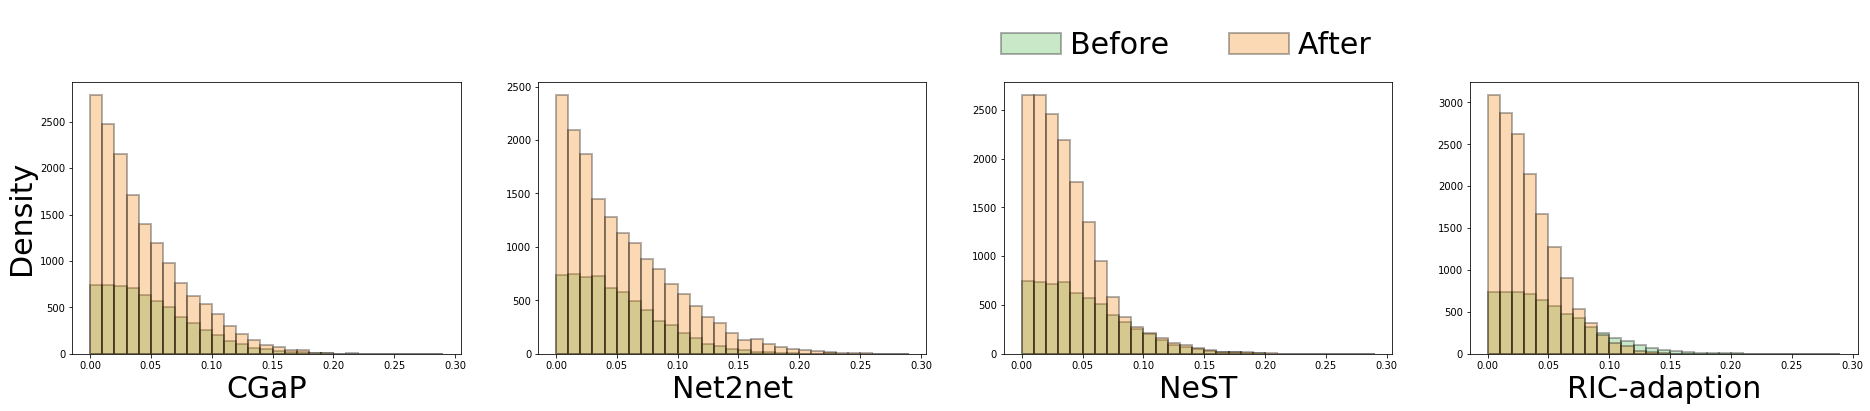

In [247]:
save_path = os.path.join(path, '{}.pdf'.format('hist_4'))
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(32, 5))
rank,x,_ = plot_hist(rank, colors, labels, ax=ax[0],x_label='CGaP')
copy,x,_ = plot_hist(copy, colors, labels, ax=ax[1],x_label='Net2net')
bri,x,_ = plot_hist(bri, colors, labels, ax=ax[2],x_label='NeST')
our,x,_ = plot_hist(our, colors, labels, ax=ax[3],x_label='RIC-adaption')
ax[0].set_ylabel('Density',fontsize=f_size)
new_lines, new_labels = ax[0].get_legend_handles_labels()
fig.legend(new_lines, new_labels, loc='upper center',bbox_to_anchor=(0.515, 1.13),prop={'size': f_size,},ncol=6,fancybox=True, framealpha=0.0,labelspacing=0.2,handletextpad = 0.3)
plt.show()
fig.tight_layout()
fig.savefig(save_path,format='pdf', bbox_inches="tight")

In [163]:
x.min

<function ndarray.min>

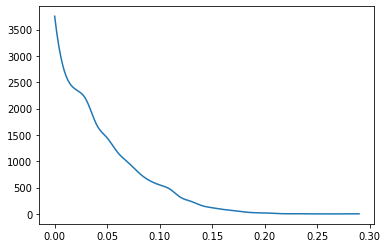

In [157]:


# 300 represents number of points to make between T.min and T.max
xnew = np.linspace(x.min(), x.max(), 300) 

spl = make_interp_spline(x[1:], rank, k=3)  # type: BSpline
power_smooth = spl(xnew)

plt.plot(xnew, power_smooth)
plt.show()

In [337]:
# seed
copy_file = "/Users/zber/ProgramDev/exp_pyTorch/results/MNIST_copy_n_weight_seed/weight.json"
with open(copy_file, 'r') as f:
    copy_seed = json.load(f)

rank_file = "/Users/zber/ProgramDev/exp_pyTorch/results/MNIST_rank_baseline_weight_seed/weight.json"
with open(rank_file, 'r') as f:
    rank_seed = json.load(f)
    
bri_file = "/Users/zber/ProgramDev/exp_pyTorch/results/MNIST_bridging_weight_seed/weight.json"
with open(bri_file, 'r') as f:
    bri_seed = json.load(f)

our_file = "/Users/zber/ProgramDev/exp_pyTorch/results/Standard_MNIST_LeNet_weight_seed/weight.json"
with open(our_file, 'r') as f:
    our_seed = json.load(f)

# mid
copy_file = "/Users/zber/ProgramDev/exp_pyTorch/results/MNIST_copy_n_mid/weight.json"
with open(copy_file, 'r') as f:
    copy_mid = json.load(f)

rank_file = "/Users/zber/ProgramDev/exp_pyTorch/results/MNIST_rank_baseline_mid/weight.json"
with open(rank_file, 'r') as f:
    rank_mid = json.load(f)
    
bri_file = "/Users/zber/ProgramDev/exp_pyTorch/results/MNIST_bridging_mid/weight.json"
with open(bri_file, 'r') as f:
    bri_mid = json.load(f)

our_file = "/Users/zber/ProgramDev/exp_pyTorch/results/Standard_MNIST_LeNet_mid/weight.json"
with open(our_file, 'r') as f:
    our_mid = json.load(f)

#large data
copy_file = "/Users/zber/ProgramDev/exp_pyTorch/results/MNIST_copy_n_20200703-222745/weight.json"
with open(copy_file, 'r') as f:
    copy_large = json.load(f)

rank_file = "/Users/zber/ProgramDev/exp_pyTorch/results/MNIST_rank_baseline_20200703-222219/weight.json"
with open(rank_file, 'r') as f:
    rank_large = json.load(f)
    
bri_file = "/Users/zber/ProgramDev/exp_pyTorch/results/MNIST_bridging_20200703-214405/weight.json"
with open(bri_file, 'r') as f:
    bri_large = json.load(f)

our_file = "/Users/zber/ProgramDev/exp_pyTorch/results/Standard_MNIST_LeNet_20200703-222210/weight.json"
with open(our_file, 'r') as f:
    our_large = json.load(f)

#full data
copy_file = "/Users/zber/ProgramDev/exp_pyTorch/results/MNIST_copy_n_full/weight.json"
with open(copy_file, 'r') as f:
    copy_full = json.load(f)

rank_file = "/Users/zber/ProgramDev/exp_pyTorch/results/MNIST_rank_baseline_full/weight.json"
with open(rank_file, 'r') as f:
    rank_full = json.load(f)
    
bri_file = "/Users/zber/ProgramDev/exp_pyTorch/results/MNIST_bridging_full/weight.json"
with open(bri_file, 'r') as f:
    bri_full = json.load(f)

our_file = "/Users/zber/ProgramDev/exp_pyTorch/results/Standard_MNIST_LeNet_full/weight.json"
with open(our_file, 'r') as f:
    our_full = json.load(f)
    
k_b = "before"
k_a = "4"
keys = [k_b, k_a]
lw = 4
f_size = 30
t_size = 20

In [287]:
def get_news_weight(array, old=(2,5), new=(4,8)):
    np_array = np.asarray(array)
    np_shape = np_array.reshape(new[1],new[0],5,5)
    np_new1 = np_shape[old[1]:,:old[0]]
    flatten_np1 = np_new1.reshape(-1)
    np_new2 = np_shape[:,old[0]:]
    flatten_np2 = np_new2.reshape(-1)
    result = np.hstack((flatten_np1,flatten_np2))
    
    return result

In [317]:
def get_news_weight(array, old=(2,5), new=(4,8)):
    np_array = np.asarray(array)
    np_shape = np_array.reshape(new[1],new[0],5,5)
    np_old = np_shape[:old[1],:old[0]]
    result = np_old.reshape(-1)
    return result

In [384]:
num_key = '4'
large_dic = {}
large_dic['before'] = rank_large['before']
large_dic['rank'] = rank_large[num_key]
large_dic['copy'] = copy_large[num_key]
large_dic['bri'] = bri_large[num_key]
large_dic['our'] = np.asarray(our_large[num_key])*1.3

In [385]:
seed_dic = {}
seed_dic['before'] = rank_seed['before']
seed_dic['rank'] = rank_seed[num_key]
seed_dic['copy'] = copy_seed[num_key]
seed_dic['bri'] = bri_seed[num_key]
seed_dic['our'] = np.asarray(our_seed[num_key])*1.3

In [386]:
mid_dic = {}
mid_dic['before'] = rank_mid['before']
mid_dic['rank'] = rank_mid[num_key]
mid_dic['copy'] = copy_mid[num_key]
mid_dic['bri'] = bri_mid[num_key]
mid_dic['our'] = np.asarray(our_mid[num_key])*1.3

In [387]:
colors = ["#337FBA","#F4820B","#C775FF","#FF545A","#4CB44C"]
labels = ["Full Size","CGaP","Net2net","NeST","RIC-adaption"]

# existing or new

In [298]:
num_key = '4'
old = (2,5)
new = (4,8)
seed_dic = {}
# seed_dic['before'] = copy_seed['before']
seed_dic['rank'] = get_news_weight(rank_seed[num_key], old,new)
seed_dic['copy'] = get_news_weight(copy_seed[num_key], old,new)
seed_dic['bri'] = get_news_weight(bri_seed[num_key], old,new)
seed_dic['our'] = get_news_weight(our_seed[num_key], old,new)

In [299]:
num_key = '4'
old = (5,12)
new = (8, 20)
mid_dic = {}
# mid_dic['before'] = get_news_weight(rank_mid['before'], old,new)
mid_dic['rank'] = get_news_weight(rank_mid[num_key], old,new)
mid_dic['copy'] = get_news_weight(copy_mid[num_key], old,new)
mid_dic['bri'] = get_news_weight(bri_mid[num_key], old,new)
mid_dic['our'] = get_news_weight(our_mid[num_key], old,new)

In [300]:
num_key = '4'
old = (10,25)
new = (16, 40)
large_dic = {}
# large_dic['before'] = get_news_weight(rank_large['before'], old,new)
large_dic['rank'] = get_news_weight(rank_large[num_key], old,new)
large_dic['copy'] = get_news_weight(copy_large[num_key], old,new)
large_dic['bri'] = get_news_weight(bri_large[num_key], old,new)
large_dic['our'] = get_news_weight(our_large[num_key], old,new)

In [355]:
colors = ["#F4820B","#C775FF","#FF545A","#4CB44C"]  #"#337FBA",
labels = ["CGaP","Net2net","NeST","RIC-adaption"] #"Full Size",

# full

In [388]:
num_key = '9'
full_dic = {}
full_dic['rank'] = rank_full[num_key]
full_dic['copy'] = copy_full[num_key]
full_dic['bri'] = bri_full[num_key]
full_dic['our'] = our_full[num_key]

In [389]:
colors = ["#337FBA","#F4820B","#C775FF","#FF545A","#4CB44C"]
labels = ["Full Size","CGaP","Net2net","NeST","RIC-adaption"]

In [390]:
def plot_hist(dic, color, label, ax,x_label):
    bins = np.arange(0, 0.3, 0.01)


    for key, c,l in zip(dic.keys(), color, label):
        counts, edges, plot = ax.hist(dic[key], bins=bins, alpha=0.1, color=c, lw=2, edgecolor=c) #, density= True
        

        xnew = np.linspace(0.005, 0.29, 300) 

        spl = make_interp_spline(edges[1:], counts, k=1)
        power_smooth = spl(xnew)

        ax.plot(xnew, power_smooth, color=c, lw=lw, label=l)

    ax.set_xlabel(x_label,fontsize=30)
#         ax.set_ylim(0,0.10)
    return counts, edges, plot

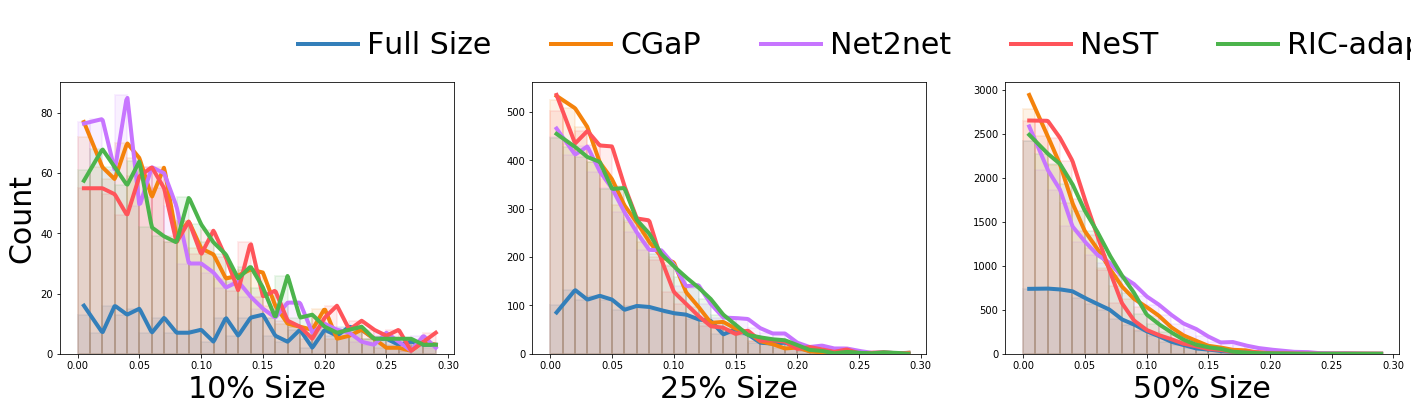

In [391]:
save_path = os.path.join(path, '{}.pdf'.format('hist_5'))
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 5))
plot_hist(seed_dic, colors, labels,ax=ax[0],x_label='10% Size')
plot_hist(mid_dic, colors, labels,ax=ax[1],x_label='25% Size')
plot_hist(large_dic, colors, labels,ax=ax[2],x_label='50% Size')
ax[0].set_ylabel('Count',fontsize=f_size)
new_lines, new_labels = ax[0].get_legend_handles_labels()
fig.legend(new_lines, new_labels, loc='upper center',bbox_to_anchor=(0.515, 1.13),prop={'size': f_size,},ncol=6,fancybox=True, framealpha=0.0,labelspacing=0.2,handletextpad = 0.3)
plt.show()
fig.tight_layout()
fig.savefig(save_path,format='pdf', bbox_inches="tight")

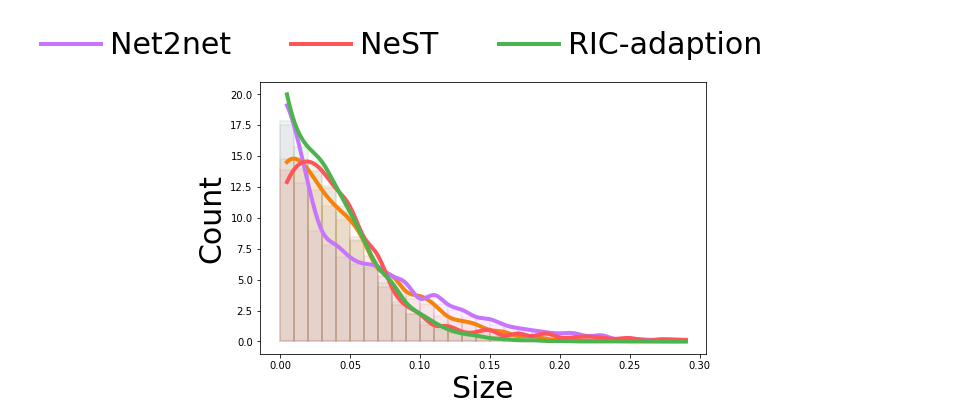

In [358]:
save_path = os.path.join(path, '{}.pdf'.format('full.pdf'))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
plot_hist(full_dic, colors, labels,ax=ax,x_label='Size')
ax.set_ylabel('Count',fontsize=f_size)
new_lines, new_labels = ax.get_legend_handles_labels()
fig.legend(new_lines, new_labels, loc='upper center',bbox_to_anchor=(0.515, 1.13),prop={'size': f_size,},ncol=6,fancybox=True, framealpha=0.0,labelspacing=0.2,handletextpad = 0.3)
plt.show()
fig.tight_layout()
fig.savefig(save_path,format='pdf', bbox_inches="tight")

In [ ]:
# rank Accuracy:[96.23, 97.77, 98.26, 98.53, 98.62, 98.81]
# copy Accuracy:[96.04, 97.72, 97.97, 98.5, 98.71, 98.81]
# ours Accuracy:[96.19, 97.82, 98.35, 98.55, 98.75, 98.68]
# bri Accuracy:[96.05, 97.76, 98.21, 98.53, 98.74, 98.61]

# Motivation Graph

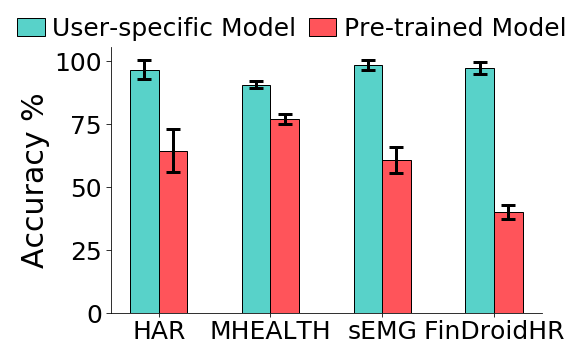

In [430]:
# Har, EMG, MyHealth user specific

# good = [94, 97.64, 83.215] 
good = [96.66333333333334, 90.745, 98.6,97.295]
bad = [64.5,77.0,60.685,40.01]
# st_good = [1.0,0.40,0.71]
st_good = np.asarray([3.671,1.35,1.97,2.42])
st_bad = [8.5,1.98,5.1,2.8]


ind = np.arange(len(good))*0.9  # the x locations for the groups
width = 0.23  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(ind - width/2, good, width,edgecolor = 'black',color='#58D2C9',
                label='User-specific Model', yerr=st_good,error_kw=dict(elinewidth=3,markeredgewidth=3,capsize=7))
rects2 = ax.bar(ind + width/2, bad, width, yerr=st_bad,edgecolor = 'black',
                label='Pre-trained Model',capsize=5,color = '#FF545A',error_kw=dict(elinewidth=3,markeredgewidth=3,capsize=7))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Accuracy %",fontsize=30)
# ax.set_xlabel("# Devices",fontsize=30)
#ax.set_title('epoches by nodes',fontsize=18,fontweight="bold")
#ax.set_yticklabels(fontsize=20)
ax.yaxis.set_tick_params(labelsize=25,length=5)
ax.set_xticks(ind)
ax.set_xticklabels(('HAR', 'MHEALTH', 'sEMG','FinDroidHR'),fontsize=25)
ax.legend(loc="upper center", prop={'size': 25,},ncol=2,bbox_to_anchor=(0.42, 1.2),fancybox=True, framealpha=0.0,labelspacing=0.1,handletextpad = 0.3,columnspacing=0.5,handlelength = 1.1)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()

labelsize=20
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)  
plt.show()
fig.savefig('/Users/zber/Documents/FGdroid/exp_result/M_1/user_specific.pdf', format='pdf', dpi=1000,bbox_inches = 'tight',
    pad_inches = 0)

In [418]:
rank1 = [98.15, 88.43, 88.47]
rank2 = [52.71, 56.17, 61.85]
copy1 = [84.57,88.57,97.81]
copy2 = [68.09, 69.09, 65.87]
bridging1 = [79.72, 89.72, 97.47]
bridging2 = [71.53, 71.53 ,97.30 ]
ours1 = [98.23, 98.52, 98.35]
ours2 = [97.61, 98.18, 98.47]

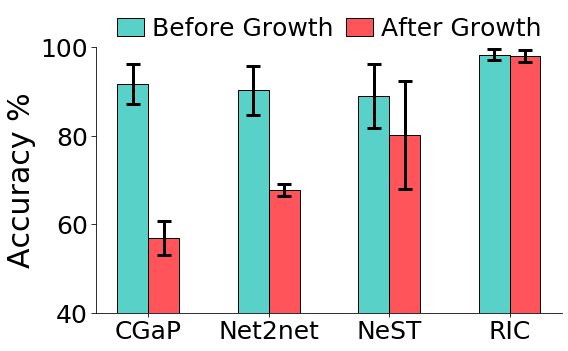

In [431]:
# Har, EMG, MyHealth user specific
bar1_m = [91.68,90.31,88.96,98.36]
bar1_std = [4.5726530106225605, 5.544518814909814, 7.265787408579105, 1.31897712198382866]

bar2_m = [56.91, 67.68333333333334, 80.12, 98.08666666666666]
bar2_std = [3.7678995032599616, 1.345643175420421, 12.148094500784886, 1.35724252577516935]

ind = np.arange(len(good))*0.9  # the x locations for the groups
width = 0.23  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(ind - width/2, bar1_m, width,edgecolor = 'black',color='#58D2C9',
                label='Before Growth', yerr=bar1_std,error_kw=dict(elinewidth=3,markeredgewidth=3,capsize=7))
rects2 = ax.bar(ind + width/2, bar2_m, width, yerr=bar2_std,edgecolor = 'black',
                label='After Growth',capsize=5,color = '#FF545A',error_kw=dict(elinewidth=3,markeredgewidth=3,capsize=7))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Accuracy %",fontsize=30)
# ax.set_xlabel("# Devices",fontsize=30)
#ax.set_title('epoches by nodes',fontsize=18,fontweight="bold")
#ax.set_yticklabels(fontsize=20)
ax.yaxis.set_tick_params(labelsize=25,length=5)
ax.set_xticks(ind)
ax.set_xticklabels(('CGaP', 'Net2net', 'NeST','RIC'),fontsize=25)
ax.legend(loc="upper center", prop={'size': 25,},ncol=2,bbox_to_anchor=(0.5, 1.2),fancybox=True, framealpha=0.0,labelspacing=0.1,handletextpad = 0.3,columnspacing=0.5,handlelength = 1.1)

ax.set_ylim(40,100)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()

labelsize=20
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)  
plt.show()
fig.savefig('/Users/zber/Documents/FGdroid/exp_result/M_5/acc_drop.pdf', format='pdf', dpi=1000,bbox_inches = 'tight',
    pad_inches = 0)

## M2

In [ ]:
file= "/Users/zber/Documents/FGdroid/exp_result/M_2/m2_loss.json"
with open(file, 'r') as f:
    loss = json.load(f)

In [ ]:
for key in loss.keys():
    arr = np.asarray(loss[key])
    mean = np.mean(arr, axis=0)
    std = np.std(arr, axis=0)
    data[key]['mean'] = mean.tolist()
    data[key]['std'] = std.tolist()

In [ ]:
# data['bridging']['mean']
data['bridging']['mean'].index(1.4974025225639345)

In [ ]:
# data['rank']['mean']
data['rank']['mean'].index(1.4974025225639345)

In [ ]:
# len(data['bridging']['mean'])
# len(data['bridging']['time'])
# len(data['rank']['time'])
# len(data['rank']['mean'])
# len(data['standard']['time'])
# len(data['standard']['mean'])
# data['standard']['mean'].index(1.4790344691276551)
# data['standard']['time'][2]
# data['standard']['mean']

(68.37- 5) * 60 

In [ ]:
target_path = "/Users/zber/Documents/FGdroid/exp_result/M_2/m2_time_loss.json"
with open(target_path, 'w') as f:
    json.dump(data, f, indent=4)

In [880]:
# 1. ours grow to 8, 23, 50
# standard 2.5
# rank cirle = 85, 25.68 di 1240.8s
# bridging circle = 166, 68.37 3802s


# 2. rank_baseline  grow to OverP (Exponential)
# rank = CGaP， bridging改NeST， copy改Net2net， standard改Over-parameterized

# 3. bridging grow to OverP (Linear)

# 1. 3圈，红色， rank粉红，standard 橘黄
# 2. 算下3圈和这个小红圈的时间差，秒单位
# 3. 比例调成和昨天图一样
# 4. rank 改 CGaP， bridging改NeST， copy改Net2net， standard改Over-parameterized

# 4. Standard OverP
file= "/Users/zber/Documents/FGdroid/exp_result/grow_controller/acc_time.json"
with open(file, 'r') as f:
    dataold = json.load(f)

standard = dataold['standard']

file2 = "/Users/zber/Documents/FGdroid/exp_result/M_2/m2_total.json"


file3 = "/Users/zber/Documents/FGdroid/result/6-8/df05_costDiff_A6H4/loss_our12.json"


with open(file3, 'r') as f:
    our12 = json.load(f)

target_path = "/Users/zber/Documents/FGdroid/exp_result/M_2/m2_time_loss.json"
path = os.path.dirname(file2)
with open(target_path, 'r') as f:
    data = json.load(f)


    

# data['standard'] ={}
# data['standard']['time'] = standard[0]
# data['standard']['mean'] = standard[1]
r_x = 25.20
r_y = 97.74
b_x = 71.28 
b_y = 95.2
c_x = 14.87
c_y = 97.5
s_x = 5.8
font_size =30
lw= 5
cir_size = 500
# # red, yellow, blue, deep blue, green, light yellow
# colors = ["#FF545A","#FFBE54","#58D2C9","#337FBA",'#4CB44C',"#DACA65"]


# colors = ["#003f5c","#444e86", "#955196", "#dd5182","#ff6e54", "#ffa600"]



In [881]:
def plot_save(dic, path, colors, labels, e_colors, f_colors, title='Grad'):
    grow_epochs = [1, 3, 6, 9]
    # pdf file name
    path = os.path.join(path, '{}.pdf'.format(title))
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10))
    for key, colour, label, e, f in zip(dic.keys(), colors, labels,e_colors,f_colors):
        if key== 'standard':
            x = dic[key][0]
#             x = np.arange(0,len(dic[key][0]))
            y = dic[key][1]
        else:
            x = dic[key]['time']
#             x = np.arange(0,len(dic[key]['time']))
            y = dic[key]['mean']
            error = np.asarray(dic[key]['std'])
        ax.plot(x, y, colour, label=label, linestyle='-', lw=lw)
        if key != 'standard':
            ax.fill_between(x, y-error, y+error,
            alpha=0.2, edgecolor=e, facecolor=f)

    # plot marker
    ax.scatter(r_x,r_y, s = 700,marker='o',facecolors='none', edgecolors='r',linewidths= lw)
    ax.scatter(b_x,b_y,s = 700,marker='o',facecolors='none', edgecolors='r',linewidths= lw)
    ax.scatter(c_x,c_y,s = 700,marker='o',facecolors='none', edgecolors='r',linewidths= lw)
    
       #  set x, y labels
    ax.set_ylabel("Accuracy %",fontsize=font_size)
    ax.set_xlabel("Time(mins)",fontsize=font_size)
    
    # set x,y ticks
    ax.yaxis.set_tick_params(labelsize=font_size,length=5)
    ax.xaxis.set_tick_params(labelsize=font_size,length=5)
    
    # set x,y lims
    ax.set_xlim(0,80)
    ax.set_ylim(60,100)
#     plt.xticks(np.arange(0,121,12), np.arange(0,11))
#       rotation=20)
    
    # legend
    ax.legend(loc="lower right", prop={'size': 40,},ncol=1,fancybox=True, framealpha=0.0,labelspacing=0.2,handletextpad = 0.3)
    
    fig.tight_layout()
        
    # set title
    plt.show()
    fig.savefig(path)
    plt.close(fig)

KeyError: 0

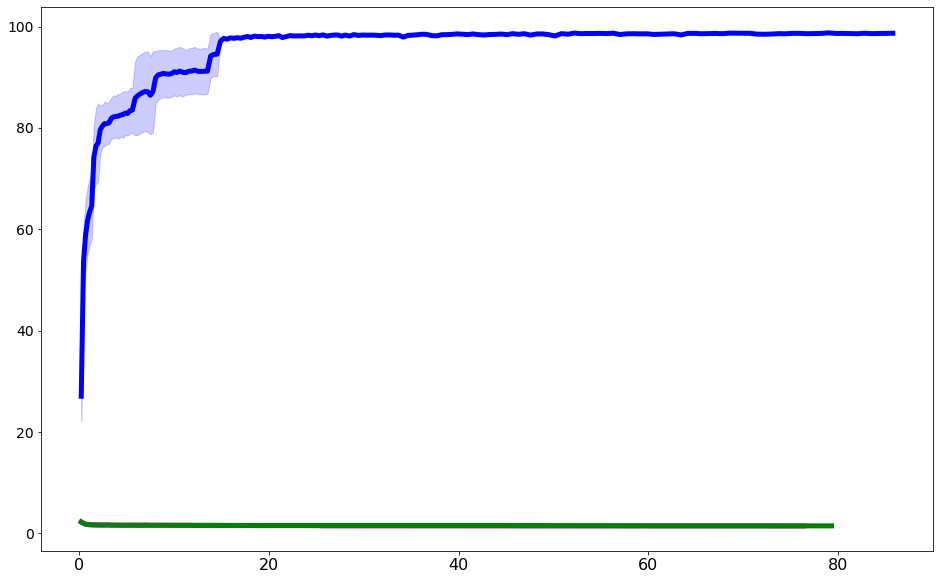

In [882]:
colors = ['fuchsia','g','b','orange','m']
labels = ["CGaP","NeST","Net2net","Over-parameterized"]
edge_colors = ['fuchsia','g','b','orange','m']
face_colors = ['pink','g','b','orange','m']
plot_save(data, path, colors, labels,edge_colors,face_colors, title='slow_converge')

In [883]:
def plot_save(dic, path, colors, labels, e_colors, f_colors, title='Grad'):
    grow_epochs = [1, 3, 6, 9]
    # pdf file name
    path = os.path.join(path, '{}.pdf'.format(title))
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
    for key, colour, label, e, f in zip(dic.keys(), colors, labels,e_colors,f_colors):
        if key == 'copy':
            continue
#         if key == 'standard':
#             x = np.arange(0,len(dic[key]['time'])*6,6)
#         else:
#             x = np.arange(0,len(dic[key]['time']))
        x = dic[key]['time']
        y = dic[key]['mean']
        a = 0.8
        if key == 'standard':
            a = 1
        ax.plot(x, y, colour, label=label, linestyle='-', lw=lw, alpha=a)
        if key != 'standard':
            error = np.asarray(dic[key]['std'])
            ax.fill_between(x, y-error, y+error,
            alpha=0.2, edgecolor=e, facecolor=f)

    # plot marker
#     ax.scatter(r_x,r_y, s = 700,marker='o',facecolors='none', edgecolors='r',linewidths= 3)
#     ax.scatter(b_x,b_y,s = 700,marker='o',facecolors='none', edgecolors='r',linewidths= 3)
#     ax.scatter(c_x,c_y,s = 400,marker='o',facecolors='none', edgecolors='r',linewidths= 2.5)
    
    
    # ours loss
#     len_ = len(our12['ours'][0])
#     x = np.arange(0,len_)
#     y = our12['ours'][0]
#     ax.plot(x, y, colors[4], label="FGdroid", linestyle='-', lw=lw)
       #  set x, y labels
    ax.set_ylabel("Loss",fontsize=font_size)
#     ax.set_xlabel("Time(mins)",fontsize=font_size)
    ax.set_xlabel("Time(mins)",fontsize=font_size)
    
    # set x,y ticks
    ax.yaxis.set_tick_params(labelsize=25,length=3)
    ax.xaxis.set_tick_params(labelsize=30,length=5)

    # set x,y lims
    ax.set_xlim(0,80)
    ax.set_ylim(1.45,1.75)
#     plt.xticks(np.arange(0,180,30), np.arange(0,30,5))
    

#     plt.axvline(x=26, color='grey', linestyle='--', lw='5', alpha=0.5)
#     plt.axvline(x=71.4, color='grey', linestyle='--', lw='5', alpha=0.5)
    
    # legend
#     ax.legend(loc="upper right", prop={'size': 20,},bbox_to_anchor=(1.04, 1.0),ncol=1,fancybox=True, framealpha=0.0,labelspacing=0.2,handletextpad = 0.3)
    ax.legend(loc="upper left", prop={'size': 25,},ncol=3,bbox_to_anchor=(0.05, 1.2),fancybox=True, framealpha=0.0,labelspacing=0.1,handletextpad = 0.3,columnspacing=0.5,handlelength = 1.1)
    
    plt.yticks([1.45,1.6,1.75])
    fig.tight_layout()
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # set title
    plt.show()
    fig.savefig(path, format='pdf', dpi=1000,bbox_inches = 'tight',pad_inches = 0)
    plt.close(fig)

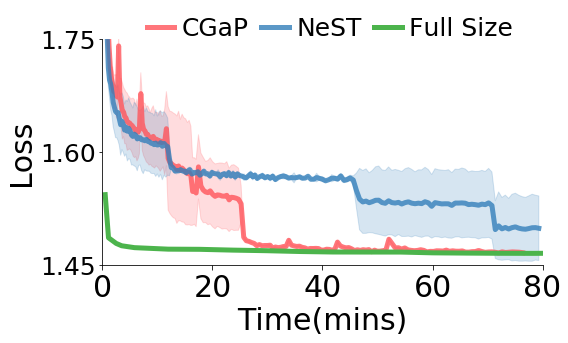

In [884]:
%matplotlib inline
# red, yellow, blue, deep blue, green, light yellow
colors = ["#FF545A","#337FBA","#FFBE54",'#4CB44C',"#58D2C9","#DACA65"]
labels = ["CGaP","NeST","Net2net","Full Size"]
# edge_colors = ['b','g','b','orange','m']
edge_colors = colors
face_colors = colors
# face_colors = ['b','g','b','orange','m']
plot_save(data, path, colors, labels,edge_colors,face_colors, title='slow_converge_no_copy')

# M3

LeNet: 99.72, 23.06, 90.55
MobileNet: 99.16, 21.67, 91.39
Sit, Run-by-sit, Continual Train
Accuracy(%)


MNIST, HAR, CIFAR-10
Time(mins): 101, 26.5, 164
Latency(ms): 280, 150, 1971

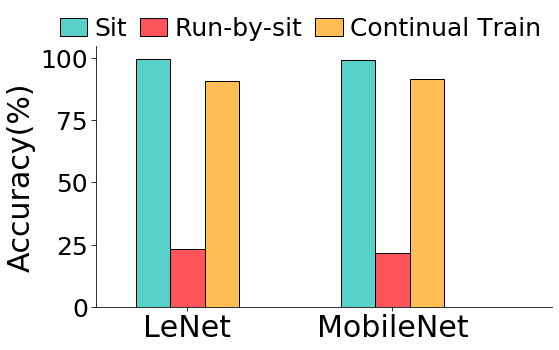

In [885]:
# mbnet lenet
# data load
sit = [99.72,99.16]
runsit  = [23.06, 21.67]
conti  = [90.55, 91.39]

colors = ["#58D2C9","#FF545A","#FFBE54","#337FBA",'#4CB44C',"#DACA65"]

ind = np.asarray([0.9,1.8])
# np.arange(1,len(sit+1))*0.9  # the x locations for the groups
width = 0.1500  # the width of the bars


# ax2 = ax.twinx()
fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(ind - width, sit, width,edgecolor = 'black',color=colors[0],
                label='Sit')
rects3 = ax.bar(ind , runsit, width, edgecolor = 'black',
                label='Run-by-sit', color = colors[1])
rects2 = ax.bar(ind + width, conti, width, edgecolor = 'black',
                label='Continual Train',color = colors[2])


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Accuracy(%)",fontsize=30)
# ax.set_xlabel("# Devices",fontsize=30)
#ax.set_title('battery variance',fontsize=18,fontweight="bold")
ax.yaxis.set_tick_params(labelsize=25,length=5)
ax.set_xticks(ind)
ax.set_xticklabels(('LeNet','MobileNet'),fontsize=30)
ax.set_xlim(0.5,2.5)

ax.legend(loc="upper left", prop={'size': 25,},ncol=3,bbox_to_anchor=(-0.13, 1.2),fancybox=True, framealpha=0.0,labelspacing=0.1,handletextpad = 0.3,columnspacing=0.5,handlelength = 1.1)
# ax.legend(loc="upper center", prop={'size': 20,},ncol=3,bbox_to_anchor=(0.5, 1.2),fancybox=True, framealpha=0.0,labelspacing=0.1 ,handletextpad = 0.2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()
plt.show()
fig.savefig('/Users/zber/Documents/FGdroid/exp_result/M_3/localchange.pdf', format='pdf', dpi=1000,bbox_inches = 'tight',
    pad_inches = 0)

# M4

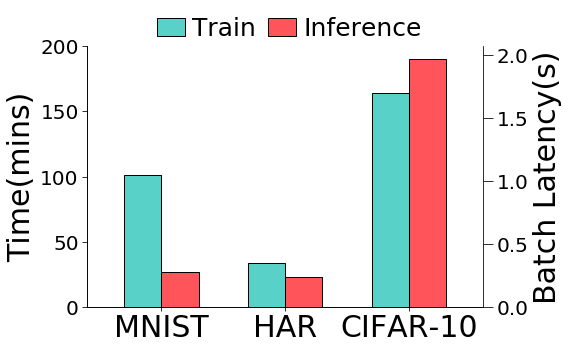

In [886]:
# mbnet lenet
colors = ["#58D2C9","#FF545A","#FFBE54","#337FBA",'#4CB44C',"#DACA65"]
trian = [101, 34, 164]
inference = np.asarray([280, 235, 1971])/1000

# Time(mins): 101, 34, 164
# Latency(ms): 280, 235, 1971


# ind = np.arange(len(trian))*0.9  # the x locations for the groups
ind = np.asarray([0.7,1.2,1.7]) 

width = 0.15  # the width of the bars


# ax2 = ax.twinx()
fig, ax = plt.subplots(figsize=(8, 5))
ax2 = ax.twinx()
rects1 = ax.bar(ind - width/2, trian, width,edgecolor = 'black',color=colors[0],
                label='Train')
rects3 = ax2.bar(ind + width/2 ,inference, width,edgecolor = 'black',color = colors[1],
                label='Inference')
# rects2 = ax.bar(ind + width, conti, width, edgecolor = 'black',
#                 label='Continual Train',color = colors[2])


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Time(mins)",fontsize=30)
# ax2.set_ylabel("Latency(s)",fontsize=30,rotation=270,labelpad = 30)
ax2.set_ylabel("Batch Latency(s)",fontsize=30)
# ax.set_xlabel("# Devices",fontsize=30)
#ax.set_title('battery variance',fontsize=18,fontweight="bold")
ax.yaxis.set_tick_params(labelsize=20,length=5)
ax2.yaxis.set_tick_params(labelsize=20,length=10)
ax.set_xticks(ind)
ax.set_xticklabels(('MNIST','HAR','CIFAR-10'),fontsize=30)
ax.set_ylim(0,200)
ax.set_xlim(0.4,2.0)

ax.legend(loc="upper left", prop={'size': 25,},ncol=2,bbox_to_anchor=(0.12, 1.2),fancybox=True, framealpha=0.0,labelspacing=0.1,handletextpad = 0.3,columnspacing=0.5,handlelength = 1.1)
ax2.legend(loc="upper left", prop={'size': 25,},ncol=2,bbox_to_anchor=(0.40, 1.2),fancybox=True, framealpha=0.0,labelspacing=0.1,handletextpad = 0.3,columnspacing=0.5,handlelength = 1.1)
# ax.legend(loc="upper center", prop={'size"': 20,},ncol=3,bbox_to_anchor=(0.5, 1.2),fancybox=True, framealpha=0.0,labelspacing=0.1 ,handletextpad = 0.2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

fig.tight_layout()
plt.show()
fig.savefig('/Users/zber/Documents/FGdroid/exp_result/M_4/train_infer.pdf', format='pdf', dpi=1000,bbox_inches = 'tight',
    pad_inches = 0)

# train epoch graph

In [ ]:


#decay esplion vs threshold vs threshold + decay esplion (3 bar, 看training time）

# epsilon_decay =(12.8,15,19.2,28,68.9, ,100)
# threshold =(13,13.4,21.05,29,54, , )
# threshold_epsilon_decay =(8.8,12.4,18.9,26,39.8, , )

# men_means, men_std = (20, 35, 30, 35, 27), (2, 3, 4, 1, 2)
# women_means, women_std = (25, 32, 34, 20, 25), (3, 5, 2, 3, 3)
# women_m, women_s = (25, 32, 34, 20, 25), (3, 5, 2, 3, 3)

#data
# epsilon_decay =(12.8,15,19.2,28,52.27,106.4,104.8)
# threshold =(13,13.4,21.05,29,60,103.2 ,88 )
# threshold_epsilon_decay =(8.8,12.4,17.9,26,42.4,88 ,82.6 )
epsilon_decay =(12.8,15,19.2,28,52.27,103.4,114.8)
epsilon_decay_time = [i*0.7 for i in epsilon_decay]
threshold =(13,13.4,21.05,29,60,81 ,88 )
threshold_time = [i * 0.7 for i in threshold]
threshold_epsilon_decay =(8.8,12.4,17.9,26,42.4,68.5 ,82.6)
threshold_epsilon_decay_time = [i * 0.7 for i in threshold_epsilon_decay]

st1 = [4.52,3.91,8.6,10.04,29.62,27.31,37.5]  #1.9

st1_time = [i*0.49 for i in st1]

st2 = [5.2,4.5,10.5,12.0,36.27,44.36,22.34]

st2_time = [i*0.49 for i in st2]

st3 = [3.03,3,5.41,7.34,19.64,11.11,14.28]

st3_time = [i*0.49 for i in st3]


ind = np.arange(len(epsilon_decay))*0.95  # the x locations for the groups
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(ind - width, epsilon_decay_time, width, yerr=st1_time,edgecolor = 'black',color='violet',
                label='DGE',capsize=5,hatch="\\\\",error_kw=dict(elinewidth=1.5,markeredgewidth=2))
rects2 = ax.bar(ind , threshold_time, width, yerr=st2_time,edgecolor = 'black',
                label='TGE',capsize=5,hatch="//",color = 'royalblue',error_kw=dict(elinewidth=1.5,markeredgewidth=2))
rects3 = ax.bar(ind + width, threshold_epsilon_decay_time, width, yerr=st3_time,edgecolor = 'black',
                label='TDGE',capsize=5,hatch="\\/",color = 'khaki',error_kw=dict(elinewidth=2,ecolor='crimson',markeredgewidth=2))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time(sec)',fontsize=30)
ax.set_xlabel("# Devices",fontsize=30)
#ax.set_title('epoches by nodes',fontsize=18,fontweight="bold")
#ax.set_yticklabels(fontsize=20)
ax.yaxis.set_tick_params(labelsize=30,length=5)
ax.set_xticks(ind)
ax.set_xticklabels(('3', '4', '5','6','7','8','9'),fontsize=30)
ax.legend(loc="upper left", prop={'size': 20,},ncol=1,bbox_to_anchor=(0.0, 1),fancybox=True, framealpha=0.0,labelspacing=0.1,handletextpad = 0.3)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
 

# def autolabel(rects, xpos='center'):
#     """
#     Attach a text label above each bar in *rects*, displaying its height.

#     *xpos* indicates which side to place the text w.r.t. the center of
#     the bar. It can be one of the following {'center', 'right', 'left'}.
#     """

#     ha = {'center': 'center', 'right': 'left', 'left': 'right'}
#     offset = {'center': 0, 'right': 1, 'left': -1}

#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(offset[xpos]*3, 3),  # use 3 points offset
#                     textcoords="offset points",  # in both directions
#                     ha=ha[xpos], va='bottom')


# autolabel(rects1, "left")
# autolabel(rects2, "right")

fig.tight_layout()

labelsize=20
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)  
plt.show()
fig.savefig('/Users/zber/Desktop/1_Data/Evaluation_Graph/RL_train_speed.pdf', format='pdf', dpi=1000,bbox_inches = 'tight',
    pad_inches = 0)

# Energy Balance

In [ ]:
#decay esplion vs threshold vs threshold + decay esplion (3 bar, 看training time）

ring = [0.333, 0.25, 0.2, 0.167, 0.143, 0.125, 0.111]
#random =
rl = [0.333, 0.917, 0.7, 0.967, 0.81, 1.268, 0.861]
tree = [0.333, 0.917, 1.7, 1.367, 1.476, 1.268, 1.861]



# men_means, men_std = (20, 35, 30, 35, 27), (2, 3, 4, 1, 2)
# women_means, women_std = (25, 32, 34, 20, 25), (3, 5, 2, 3, 3)
# women_m, women_s = (25, 32, 34, 20, 25), (3, 5, 2, 3, 3)

ind = np.arange(len(tree))*0.95  # the x locations for the groups
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(ind - width, ring, width,edgecolor = 'black',color='gold',hatch="/",
                label='Ring-scheduler')
rects3 = ax.bar(ind , tree, width, edgecolor = 'black',hatch="x",
                label='Tree-scheduler',color = 'cornflowerblue')
rects2 = ax.bar(ind + width, rl, width,edgecolor = 'black',
                label='ChainSGD-scheduler',hatch="\\\\",color = 'hotpink')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Engy Variance",fontsize=30)
ax.set_xlabel("# Devices",fontsize=30)
#ax.set_title('battery variance',fontsize=18,fontweight="bold")
ax.yaxis.set_tick_params(labelsize=30,length=5)
ax.set_xticks(ind)
ax.set_xticklabels(('3', '4', '5','6','7','8','9'),fontsize=30)
# ax.legend(loc="upper left", prop={'size': 17,},ncol=3,bbox_to_anchor=(0.0, 1.1),fancybox=True, framealpha=0.0,labelspacing=0.1,handletextpad = 0.3,columnspacing=0.5,handlelength = 1.1)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()
plt.show()
fig.savefig('/Users/zber/Desktop/1_Data/Evaluation_Graph/RL_battery_var.pdf', format='pdf', dpi=1000,bbox_inches = 'tight',
    pad_inches = 0)

In [ ]:
#原始数据
# tree = [3,4,4,5,5,5,5] 
# rl = [2,3,3,4,4,4,4]
# ring = [i * 21 for i in ring]
#,yerr=st1,capsize=5,error_kw=dict(elinewidth=2)

# Latency bar

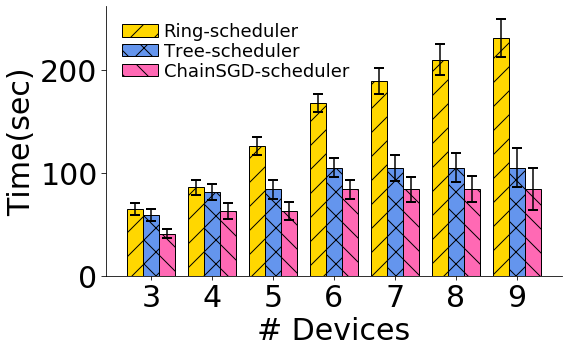

FileNotFoundError: [Errno 2] No such file or directory: '/Users/zber/Desktop/1_Data/Evaluation_Graph/RL_latency.pdf'

In [926]:
## latency bar
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#decay esplion vs threshold vs threshold + decay esplion (3 bar, 看training time）


tree = [59, 81, 84, 105, 105, 105, 105]
ring = [65, 86, 126, 168, 189, 210, 231]
rl = [41, 63, 63, 84, 84, 84, 84]

ring_er =[5.8, 7.5, 8.7, 9.1, 12.8, 15.1, 18.3]
tree_er =[5.5,7.8, 9, 9.3, 12.5, 14.3, 19.2]
rl_er =[4.3, 7.4, 8.3, 8.9, 12, 12.5, 20.3]


# men_means, men_std = (20, 35, 30, 35, 27), (2, 3, 4, 1, 2)
# women_means, women_std = (25, 32, 34, 20, 25), (3, 5, 2, 3, 3)
# women_m, women_s = (25, 32, 34, 20, 25), (3, 5, 2, 3, 3)

ind = np.arange(len(tree))*0.95  # the x locations for the groups
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(ind - width, ring, width,edgecolor = 'black',color='gold',yerr=ring_er,capsize=5,error_kw=dict(elinewidth=1.5,capsize=5,markeredgewidth=2),
                label='Ring-scheduler',hatch="/")
rects2 = ax.bar(ind , tree, width, edgecolor = 'black',yerr=tree_er,capsize=5,error_kw=dict(elinewidth=1.5,capsize=5,markeredgewidth=2),
                label='Tree-scheduler',hatch="x",color ='cornflowerblue')
rects3 = ax.bar(ind + width, rl, width,edgecolor = 'black',yerr=rl_er,capsize=5,error_kw=dict(elinewidth=1.5,capsize=5,markeredgewidth=2),
                label='ChainSGD-scheduler',hatch="\\\\",color ='hotpink' )

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Time(sec)",fontsize=30)
ax.set_xlabel("# Devices",fontsize=30)
#ax.set_title('Latency',fontsize=18,fontweight="bold")
ax.set_xticks(ind)
ax.set_xticklabels(('3', '4', '5','6','7','8','9'),fontsize=30)
ax.yaxis.set_tick_params(labelsize=30,length=5)
ax.legend(loc="upper left", prop={'size': 18,},ncol=1,fancybox=True, framealpha=0.0,labelspacing=0.1,handletextpad = 0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout()

labelsize=20
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)  
plt.show()
fig.savefig('/Users/zber/Desktop/1_Data/Evaluation_Graph/RL_latency.pdf', format='pdf', dpi=1000,bbox_inches = 'tight',
    pad_inches = 0)

In [ ]:
reward_decay =[-1.08, 0.76, 0.76, -1.04, 0.76, 0.76, 0.76, 0.86, 0.86, -1.2, -1.16, 0.76, -1.18, 0.76, 0.76, 0.86, -1.32, -1.2, -1.24, -1.32, -1.24, 0.86, 0.86, -1.12, -1.12, -1.24, 0.86, -1.18, 0.86, -1.2, -1.08, 0.86, -1.16, 0.86, 0.76, -1.32, 0.86, 0.86, -1.08, 0.76, 0.86, 0.86, -1.1600000000000001, -1.18, 0.86, -1.18, 0.86, -1.24, 0.86, 0.86, 0.76, 0.86, -1.24, 0.86, -1.26, -1.24, -1.16, 0.76, -1.12, 0.86, -1.18, -1.32, -1.3, -1.1600000000000001, 0.76, -1.04, -1.16, 0.86, 0.86, 0.86, -1.1600000000000001, -1.1600000000000001, -1.26, 0.86, 0.86, -1.3, -1.1400000000000001, -1.3, 0.76, 0.76, 0.76, 0.86, 0.76, 0.86, 0.86, 0.76, -1.12, -1.1600000000000001, 0.76, 0.86, 0.86, -1.18, 0.86, 0.76, -1.12, 0.76, 0.86, 0.76, 0.76, 0.86, -1.1600000000000001, 0.86, 0.86, 0.86, -1.5, 0.86, 0.86, 0.86, 0.86, 0.76, 0.86, 0.86, 0.86, 0.86, 0.86, 0.76, 0.76, 0.86, 0.86, 0.76, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.76, 0.86, 0.86, 0.86, 0.86, 0.86, 0.76, 0.86, 0.86, 0.76, 0.86, 0.76, 0.86, 0.76, 0.76, 0.76, 0.86, 0.86, 0.86, -1.24, 0.86, 0.86, 0.76, 0.76, 0.86, 0.86, -1.26, 0.86, 0.76, 0.86, 0.86, 0.86, 0.76, 0.86, 0.86, 0.76, 0.76, 0.86, 0.86, 0.76, 0.86, 0.76, 0.76, 0.86, 0.86, 0.86, 0.86, 0.76, 0.76, 0.76, 0.76, 0.76, 0.86, 0.76, -1.3, 0.86, 0.76, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.76, 0.86, 0.76, 0.86, 0.76, 0.76, 0.86]
reward_threshold = [0.76, 0.86, 0.86, 0.86, -1.2, -1.1600000000000001, -1.04, -1.12, -1.12, -1.1400000000000001, -1.2, -1.08, -1.18, -1.12, -1.16, -1.12, -1.04, -1.18, -1.18, -1.24, -1.1400000000000001, -1.26, -1.24, -1.5, 0.86, -1.32, -1.24, -1.1600000000000001, -1.16, -1.16, 0.86, 0.76, -1.1600000000000001, 0.76, -1.5, -1.24, 0.86, -1.1400000000000001, -1.18, -1.1400000000000001, -1.24, -1.1600000000000001, 0.86, 0.86, -1.18, -1.3, 0.86, 0.86, 0.76, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.76, 0.76, 0.86, 0.86, -1.1600000000000001, 0.86, 0.76, 0.76, 0.76, 0.86, 0.86, 0.86, 0.86, 0.86, 0.76, 0.86, 0.76, 0.76, 0.86, 0.86, 0.86, 0.76, 0.86, 0.86, 0.86, 0.86, 0.86, 0.76, 0.86, 0.86, 0.86, 0.76, 0.86, 0.86, 0.86, 0.76, 0.76, 0.86, 0.76, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.76, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.76, 0.86, 0.86, 0.76, 0.86, 0.86, 0.76, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.76, 0.86, 0.86, 0.76, 0.76, 0.76, 0.86, 0.76, 0.86, 0.76, 0.76, 0.76, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.76, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.76, 0.76, 0.76, 0.86, 0.86, 0.76, 0.86, 0.76, 0.86, 0.86, 0.76, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.76, 0.86, 0.76, 0.86, 0.76, 0.86, 0.86, 0.86, 0.76, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.76, 0.86, 0.86, 0.86, 0.76]
reward_threshold_decay = [0.86, 0.76, 0.76, 0.76, -1.2, -1.2, -1.2, -1.2, -1.32, -1.08, -1.16, -1.12, -1.1600000000000001, -1.12, -1.18, -1.04, -1.1600000000000001, -1.18, -1.18, -1.1600000000000001, -1.1600000000000001, -1.08, -1.24, -1.18, -1.24, -1.16, -1.24, -1.12, -1.3, -1.1600000000000001, -1.12, -1.2, -1.2, -1.08, -1.2, -1.1600000000000001, -1.18, -1.16, -1.08, -1.18, -1.1600000000000001, -1.24, 0.86, -1.32, -1.2, -1.2, -1.16, 0.76, -1.1600000000000001, 0.86, -1.32, -1.1600000000000001, -1.5, -1.5, 0.86, 0.86, -1.3, -1.1600000000000001, 0.86, -1.1600000000000001, -1.3, -1.5, -1.1600000000000001, -1.32, 0.86, -1.18, 0.86, 0.76, -1.18, -1.2, -1.2, -1.2, -1.12, -1.12, 0.86, -1.32, -1.1600000000000001, -1.26, 0.86, -1.26, 0.86, 0.86, 0.86, 0.76, 0.76, 0.76, 0.86, 0.76, 0.86, 0.86, 0.86, 0.86, 0.86, 0.76, -1.32, 0.76, 0.86, 0.86, -1.1600000000000001, -1.26, 0.76, 0.86, 0.86, 0.86, 0.86, 0.76, 0.76, 0.86, 0.86, 0.86, 0.86, 0.86, 0.76, 0.76, 0.76, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, -1.5, 0.76, -1.32, 0.76, 0.76, 0.76, 0.76, 0.86, 0.76, -1.18, 0.86, 0.86, 0.76, 0.76, 0.86, 0.86, 0.86, 0.76, 0.86, 0.76, 0.86, 0.76, 0.76, 0.86, 0.86, 0.86, 0.76, 0.86, 0.76, 0.86, 0.86, 0.76, 0.76, 0.76, 0.86, 0.86, 0.76, 0.76, 0.76, 0.86, 0.86, 0.86, 0.76, 0.86, 0.86, 0.76, 0.86, 0.76, 0.86, 0.86, 0.76, 0.86, 0.76, 0.86, 0.86, 0.86, 0.86, 0.76, 0.86, 0.86, 0.86, 0.76, 0.86, 0.76, 0.86, 0.76, 0.76, 0.76, 0.86, 0.76, 0.86, 0.86, 0.86, 0.76, 0.86, -1.18, 0.86]

In [ ]:
x = range(1,200)

In [ ]:
len(reward_threshold_decay)

In [ ]:
xnew = np.linspace(1,199, num=199, endpoint=True)

In [ ]:
x = range(1,201)

In [ ]:
len(x)

In [ ]:
xnew

In [ ]:
reward_decay =[-1.08, 0.76, 0.76, -1.04, 0.76, 0.76, 0.76, 0.86, 0.86, -1.2, -1.16, 0.76, -1.18, 0.76, 0.76, 0.86, -1.32, -1.2, -1.24, -1.32, -1.24, 0.86, 0.86, -1.12, -1.12, -1.24, 0.86, -1.18, 0.86, -1.2, -1.08, 0.86, -1.16, 0.86, 0.76, -1.32, 0.86, 0.86, -1.08, 0.76, 0.86, 0.86, -1.1600000000000001, -1.18, 0.86, -1.18, 0.86, -1.24, 0.86, 0.86, 0.76, 0.86, -1.24, 0.86, -1.26, -1.24, -1.16, 0.76, -1.12, 0.86, -1.18, -1.32, -1.3, -1.1600000000000001, 0.76, -1.04, -1.16, 0.86, 0.86, 0.86, -1.1600000000000001, -1.1600000000000001, -1.26, 0.86, 0.86, -1.3, -1.1400000000000001, -1.3, 0.76, 0.76, 0.76, 0.86, 0.76, 0.86, 0.86, 0.76, -1.12, -1.1600000000000001, 0.76, 0.86, 0.86, -1.18, 0.86, 0.76, -1.12, 0.76, 0.86, 0.76, 0.76, 0.86, -1.1600000000000001, 0.86, 0.86, 0.86, -1.5, 0.86, 0.86, 0.86, 0.86, 0.76, 0.86, 0.86, 0.86, 0.86, 0.86, 0.76, 0.76, 0.86, 0.86, 0.76, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.76, 0.86, 0.86, 0.86, 0.86, 0.86, 0.76, 0.86, 0.86, 0.76, 0.86, 0.76, 0.86, 0.76, 0.76, 0.76, 0.86, 0.86, 0.86, -1.24, 0.86, 0.86, 0.76, 0.76, 0.86, 0.86, -1.26, 0.86, 0.76, 0.86, 0.86, 0.86, 0.76, 0.86, 0.86, 0.76, 0.76, 0.86, 0.86, 0.76, 0.86, 0.76, 0.76, 0.86, 0.86, 0.86, 0.86, 0.76, 0.76, 0.76, 0.76, 0.76, 0.86, 0.76, -1.3, 0.86, 0.76, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.76, 0.86, 0.76, 0.86, 0.76, 0.76, 0.86]
reward_threshold = [0.76, 0.86, 0.86, 0.86, -1.2, -1.1600000000000001, -1.04, -1.12, -1.12, -1.1400000000000001, -1.2, -1.08, -1.18, -1.12, -1.16, -1.12, -1.04, -1.18, -1.18, -1.24, -1.1400000000000001, -1.26, -1.24, -1.5, 0.86, -1.32, -1.24, -1.1600000000000001, -1.16, -1.16, 0.86, 0.76, -1.1600000000000001, 0.76, -1.5, -1.24, 0.86, -1.1400000000000001, -1.18, -1.1400000000000001, -1.24, -1.1600000000000001, 0.86, 0.86, -1.18, -1.3, 0.86, 0.86, 0.76, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.76, 0.76, 0.86, 0.86, -1.1600000000000001, 0.86, 0.76, 0.76, 0.76, 0.86, 0.86, 0.86, 0.86, 0.86, 0.76, 0.86, 0.76, 0.76, 0.86, 0.86, 0.86, 0.76, 0.86, 0.86, 0.86, 0.86, 0.86, 0.76, 0.86, 0.86, 0.86, 0.76, 0.86, 0.86, 0.86, 0.76, 0.76, 0.86, 0.76, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.76, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.76, 0.86, 0.86, 0.76, 0.86, 0.86, 0.76, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.76, 0.86, 0.86, 0.76, 0.76, 0.76, 0.86, 0.76, 0.86, 0.76, 0.76, 0.76, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.76, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.76, 0.76, 0.76, 0.86, 0.86, 0.76, 0.86, 0.76, 0.86, 0.86, 0.76, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.76, 0.86, 0.76, 0.86, 0.76, 0.86, 0.86, 0.86, 0.76, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.76, 0.86, 0.86, 0.86, 0.76]
reward_threshold_decay = [0.86, 0.76, 0.76, 0.76, -1.2, -1.2, -1.2, -1.2, -1.32, -1.08, -1.16, -1.12, -1.1600000000000001, -1.12, -1.18, -1.04, -1.1600000000000001, -1.18, -1.18, -1.1600000000000001, -1.1600000000000001, -1.08, -1.24, -1.18, -1.24, -1.16, -1.24, -1.12, -1.3, -1.1600000000000001, -1.12, -1.2, -1.2, -1.08, -1.2, -1.1600000000000001, -1.18, -1.16, -1.08, -1.18, -1.1600000000000001, -1.24, 0.86, -1.32, -1.2, -1.2, -1.16, 0.76, -1.1600000000000001, 0.86, -1.32, -1.1600000000000001, -1.5, -1.5, 0.86, 0.86, -1.3, -1.1600000000000001, 0.86, -1.1600000000000001, -1.3, -1.5, -1.1600000000000001, -1.32, 0.86, -1.18, 0.86, 0.76, -1.18, -1.2, -1.2, -1.2, -1.12, -1.12, 0.86, -1.32, -1.1600000000000001, -1.26, 0.86, -1.26, 0.86, 0.86, 0.86, 0.76, 0.76, 0.76, 0.86, 0.76, 0.86, 0.86, 0.86, 0.86, 0.86, 0.76, -1.32, 0.76, 0.86, 0.86, -1.1600000000000001, -1.26, 0.76, 0.86, 0.86, 0.86, 0.86, 0.76, 0.76, 0.86, 0.86, 0.86, 0.86, 0.86, 0.76, 0.76, 0.76, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, -1.5, 0.76, -1.32, 0.76, 0.76, 0.76, 0.76, 0.86, 0.76, -1.18, 0.86, 0.86, 0.76, 0.76, 0.86, 0.86, 0.86, 0.76, 0.86, 0.76, 0.86, 0.76, 0.76, 0.86, 0.86, 0.86, 0.76, 0.86, 0.76, 0.86, 0.86, 0.76, 0.76, 0.76, 0.86, 0.86, 0.76, 0.76, 0.76, 0.86, 0.86, 0.86, 0.76, 0.86, 0.86, 0.76, 0.86, 0.76, 0.86, 0.86, 0.76, 0.86, 0.76, 0.86, 0.86, 0.86, 0.86, 0.76, 0.86, 0.86, 0.86, 0.76, 0.86, 0.76, 0.86, 0.76, 0.76, 0.76, 0.86, 0.76, 0.86, 0.86, 0.86, 0.76, 0.86, -1.18, 0.86]

In [ ]:
import pandas as pd

df = [
    reward_decay ,
    reward_threshold,
    reward_threshold_decay
]
# Creating a dataframe object from listoftuples
dfObj = pd.DataFrame(df) 

In [ ]:
dfObj.iloc[0,:]

In [ ]:
smooth_decay = pd.rolling_mean(dfObj.iloc[0,:],20) 

In [ ]:
rolling_mean(arg, window, min_periods=None, freq=None, center=False, how=None, **kwargs)¶

In [ ]:
smooth_decay

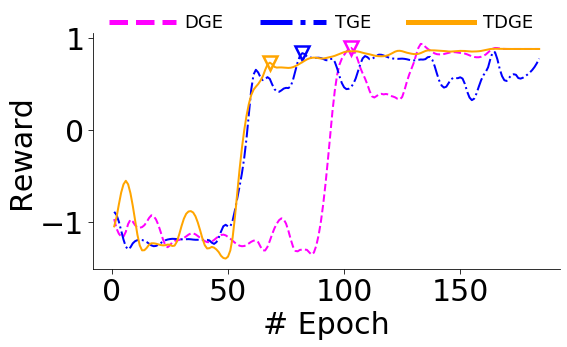

FileNotFoundError: [Errno 2] No such file or directory: '/Users/zber/Desktop/1_Data/Evaluation_Graph/RL_reward_threshold.pdf'

In [925]:
# battery bar
#decay esplion vs threshold vs threshold + decay esplion (3 bar, 看training time）
reward_decay =[0.729967451135631,0.713823712333593,0.689707905300352,0.655887323463337,0.610525566378192,0.552220776760845,0.481902457049187,0.402682380429805,0.320255337514434,0.243285206741772,0.161853792672947,-0.0305424176834803,-0.287161822953406,-0.560461649496766,-0.797955247683898,-0.967871807198152,-1.07063173078024,-1.12675935302044,-1.15796600744499,-1.15911446223123,-1.10611333190114,-1.02122681324821,-0.973875877065098,-0.995403075300817,-1.03478215192550,-1.05725053634628,-1.06215010226370,-1.05518189201317,-1.03472477098148,-0.999087340409312,-0.956415439160328,-0.926993921137554,-0.936684556297965,-0.972222463949530,-1.03046427864617,-1.10741591203867,-1.18880859685071,-1.25116925785842,-1.27363247872962,-1.25476315673439,-1.21972015980972,-1.20480438949388,-1.20151970651802,-1.19413461227334,-1.18410541974654,-1.17251220382993,-1.15628463480698,-1.13703461193435,-1.12437731399064,-1.12297570111071,-1.13392776238113,-1.15212081854293,-1.17216968655007,-1.19098328689743,-1.20720752149144,-1.21780969550232,-1.21977818050505,-1.21211855523796,-1.19506412236219,-1.17380335275796,-1.15486068148446,-1.14136428449427,-1.13663505882783,-1.14462195274047,-1.16187314445959,-1.18137727429666,-1.20326000891511,-1.22528929819046,-1.24366790481284,-1.25734210906420,-1.26290255923560,-1.26062997345457,-1.24944068911540,-1.23244091441859,-1.21464281578805,-1.20242653188585,-1.19986250822808,-1.21859818262524,-1.26765014632386,-1.30775324912360,-1.30901732540844,-1.26974782236396,-1.20535650828854,-1.13313412718777,-1.06840950794246,-1.01768683695164,-0.979884826659663,-0.960120045865833,-0.970473169402717,-1.01744988460618,-1.09422072084531,-1.18634876860206,-1.26771697482738,-1.31370119846845,-1.31851609320732,-1.30267791593645,-1.29999488939584,-1.29916071810864,-1.30267463944486,-1.32961402322984,-1.35439687056349,-1.33110664714756,-1.25839974931715,-1.14619068580056,-0.996557246085615,-0.807789458100772,-0.583604069044460,-0.330296473211830,-0.0579919901473875,0.205395479127957,0.429929744790897,0.599736569268803,0.709867574644743,0.773688730379976,0.815046598413851,0.850995141635248,0.881246548442404,0.892172660400769,0.869118505543066,0.824487450571585,0.754109876274959,0.673971547487960,0.614179729334336,0.559601237066147,0.495285275915473,0.422799710449093,0.365461001878291,0.352963406784508,0.368611085504273,0.388430600916794,0.392779855365824,0.386688924194080,0.390953703105790,0.386033084939470,0.370403720753878,0.363716883953183,0.354059486210952,0.338136454675980,0.332050495594746,0.358260539416989,0.432554767312687,0.521353892600169,0.600071186156399,0.665227648265701,0.730439230360505,0.815074908615443,0.892738942821861,0.935073861285077,0.932644938248057,0.902989935769324,0.881506439964874,0.863698941583707,0.846208086725619,0.831966592051492,0.823203856887004,0.821319384200028,0.822500698085989,0.825350736148401,0.831326152754968,0.838325678756488,0.843920930913517,0.846179996808200,0.844567140485467,0.840831213382985,0.836756252393173,0.834119241588317,0.829966571727652,0.821310583827682,0.810241204272422,0.800321558038509,0.793396558986284,0.789786536820330,0.789975336877650,0.795401885779792,0.805072562732392,0.820099568708699,0.841774051652119,0.864855526555828,0.882687753850836,0.890915384701313,0.889758799729192,0.884783890066254,0.880990294289277,0.880000000000000,0.880000000000000,0.880000000000000,0.880000000000000,0.880000000000000,0.880000000000000,0.880000000000000,0.880000000000000,0.880000000000000,0.880000000000000,0.880000000000000,0.880000000000001,0.880000000000000,0.879999999999999,0.880000000000000,0.879999999999999]
reward_decay= reward_decay[15:]
reward_threshold=[1.26431213126511,0.991397740669678,0.723834035459128,0.465385351302509,0.219789900131412,-0.00974354966179480,-0.221518198997028,-0.417264251863795,-0.605118722530775,-0.801025224708936,-0.998633306760303,-1.04441152547251,-1.02740214231759,-0.970831457911063,-0.912184473221442,-0.888998074295342,-0.922119533074290,-0.995233108918424,-1.09076247029350,-1.19069020091367,-1.26784493256018,-1.29706605380554,-1.27447129993262,-1.23165855527078,-1.20809766525722,-1.19682363638723,-1.19190137687822,-1.19541210530199,-1.20376923680497,-1.21740572164155,-1.23599395740440,-1.25382507275426,-1.26255816008789,-1.25961642793373,-1.24765942442148,-1.22975175156739,-1.21188381362094,-1.19876061051622,-1.19013935585040,-1.18530472086542,-1.18237769692676,-1.18329715989156,-1.18621457791644,-1.18797097665033,-1.18845700627272,-1.18805335452051,-1.18647330687579,-1.18589808743547,-1.18758910724658,-1.19087454942700,-1.19279498372412,-1.19256878915189,-1.19279474870794,-1.19383791965142,-1.19505222435810,-1.19382885398771,-1.19970112375512,-1.22422675957619,-1.23754599959903,-1.21907121585062,-1.16998608362059,-1.10365811078358,-1.04580511221762,-1.02978162686811,-1.04720688718289,-1.04865087849841,-0.983555164216491,-0.871122716161971,-0.742808399662613,-0.611175816054053,-0.470659453277967,-0.301878318945627,-0.0861054241260971,0.175188834076528,0.436654090854729,0.602185603830268,0.653758294308760,0.624757409750979,0.571009522307012,0.541274036716300,0.552275256810894,0.574001644617770,0.555455683767319,0.495989061376526,0.444711557720670,0.417495455544906,0.414426882895933,0.430233739985907,0.449829304090499,0.457502320494147,0.455270200766561,0.474097370210759,0.545095621750533,0.643470233917488,0.737078652103718,0.805511232349850,0.834587530139779,0.824482329374956,0.798537936351468,0.787866379483291,0.784711354063426,0.782214399663045,0.783278088059972,0.785230097363023,0.781268700505300,0.771611286715331,0.759510212861964,0.756055655843777,0.770648506491219,0.773015320762630,0.739050297202429,0.669475892021639,0.584497686167327,0.510739209068936,0.463250230995723,0.443745464129278,0.447462950962860,0.466490133275778,0.502366786865412,0.559998447493139,0.637583646108777,0.717966393664248,0.777865327856956,0.802853732045074,0.791620120887754,0.768670069834082,0.770097899790685,0.788062983680551,0.807314753004504,0.818275267071397,0.817252897752034,0.809450941255537,0.799359315168681,0.788689400561951,0.781229526253725,0.776402152507862,0.773392690694757,0.772417869134397,0.773916607971274,0.774925280909553,0.772618472958298,0.768295745397607,0.761439863007572,0.755630838758435,0.755186619098151,0.758656937691386,0.763012356074096,0.765851330800960,0.764678861834153,0.769428524865420,0.790436561788630,0.794388531299368,0.761334202534106,0.693137265146259,0.608925932219955,0.533523831985099,0.482577863312609,0.460529816447514,0.469966966336802,0.510437097864592,0.549008206653813,0.566159192962660,0.564111746931144,0.562501503774514,0.572350681607543,0.558400101006008,0.500336751155244,0.416368652860702,0.352613920774229,0.324111214456247,0.339688274857518,0.395823089983323,0.470559613620240,0.540881722591361,0.594457997086586,0.630933431346198,0.680691487764084,0.773505990448632,0.845928227298025,0.844155846160678,0.768394896379556,0.663328234396896,0.585534765125535,0.540467330896387,0.532540544741208,0.564692543216611,0.596222238212909,0.605617891263329,0.599670962851945,0.564141793817939,0.558035522908627,0.567623847076813,0.583845247885499,0.603160176509799,0.625031136472301,0.651400766682856,0.684265649446588,0.725203308236171,0.775388575875028]
reward_threshold= reward_threshold[15:]

reward_threshold_decay=[0.680209806112200,0.764101413777710,0.811258489690996,0.821976106155101,0.796952422524955,0.737338567121361,0.644557677264902,0.519886067922390,0.363228545562714,0.167793087812187,-0.0878978714041754,-0.409950731325554,-0.703283322152209,-0.931512631827330,-1.05035238266335,-1.04701189481574,-0.949624155527650,-0.809851676925715,-0.680427103644689,-0.590711746154309,-0.552121782788871,-0.590144771095656,-0.686954897696404,-0.823571148570043,-0.983616114823820,-1.13834663859536,-1.25390393029300,-1.30784379486395,-1.30632162259896,-1.28127067869009,-1.24631252374669,-1.23110614857632,-1.23133235245859,-1.23543372458934,-1.24250247014169,-1.25000411067106,-1.25375212081961,-1.25171688640036,-1.24537311362394,-1.24602514860577,-1.26051600039521,-1.25671222813867,-1.21291721039072,-1.13442693020125,-1.04351786864816,-0.964113497179994,-0.910587979696293,-0.885702106419378,-0.881533597836894,-0.896657256877738,-0.938101646077848,-1.00516024869161,-1.08963430193017,-1.17932401024024,-1.25175581746970,-1.28720174999636,-1.28411896902435,-1.27019984766761,-1.27811125457096,-1.29794344821005,-1.32629500223241,-1.36692982568310,-1.39056525910632,-1.39701362707513,-1.37644497543909,-1.30905008832134,-1.16807439950558,-0.942242125486971,-0.679873543238445,-0.424540705281328,-0.194925303558625,-0.00143270578873082,0.157879670461135,0.285007365980352,0.378846811444275,0.437057388145378,0.469939630505759,0.498791488172183,0.536843685872888,0.583451323470693,0.651617055250202,0.710329156892903,0.731390165501730,0.714754422885297,0.685617719601742,0.677608054966873,0.679504852855361,0.679504852855361,0.677608054966873,0.675120600135403,0.674047160504705,0.676264178041455,0.682692836857490,0.693160134678645,0.706709540831744,0.722053353379782,0.737946646620218,0.753290459168256,0.766839865321355,0.777307163142510,0.783735821958545,0.785952839495295,0.784384252719957,0.780000000000000,0.776110894424681,0.776439105537832,0.780648430761412,0.786253731319658,0.792016556772594,0.798063864478959,0.805652543887230,0.815826740534452,0.826884695298589,0.837171346308218,0.845749837705774,0.851396546417481,0.854439075219073,0.855199621513665,0.855439181980095,0.855158213360203,0.852295058551803,0.846272103324741,0.838715671330248,0.832435746090632,0.827564253909367,0.821779475814391,0.815129547419108,0.808295598391177,0.803427771439026,0.801270360852456,0.800588737207050,0.801522285775806,0.805521345250575,0.812950903043925,0.824671118032510,0.838544185258405,0.851425358211143,0.859268588514770,0.860299335692564,0.855569565164220,0.847664802688201,0.839683197524954,0.833651864650067,0.828421840649909,0.824634319424515,0.823573800537558,0.827232685153239,0.835571062601505,0.847225748860205,0.858020221387694,0.864209179924884,0.865596699387697,0.865384117583181,0.864535461165266,0.862992172550053,0.861212446667739,0.860648285462716,0.859163799293745,0.855871425212990,0.852467019238695,0.851744536272132,0.853868669982545,0.856462082155971,0.858244931237613,0.859254626183755,0.858993113075285,0.858130175287144,0.856253733320465,0.853695667708380,0.851917538546297,0.852180220929562,0.853594236130332,0.855536206826896,0.858722675780565,0.864233576310151,0.870606141809543,0.876058796015434,0.879679780351738,0.881568586775337,0.882487454831469,0.881896797888488,0.880495147144638,0.880000000000000,0.880000000000000,0.880000000000000,0.880000000000000,0.880000000000000,0.880000000000000,0.880000000000000,0.880000000000000,0.880000000000000,0.880000000000000,0.880000000000000,0.880000000000000,0.880000000000001,0.880000000000000,0.879999999999999,0.880000000000000,0.879999999999999]
reward_threshold_decay= reward_threshold_decay[15:]

# women_means, women_std = (25, 32, 34, 20, 25), (3, 5, 2, 3, 3)
# women_m, women_s = (25, 32, 34, 20, 25), (3, 5, 2, 3, 3)

# ind = np.arange(len(tree))*0.95  # the x locations for the groups
# width = 0.25  # the width of the bars
x = range(1,185)
# xnew = np.linspace(1,199, num=50, endpoint=True)
# f_decay = interp1d(x, reward_decay)
# f2_decay = interp1d(x, reward_decay, kind='slinear')
# f_threshold = interp1d(x, reward_threshold)
# f2_threshold = interp1d(x, reward_threshold, kind='cubic')
# f_threshold_decay = interp1d(x, reward_threshold_decay)
# f2_threshold_decay = interp1d(x, reward_threshold_decay, kind='cubic')

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.plot(x,reward_decay,color='magenta',linestyle='--' , linewidth=2, label = 'DGE',markevery=[102],marker='v',ms = 14,markerfacecolor='none',markeredgewidth = 2.5, markeredgecolor='magenta')
# rects2 = ax.plot(x,smooth_decay,  markerfacecolor='blue', markersize=12, color='black', linewidth=2, label = 'decay')
rects2 = ax.plot(x,reward_threshold,color='blue',linestyle='-.' , linewidth=2, label = 'TGE',markevery=[81],marker='v',ms = 14,markerfacecolor='none',markeredgewidth = 2.5, markeredgecolor='blue')
rects3 = ax.plot(x,reward_threshold_decay,color='orange',linestyle='-' , linewidth=2,label = 'DTGE',markevery=[67],marker='v',ms = 14,markerfacecolor='none', markeredgewidth = 2.5,markeredgecolor='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Reward",fontsize=30)
ax.set_xlabel("# Epoch",fontsize=30)
ax.yaxis.set_tick_params(labelsize=30,length=5)
ax.xaxis.set_tick_params(labelsize=30,length=5)
custom_lines = [Line2D([0], [0],linestyle ='--'  ,color='magenta', lw=5),
                Line2D([0], [0],linestyle = '-.' ,color='blue', lw=5),
                Line2D([0], [0], linestyle = '-'  ,color='orange', lw=5)]

legend = ax.legend(custom_lines,['DGE', 'TGE', 'TDGE'],loc='upper left',  prop={'size': 18,},bbox_to_anchor=(0.0, 1.15),ncol=3,handletextpad = 0.5,fancybox=True, framealpha=0.0,handlelength = 3.7)
#legend.get_frame().set_facecolor('C0') #set legend color
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout()
plt.show()
fig.savefig('/Users/zber/Desktop/1_Data/Evaluation_Graph/RL_reward_threshold.pdf', format='pdf', dpi=1000,bbox_inches = 'tight',
    pad_inches = 0)

## Random vs less Random Reward

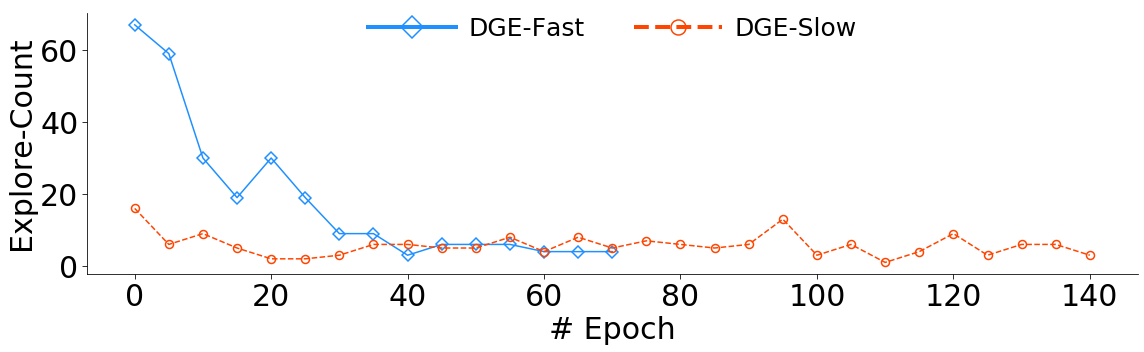

FileNotFoundError: [Errno 2] No such file or directory: '/Users/zber/Desktop/1_Data/Evaluation_Graph/RL_exploration_long.pdf'

In [924]:
# Random vs less Random Reward
def segment(a):
    seg_length = 5
    list = [sum(a[x:x+seg_length]) for x in range(0,len(a),seg_length)]
    return list
rre = [14, 14, 13, 13, 13, 8, 14, 13, 12, 12, 6, 6, 4, 4, 10, 5, 3, 1, 5, 5, 10, 6, 10, 4, 0, 2, 5, 1, 6, 5, 2, 4, 2, 1, 0, 3, 1, 2, 3, 0, 0, 1, 0, 1, 1, 0, 1, 0, 3, 2, 2, 2, 1, 0, 1, 1, 0, 1, 4, 0, 1, 0, 0, 1, 2, 0, 1, 1, 2, 0, 1, 2, 1]
re = [6, 1, 2, 0, 7, 0, 1, 3, 1, 1, 0, 3, 5, 1, 0, 2, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 1, 0, 1, 5, 1, 1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 3, 0, 0, 1, 0, 3, 1, 1, 2, 0, 2, 2, 2, 2, 0, 0, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 3, 1, 1, 3, 5, 0, 0, 1, 1, 1, 1, 0, 1, 0, 4, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 2, 2, 1, 3, 1, 0, 1, 0, 1, 1, 2, 0, 2, 1, 0, 2, 1, 2, 1, 2, 1, 0]
x_rre = range(0,len(rre),5)
x_re = range(0,len(re),5)
rre = segment(rre)
re =  segment(re)
fig, ax = plt.subplots(figsize=(16, 5))
# rects1 = ax.plot(x_rre,rre,color='magenta',linestyle='--' , linewidth=3, label = 'Decay R',markevery=[101],marker='v',ms = 12)
# rects2 = ax.plot(x_re,re,color='blue',linestyle='-.' , linewidth=3, label = 'Decay',markevery=[81],marker='v',ms = 12)

rects1 = ax.plot(x_rre,rre, color='dodgerblue',linestyle='-', linewidth=1.5, marker= 'D' ,ms = 8,markerfacecolor='none',markeredgewidth=1.5,label='DGE-Fast') #, markeredgecolor='lawngreen'
rects2 = ax.plot(x_re,re, color='orangered',linestyle='--', linewidth=1.5,ms = 8, marker = 'o',markerfacecolor='none',markeredgewidth=1.5,label='DGE-Slow') #, markeredgecolor='dodgerblue'


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Explore-Count",fontsize=30)
ax.set_xlabel("# Epoch",fontsize=30)
ax.yaxis.set_tick_params(labelsize=30,length=5)
ax.xaxis.set_tick_params(labelsize=30,length=5)
# custom_lines = [Line2D([0], [0],linestyle='-' ,marker= 'D',ms = 8,color='dodgerblue', lw=3,handlelength = 2.5),
#                 Line2D([0], [0],linestyle = '--' ,ms = 8, marker = 'o',color='orangered', lw=3,handlelength = 2.5),
#                  Line2D([0], [0], linestyle = '-'  ,color='orange', lw=3) ]
# custom_lines,['DGE-Fast', 'DGE-Slow'],


legend = ax.legend(loc='upper center', prop={'size': 25,},bbox_to_anchor=(0.5, 1.07),ncol=2,handletextpad = 0.5,fancybox=True, framealpha=0.0,handlelength = 3.5)
for legobj in legend.legendHandles:
    legobj.set_linewidth(4.0)
    legobj._legmarker.set_markersize(15)


#legend.get_frame().set_facecolor('C0') #set legend color
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout()
plt.show()
fig.savefig('/Users/zber/Desktop/1_Data/Evaluation_Graph/RL_exploration_long.pdf', format='pdf', dpi=1000,bbox_inches = 'tight',
    pad_inches = 0)

# random Retraining data 

In [915]:
epsilon_decay =(12.8,15,19.2,28,52.27,103.4,114.8)
threshold_epsilon_decay =(8.8,12.4,17.9,26,42.4,68.5 ,82.6)

In [916]:
decay = [i * 15 for i in epsilon_decay]
threshold_decay = [i * 15 for i in threshold_epsilon_decay]

In [917]:
time_decay = [i*0.7 for i in decay]
time_td = [i*0.7 for i in threshold_decay]

In [918]:
battery_decay = [i/180*16 for i in time_decay]
battery_td = [i/180*16 for i in time_td]

In [919]:
battery_decay

[11.946666666666665,
 14.0,
 17.919999999999998,
 26.133333333333333,
 48.785333333333334,
 96.50666666666665,
 107.14666666666666]

In [920]:
battery_td

[8.213333333333333,
 11.573333333333332,
 16.706666666666667,
 24.266666666666666,
 39.57333333333333,
 63.93333333333333,
 77.09333333333333]

In [921]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
x = np.random.uniform(low = -2*np.pi, high = 2*np.pi, size=500)
y = np.sin(x) + stats.cauchy.rvs(size=len(x))
z = lowess(y, x, frac= 1./3, it=0)
w = lowess(y, x, frac=1./3)

ModuleNotFoundError: No module named 'statsmodels'

In [922]:
time_decay = [134.39999999999998,
 157.5,
 201.6,
 294.0,
 548.835,
 1085.6999999999998,
 1205.3999999999999]
time_td = [92.39999999999999, 130.2, 187.95, 273.0, 445.2, 719.25, 867.3]

In [923]:
mean(time_decay)

NameError: name 'mean' is not defined

In [ ]:
mean(time_td)

In [ ]:
387.9/518.2049999999999

# retraining time

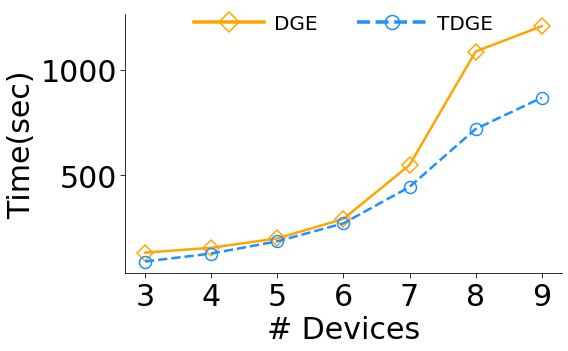

FileNotFoundError: [Errno 2] No such file or directory: '/Users/zber/Desktop/1_Data/Evaluation_Graph/RL_retrain_time.pdf'

In [909]:
# Random vs less Random Reward
time_decay = [134.39999999999998,
 157.5,
 201.6,
 294.0,
 548.835,
 1085.6999999999998,
 1205.3999999999999]
time_td = [92.39999999999999, 130.2, 187.95, 273.0, 445.2, 719.25, 867.3]
x = [i for i in range(3,10)]

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.plot(x,time_decay, color='orange',linestyle='-', linewidth=2.5, marker= 'D' ,ms = 12,markerfacecolor='none',markeredgewidth=1.5,label='DGE') #, markeredgecolor='lawngreen'
rects2 = ax.plot(x,time_td, color='dodgerblue',linestyle='--', linewidth=2.5,ms = 12, marker = 'o',markerfacecolor='none',markeredgewidth=1.5,label='TDGE') #, markeredgecolor='dodgerblue'

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x)
ax.set_ylabel("Time(sec)",fontsize=30)
ax.set_xlabel("# Devices",fontsize=30)
ax.yaxis.set_tick_params(labelsize=30,length=5)
ax.xaxis.set_tick_params(labelsize=30,length=5)

# custom_lines = [Line2D([0], [0],linestyle='-' ,marker= 'D',ms = 8,color='dodgerblue', lw=3,handlelength = 2.5),
#                 Line2D([0], [0],linestyle = '--' ,ms = 8, marker = 'o',color='orangered', lw=3,handlelength = 2.5),
#                  Line2D([0], [0], linestyle = '-'  ,color='orange', lw=3) ]
# custom_lines,['DGE-Fast', 'DGE-Slow'],


legend = ax.legend(loc='upper center', prop={'size': 20,},bbox_to_anchor=(0.5, 1.07),ncol=2,handletextpad = 0.5,fancybox=True, framealpha=0.0,handlelength = 3.5)
for legobj in legend.legendHandles:
    legobj.set_linewidth(3.5)
    legobj._legmarker.set_markersize(14)


#legend.get_frame().set_facecolor('C0') #set legend color
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout()
plt.show()
fig.savefig('/Users/zber/Desktop/1_Data/Evaluation_Graph/RL_retrain_time.pdf', format='pdf', dpi=1000,bbox_inches = 'tight',
    pad_inches = 0)

# retrain battery

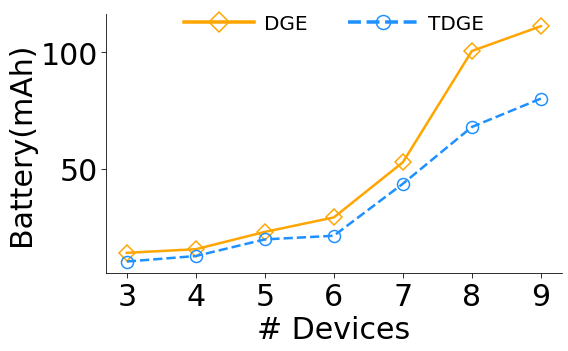

FileNotFoundError: [Errno 2] No such file or directory: '/Users/zber/Desktop/1_Data/Evaluation_Graph/RL_retrain_battery.pdf'

In [910]:
# Random vs less Random Reward
battery_decay = [13.946666666666665,
 15.5,
 22.919999999999998,
 29.133333333333333,
 52.785333333333334,
 100.50666666666665,
 111.14666666666666]
battery_td = [10.213333333333333,
 12.573333333333332,
 19.706666666666667,
 21.266666666666666,
 43.57333333333333,
 67.93333333333334,
 80.09333333333333]

x = [i for i in range(3,10)]

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.plot(x,battery_decay, color='orange',linestyle='-', linewidth=2.5, marker= 'D' ,ms = 12,markerfacecolor='none',markeredgewidth=1.5,label='DGE') #, markeredgecolor='lawngreen'
rects2 = ax.plot(x,battery_td, color='dodgerblue',linestyle='--', linewidth=2.5,ms = 12, marker = 'o',markerfacecolor='none',markeredgewidth=1.5,label='TDGE') #, markeredgecolor='dodgerblue'

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x)
ax.set_ylabel("Battery(mAh)",fontsize=30)
ax.set_xlabel("# Devices",fontsize=30)
ax.yaxis.set_tick_params(labelsize=30,length=5)
ax.xaxis.set_tick_params(labelsize=30,length=5)

# custom_lines = [Line2D([0], [0],linestyle='-' ,marker= 'D',ms = 8,color='dodgerblue', lw=3,handlelength = 2.5),
#                 Line2D([0], [0],linestyle = '--' ,ms = 8, marker = 'o',color='orangered', lw=3,handlelength = 2.5),
#                  Line2D([0], [0], linestyle = '-'  ,color='orange', lw=3) ]
# custom_lines,['DGE-Fast', 'DGE-Slow'],


legend = ax.legend(loc='upper center', prop={'size': 20,},bbox_to_anchor=(0.5, 1.07),ncol=2,handletextpad = 0.5,fancybox=True, framealpha=0.0,handlelength = 3.5)
for legobj in legend.legendHandles:
    legobj.set_linewidth(3.5)
    legobj._legmarker.set_markersize(14)


#legend.get_frame().set_facecolor('C0') #set legend color
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout()
plt.show()
fig.savefig('/Users/zber/Desktop/1_Data/Evaluation_Graph/RL_retrain_battery.pdf', format='pdf', dpi=1000,bbox_inches = 'tight',
    pad_inches = 0)

In [911]:
battery_decay = [11.946666666666665,
 14.0,
 17.919999999999998,
 26.133333333333333,
 48.785333333333334,
 96.50666666666665,
 107.14666666666666]
battery_td = [8.213333333333333,
 11.573333333333332,
 16.706666666666667,
 24.266666666666666,
 39.57333333333333,
 63.93333333333333,
 77.09333333333333]

In [912]:
b_decay = [ i + random.randint(-5,5) for i in battery_decay]

NameError: name 'random' is not defined

In [913]:
b_td =[ i + random.randint(-5,5) for i in battery_td]

NameError: name 'random' is not defined

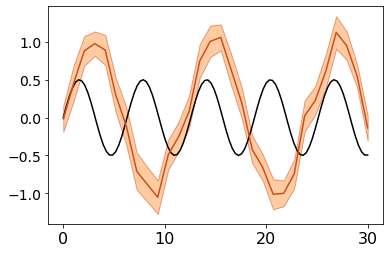

In [914]:
from matplotlib import pyplot as pl
import numpy as np

pl.clf()


x = np.linspace(0, 30, 100)
y = np.sin(x) * 0.5
pl.plot(x, y, '-k')


x = np.linspace(0, 30, 30)
y = np.sin(x/6*np.pi)
error = np.random.normal(0.1, 0.02, size=y.shape) +.1
y += np.random.normal(0, 0.1, size=y.shape)

pl.plot(x, y, 'k', color='#CC4F1B')
pl.fill_between(x, y-error, y+error,
    alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')

# y = np.cos(x/6*np.pi)    
# error = np.random.rand(len(y)) * 0.5
# y += np.random.normal(0, 0.1, size=y.shape)
# pl.plot(x, y, 'k', color='#1B2ACC')
# pl.fill_between(x, y-error, y+error,
#     alpha=0.2, edgecolor='#1B2ACC', facecolor='#089FFF',
#     linewidth=4, linestyle='dashdot', antialiased=True)



# y = np.cos(x/6*np.pi)  + np.sin(x/3*np.pi)  
# error = np.random.rand(len(y)) * 0.5
# y += np.random.normal(0, 0.1, size=y.shape)
# pl.plot(x, y, 'k', color='#3F7F4C')
# pl.fill_between(x, y-error, y+error,
#     alpha=1, edgecolor='#3F7F4C', facecolor='#7EFF99',
#     linewidth=0)



pl.show()